# Insurance Claim Fraud Detection Project

## Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is a unique position to help the Auto Insurance industry with this problem.

## Dataset Description
Dataset for 'Insurance claim fraud detection' includes details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.  

## Attributes Description
months_as_customer: Number of months of patronage.

age: the length of time a customer has lived or a thing has existed.

policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer.

policy_bind_date:date which document that is given to customer after we accept your proposal for insurance.

policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period.

policy_csl: is basically Combined Single Limit.

policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss.

policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year.

umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies.

insured_zip: It is the zip code where the insurance was made.

insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions.

insured_education_level: This refers to the Level of education of the customer.

insured_occupation: This refers Occupation of the customer.

insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.

insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership.

capital-gains: This refers to profit accrued due to insurance premium.

capital-loss: This refers to the losses incurred due to insurance claims.

incident_date: This refers to the date which claims where made by customers.

incident_type: This refers to the type of claim/vehicle damage made by customer.

collision_type: This refers to the area of damage on the vehicle.

incident_severity: This refers to the extent/level of damage.

authorities_contacted: This refers to the government agencies that were contacted after damage.

incident_state: This refers to the state at which the accident happened.

incident_city: This refers to the city at which the accident happened.

1ncident_location: This refers to the location at which the accident happened.

incident_hour_of_the_day: The period of the day which accident took place.

number_of_vehicles_involved: This refers to number of vehicles involved the accident.

property_damage: This refers to whether property was damaged or not.

bodily_injuries: This refers to injuries sustained.

witnesses: This refers to the number of witnesses involved.

police_report_available: This refers to whether the report on damage was documented or not.

total_claim_amount: This refers to the financial implications involved in claims.

injury_claim: This refers to physical injuries sustained.

property_claim: This refers to property damages during incident.

vehicle_claim: This refers to property damages during incident.

auto_make: This refers to the make of the vehicle.

auto_model: This refers to the model of the vehicle.

auto_year: This refers to the year which the vehicle was manufactured.

_c39: Description not given.

fraud_reported: This refers to whether fraud is reported 'Y' for Yes and 'N' for No.


## Objective
The objective of this project is to predict if an insurance claim is fraudulent or not on the basis of the details provided in the dataset. In this project, the prediction of insurance claim is fraudulent or not involves the implementation of calssification model.

## Features and Target variable for Predicting 'If An Insurance Claim Is Fraudulent or Not'

### Features
months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, _c39

### Target variable
fraud_reported

# Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, 
BaggingClassifier)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Saving and loading models
import joblib

# Importing Dataset

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('Insurance_Claim_Fraud_Detection_Dataset.csv')

In [3]:
# Display first 5 rows of the dataframe
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
# Display last 5 rows of the dataframe
df.tail()

months_as_customer  age  policy_number policy_bind_date policy_state  \
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[5 rows x 40 columns]

# Exploratory Data Analysis

In [5]:
# Display shape of the dataframe
df.shape

(1000, 40)

Dataframe has 1000 rows and 40 columns.

In [6]:
# Display the names of the columns 
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
# Display the datatype of each column
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

Columns such as 'months_as_customer', 'age', 'policy_number', 'policy_deductable', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'total_claim_amount', 'injury_claim', 'property_claim', and 'vehicle_claim' have int datatype. 

Columns 'policy_annual_premium', 'umbrella_limit', and '_c39' have float datatype. 

Columns 'policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', and 'fraud_reported' have object datatype but datatype for 'policy_csl' column should be int as it contain numerical data separated by '/'. Simlarly, datatype of 'policy_bind_date' and 'incident_date' should be datetime not object.

#### 'policy_csl'
In 'policy_csl' column, 'CSL' stands for Combined Single Limit. It's a type of liability coverage in an insurance policy, typically found in auto insurance. CSL coverage combines the limits for bodily injury and property damage liability into a single overall limit. 

For example, in CSL of 250/500, the first number represents the maximum coverage for Bodily Injury Liability. It's the maximum amount the insurance company will pay for injuries sustained by individuals (including medical expenses, pain and suffering, etc.) as a result of an accident for which the insured is found liable.
And, second number represents the maximum coverage for Property Damage Liability. It's the maximum amount the insurance company will pay for damage to someone else's property (e.g., their vehicle or other property) as a result of an accident for which the insured is found liable.

In [8]:
# Splitting the 'policy_csl' column based on '/' and creating two new columns
df[['policy_csl_1', 'policy_csl_2']] = df['policy_csl'].str.split('/', expand = True)

In [9]:
# Converting datatypes of 'policy_bind_date' and 'incident_date' columns to datetime datatype
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Converting datatypes of 'policy_csl_1' and 'policy_csl_2' columns to int datatype
df['policy_csl_1'] = df['policy_csl_1'].astype('int64')
df['policy_csl_2'] = df['policy_csl_2'].astype('int64')

In [10]:
# Extracting year, month, and day from 'policy_bind_date' and 'incident_date' columns
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

The values from the 'policy_csl' column have been split and stored in two separate columns, and the year, month, and day have been extracted from the 'policy_bind_date' and 'incident_date' columns. Keeping these columns in the dataset makes the dataset redundant, so it is necessary to drop them.

In [11]:
# Dropping 'policy_csl', 'policy_bind_date', and 'incident_date' columns from the dataset
df.drop(['policy_csl', 'policy_bind_date', 'incident_date'], inplace = True, axis = 1)

In [12]:
# Again checking the datatype for each column
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

In [13]:
# Checking the shape of dataframe after updation
df.shape

(1000, 45)

In [14]:
# Display dataset after updation
df.head()

months_as_customer  age  policy_number policy_state  policy_deductable  \
0                 328   48         521585           OH               1000   
1                 228   42         342868           IN               2000   
2                 134   29         687698           OH               2000   
3                 256   41         227811           IL               2000   
4                 228   44         367455           IL               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ... fraud_reported _c39 policy_csl_1  policy_csl_2  \
0                      MD  ...              Y  NaN          250           500   
1                      MD  ...              Y  NaN          250           500   
2                     PhD  ...              N  NaN          100           300   
3                     PhD  ...              Y  NaN          250           500   
4               Associate  ...              N  NaN          500          1000   

   policy_bind_day policy_bind_month policy_bind_year incident_day  \
0               17                10             2014           25   
1               27                 6             2006           21   
2                9                 6             2000           22   
3               25                 5             1990            1   
4                6                 6             2014           17   

  incident_month incident_year  
0              1          2015  
1              1          2015  
2              2          2015  
3             10          2015  
4              2          2015  

[5 rows x 45 columns]

## Data Preprocessing

In [15]:
# Checking for if any ' ','NA','-', or '-' exist in dataset.
df.isin([' ','NA','-','?']).any()

months_as_customer             False
age                            False
policy_number                  False
policy_state                   False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
witnesses                      False
p

In 'collision_type', 'property_damage', and 'police_report_available' columns, any ' ','?', 'NA', or '-' exist.

In [16]:
# Cheking for which value is present out of these ' ', 'NA', '-', '?'
values_to_check = [' ', 'NA', '-', '?']
present_values = []

for value in values_to_check:
    if (df.values == value).any():
        present_values.append(value)
        
present_values

['?']

In [17]:
# Checking for the count of '?' 
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_state                     0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount  

In [18]:
# Replacing '?' with NaN
df = df.replace('?', np.NaN)

In [19]:
# Again Checking for if any whitespace,'?' 'NA' or '-' exist in dataset
df.isin([' ','NA','-','?']).any()

months_as_customer             False
age                            False
policy_number                  False
policy_state                   False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
p

Now, no ' ','?' 'NA' or '-' present in the dataset.

In [20]:
# Checking for the duplicated rows in the dataset
df.duplicated().sum()

0

No duplicated rows present in the dataset.

In [21]:
# Checking for the null values in the dataset
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries                   0
witnesses                         0
police_report_available     

Null values are present in 'collision_type', 'property_damage', 'police_report_available', and '_c39' columns.

In [22]:
# Calculating the percentage of missing data for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Creating a DataFrame to display the results
missing_data_info = pd.DataFrame({'Missing Values': df.isnull().sum(), '% Missing Data': missing_percentage})

# Sorting the missing data information in descending order by '% Missing Data'
missing_data_info = missing_data_info.sort_values(by = '% Missing Data', ascending = False)

# Display the sorted missing data information
print(missing_data_info)

                             Missing Values  % Missing Data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
auto_model                                0             0.0
bodily_injuries                           0             0.0
witnesses                                 0             0.0
total_claim_amount                        0             0.0
injury_claim                              0             0.0
property_claim                            0             0.0
vehicle_claim                             0             0.0
auto_make                                 0             0.0
months_as_customer                        0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
policy_csl_1                            

Column '_c39' is completely empty. Columns such as 'collision_type', 'property_damage', and 'police_report_available' containing null values. Imputing them with mean, median or mode is a suitable option depending on the specific column and its datatype.

## Imputing Missing Values 

In [23]:
# Imputing columns containing null values with mean or mode
columns_to_impute = ['collision_type', 'property_damage', 'police_report_available']

for i in columns_to_impute:
    
    # Imputing missing values in columns containing categorical data with mode
    if df[i].dtypes == 'object':
        df[i].fillna(df[i].mode().iloc[0], inplace = True)
    
    # Imputing missing values in columns containing numerical data with mean
    elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        df[i].fillna(df[i].mean(), inplace = True)

In [24]:
# Dropping empty '_c39' column
df.drop('_c39', axis = 1, inplace = True)

In [25]:
# Display shape of dataframe dropping '_c39' column
df.shape

(1000, 44)

In [26]:
# Display the dataset after imputing the missing values and dropping '_c39' column
df.head()

months_as_customer  age  policy_number policy_state  policy_deductable  \
0                 328   48         521585           OH               1000   
1                 228   42         342868           IN               2000   
2                 134   29         687698           OH               2000   
3                 256   41         227811           IL               2000   
4                 228   44         367455           IL               1000   

   policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                1406.91               0       466132        MALE   
1                1197.22         5000000       468176        MALE   
2                1413.14         5000000       430632      FEMALE   
3                1415.74         6000000       608117      FEMALE   
4                1583.91         6000000       610706        MALE   

  insured_education_level  ... auto_year fraud_reported policy_csl_1  \
0                      MD  ...      2004              Y          250   
1                      MD  ...      2007              Y          250   
2                     PhD  ...      2007              N          100   
3                     PhD  ...      2014              Y          250   
4               Associate  ...      2009              N          500   

   policy_csl_2  policy_bind_day policy_bind_month policy_bind_year  \
0           500               17                10             2014   
1           500               27                 6             2006   
2           300                9                 6             2000   
3           500               25                 5             1990   
4          1000                6                 6             2014   

  incident_day incident_month incident_year  
0           25              1          2015  
1           21              1          2015  
2           22              2          2015  
3            1             10          2015  
4           17              2          2015  

[5 rows x 44 columns]

In [27]:
# Again checking for the null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

Now, no null values present in the dataset.

In [28]:
# Checking for the number of unique values present inside each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries                   3
witnesses                         4
police_report_available     

months_as_customer: 391 unique values (number of months as a customer).

age: 46 unique values (age).

policy_number: 1000 unique values (policy number).

policy_state: 3 unique values (policy state).

policy_deductable: 3 unique values (policy deductable).

policy_annual_premium: 991 unique values (policy annual premium).

umbrella_limit: 11 unique values (umbrella limit).

insured_zip: 995 unique values (insured zip).

insured_sex: 2 unique values (insured sex).

insured_education_level: 7 unique values (insured education level).

insured_occupation: 14 unique values (insured occupation).

insured_hobbies: 20 unique values (insured hobbies).

insured_relationship: 6 unique values (insured relationship).

capital-gains: 338 unique values (capital gains).

capital-loss: 354 unique values (capital loss).

incident_type: 4 unique values (incident type).

collision_type: 3 unique values (collision type).

incident_severity: 4 unique values (incident severity).

authorities_contacted: 5 unique values (authorities contacted).

incident_state: 7 unique values (incident state).

incident_city: 7 unique values (incident city).

incident_location: 1000 unique values (incident location).

incident_hour_of_the_day: 24 unique values (incident hour of the day).

number_of_vehicles_involved: 4 unique values (number of vehicles involved).

property_damage: 2 unique values (property damage).

bodily_injuries: 3 unique values (bodily injuries).

witnesses: 4 unique values (witnesses).

police_report_available: 2 unique values (police report available).

total_claim_amount: 763 unique values (total claim amount).

injury_claim: 638 unique values (injury claim).

property_claim: 626 unique values (property claim).

vehicle_claim: 726 unique values (vehicle claim).

auto_make: 14 unique values (auto make).

auto_model: 39 unique values (auto model).

auto_year: 21 unique values (auto year).

fraud_reported: 2 unique values (fraud reported).

policy_csl_1: 3 unique values (policy_csl_1).

policy_csl_2: 3 unique values (policy_csl_2).

policy_bind_day: 31 unique values (policy bind day).

policy_bind_month: 12 unique values (policy bind month).

policy_bind_year: 26 unique values (policy bind year).

incident_day: 22 unique values (incident day).

incident_month: 12 unique values (incident month).

incident_year: 1 unique value (incident year).

### Dropping irrelevant columns
The 'policy_number' column appears to be a unique identifier for each policy. Since it's a unique identifier, it doesn't provide any meaningful information for analysis or modeling. It doesn't offer insights or contribute to the understanding of the data patterns, and therefore, it can be dropped to simplify the dataset without losing relevant information.

The 'incident_location' column contains specific physical addresses or descriptions of where incidents occurred. The 'incident_location' column can be dropped to reduce the complexity of the dataset.

The 'insured_zip' column contains ZIP codes representing the locations of the insured individuals. ZIP codes, as standalone values, may not directly contribute to the analysis and can be dropped to reduce the complexity of the dataset.

In [29]:
# Dropping 'policy_csl', 'policy_bind_date', and 'insured_zip' columns from the dataset
df.drop(['policy_number', 'incident_location', 'insured_zip'], inplace = True, axis = 1)

In [30]:
# Display shape of dataframe after dropping 'policy_csl', 'policy_bind_date', and 'insured_zip' columns
df.shape

(1000, 41)

In [31]:
# Display datset after updation
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies  ... auto_year  fraud_reported  \
0       craft-repair        sleeping  ...      2004               Y   
1  machine-op-inspct         reading  ...      2007               Y   
2              sales     board-games  ...      2007               N   
3       armed-forces     board-games  ...      2014               Y   
4              sales     board-games  ...      2009               N   

   policy_csl_1 policy_csl_2 policy_bind_day policy_bind_month  \
0           250          500              17                10   
1           250          500              27                 6   
2           100          300               9                 6   
3           250          500              25                 5   
4           500         1000               6                 6   

  policy_bind_year incident_day incident_month  incident_year  
0             2014           25              1           2015  
1             2006           21              1           2015  
2             2000           22              2           2015  
3             1990            1             10           2015  
4             2014           17              2           2015  

[5 rows x 41 columns]

In [32]:
# Separating numerical columns and categorical columns for further data analysis
categorical_columns = []
numerical_columns = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical_columns.append(i)
    elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        numerical_columns.append(i)

In [33]:
# Display the list of categorical columns
categorical_columns

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [34]:
# Display the list of numerical columns
numerical_columns

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'policy_csl_1',
 'policy_csl_2',
 'policy_bind_day',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month',
 'incident_year']

In [35]:
# Display the lengths of both the lists
print("No. of categorical columns:", len(categorical_columns))
print("No. of numerical columns:", len(numerical_columns))

No. of categorical columns: 17
No. of numerical columns: 24


In [36]:
# Display unique values present inside each categorical column
for i in categorical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

policy_state :
['OH' 'IN' 'IL']


insured_sex :
['MALE' 'FEMALE']


insured_education_level :
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']


insured_occupation :
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']


insured_hobbies :
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']


insured_relationship :
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']


incident_type :
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


collision_type :
['Side Collision' 'Rear Collision' 'Front Collision']


incident_severity :
['Major Damage' 'Minor Damage' 'Tot

policy_state: There are 3 unique values representing different policy states, including 'OH', 'IN', and 'IL'.

insured_sex: This column has 2 unique values, representing the gender of insured individuals ('MALE' and 'FEMALE').

insured_education_level: There are 7 unique values indicating the education level of insured individuals, including 'MD', 'PhD', 'Associate', 'Masters', 'High School', 'College', and 'JD'.

insured_occupation: This column contains 14 unique values representing insured individuals' occupations, including 'craft-repair', 'machine-op-inspct', 'sales', 'armed-forces', 'tech-support', 'prof-specialty', 'other-service', 'priv-house-serv', 'exec-managerial', 'protective-serv', 'transport-moving', 'handlers-cleaners', 'adm-clerical', and 'farming-fishing'.

insured_hobbies: There are 20 unique values indicating the hobbies of insured individuals, including 'sleeping', 'reading', 'board-games', 'bungie-jumping', 'base-jumping', 'golf', 'camping', 'dancing', 'skydiving', 'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking', 'polo', 'basketball', 'video-games', 'cross-fit', and 'exercise'.

insured_relationship: This column contains 6 unique values representing the relationship of insured individuals, including 'husband', 'other-relative', 'own-child', 'unmarried', 'wife', and 'not-in-family'.

incident_type: There are 4 unique values indicating the type of incident, including 'Single Vehicle Collision', 'Vehicle Theft', 'Multi-vehicle Collision', and 'Parked Car'.

collision_type: This column has 3 unique values representing collision types, including 'Side Collision', 'Rear Collision', and 'Front Collision'.

incident_severity: There are 4 unique values indicating the severity of incidents, including 'Major Damage', 'Minor Damage', 'Total Loss', and 'Trivial Damage'.

authorities_contacted: This column contains 5 unique values representing authorities contacted, including 'Police', 'None', 'Fire', 'Other', and 'Ambulance'.

incident_state: There are 7 unique values representing different incident states, including 'SC', 'VA', 'NY', 'OH', 'WV', 'NC', and 'PA'.

incident_city: This column contains 7 unique values indicating incident cities, including 'Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale', 'Northbend', and 'Northbrook'.

property_damage: There are 2 unique values in this column, representing whether property damage is indicated as 'YES' or 'NO'.

police_report_available: This column also has 2 unique values, indicating whether a police report is available ('YES' or 'NO').

auto_make: There are 14 unique values representing various auto makes, including 'Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan', 'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda', and 'Volkswagen'.

auto_model: This column contains 39 unique values indicating different auto models, including '92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5', 'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima', 'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla', '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat', 'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion', 'Jetta', 'ML350', 'Ultima', and 'Grand Cherokee'.

fraud_reported: This column has 2 unique values, indicating whether fraud is reported ('Y' for Yes or 'N' for No).

In [37]:
# Display value count for each unique value present in the categoical column
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
ch

policy_state: This column indicates different policy states. 'OH' has the highest count (352 occurrences), followed by 'IL' (338) and 'IN' (310).

insured_sex: There are two unique values in this column, with 'FEMALE' having the highest count (537 occurrences), followed by 'MALE' (463).

insured_education_level: This column represents the education level of insured individuals. 'JD' is the most frequent level (161 occurrences), followed by 'High School' (160), 'Associate' (145), 'MD' (144), 'Masters' (143), 'PhD' (125), and 'College' (122).

insured_occupation: There are 14 unique values in this column, with 'machine-op-inspct' having the highest count (93 occurrences), followed by 'prof-specialty' (85), 'tech-support' (78), 'sales' (76), 'exec-managerial' (76), 'craft-repair' (74), 'transport-moving' (72), 'other-service' (71), 'priv-house-serv' (71), 'armed-forces' (69), 'adm-clerical' (65), 'protective-serv' (63), 'handlers-cleaners' (54), and 'farming-fishing' (53).

insured_hobbies: This column contains 20 unique values. 'reading' is the most frequent hobby (64 occurrences), followed by 'exercise' (57), 'paintball' (57), 'bungie-jumping' (56), 'movies' (55), 'golf' (55), 'camping' (55), 'kayaking' (54), 'yachting' (53), 'hiking' (52), 'video-games' (50), 'skydiving' (49), 'base-jumping' (49), 'board-games' (48), 'polo' (47), 'chess' (46), 'dancing' (43), 'sleeping' (41), 'cross-fit' (35), and 'basketball' (34).

insured_relationship: There are 6 unique values in this column, with 'own-child' having the highest count (183 occurrences), followed by 'other-relative' (177), 'not-in-family' (174), 'husband' (170), 'wife' (155), and 'unmarried' (141).

incident_type: This column indicates the type of incident. 'Multi-vehicle Collision' has the highest count (419 occurrences), followed by 'Single Vehicle Collision' (403), 'Vehicle Theft' (94), and 'Parked Car' (84).

collision_type: There are 3 unique values in this column. 'Rear Collision' has the highest count (470 occurrences), followed by 'Side Collision' (276) and 'Front Collision' (254).

incident_severity: This column contains 4 unique values. 'Minor Damage' is the most frequent (354 occurrences), followed by 'Total Loss' (280), 'Major Damage' (276), and 'Trivial Damage' (90).

authorities_contacted: There are 5 unique values in this column. 'Police' is the most frequent (292 occurrences), followed by 'Fire' (223), 'Other' (198), 'Ambulance' (196), and 'None' (91).

incident_state: This column represents different incident states. 'NY' has the highest count (262 occurrences), followed by 'SC' (248), 'WV' (217), 'VA' (110), 'NC' (110), 'PA' (30), and 'OH' (23).

incident_city: There are 7 unique values in this column. 'Springfield' has the highest count (157 occurrences), followed by 'Arlington' (152), 'Columbus' (149), 'Northbend' (145), 'Hillsdale' (141), 'Riverwood' (134), and 'Northbrook' (122).

property_damage: This column has 2 unique values, 'NO' (698 occurrences) and 'YES' (302).

police_report_available: There are 2 unique values in this column, 'NO' (686 occurrences) and 'YES' (314).

auto_make: This column represents various auto makes. 'Saab', 'Dodge', and 'Suburu' have the highest count (80 occurrences each), followed by 'Nissan' (78), 'Chevrolet' (76), 'Ford' (72), 'BMW' (72), 'Toyota' (70), 'Audi' (69), 'Accura' (68), 'Volkswagen' (68), 'Jeep' (67), 'Mercedes' (65), and 'Honda' (55).

auto_model: There are 39 unique values in this column. 'RAM' and 'Wrangler' have the highest count (43 occurrences each), followed by 'A3' (37), 'Neon' (37), 'MDX' (36), 'Jetta' (35), 'Passat' (33), 'A5' (32), 'Legacy' (32), 'Pathfinder' (31), 'Malibu' (30), '92x' (28), 'Camry' (28), 'Forrestor' (28), 'F150' (27), '95' (27), 'E400' (27), '93' (25), 'Grand Cherokee' (25), 'Escape' (24), 'Tahoe' (24), 'Maxima' (24), 'Ultima' (23), 'X5' (23), 'Highlander' (22), 'Civic' (22), 'Silverado' (22), 'Fusion' (21), 'ML350' (20), 'Impreza' (20), 'Corolla' (20), 'TL' (20), 'CRV' (20), 'C300' (18), '3 Series' (18), 'X6' (16), 'M5' (15), 'Accord' (13), and 'RSX' (12).

fraud_reported: This column indicates whether fraud is reported. There are two unique values, 'N' (No), which has the highest count (753 occurrences), and 'Y' (Yes) with 247 occurrences. 

In [38]:
# Display unique values present inside each numerical column
for i in numerical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

months_as_customer :
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 3

months_as_customer: This column contains a wide array of distinct and diverse values.

policy_state: There are 3 unique values representing different policy states, including 'OH', 'IN', and 'IL'.

policy_deductible: This column has 3 unique values, including 1000, 2000, and 500, representing the policy deductible.

policy_annual_premium : This column contains a wide array of distinct and diverse values.

umbrella_limit: There are 11 unique values in this column, including 0, 5000000, 6000000, 4000000, 3000000, 8000000, 7000000, 9000000, 10000000, -1000000, and 2000000, representing the umbrella limit.

capital-gains: This column contains a wide array of distinct and diverse values.

capital_loss: This column contains a wide array of distinct and diverse values.

incident_hour_of_the_day: There are 24 unique values in this column, ranging from 0 to 23, indicating the hour of the day when incidents occurred.

number_of_vehicles_involved: This column has 4 unique values, representing the number of vehicles involved in incidents, including 1, 3, 4, and 2.

bodily_injuries: There are 3 unique values in this column, including 1, 0, and 2, indicating the number of bodily injuries.

witnesses: This column contains 4 unique values, representing the number of witnesses, including 2, 0, 3, and 1.

total_claim_amount: This column contains a wide array of distinct and diverse values.

injury_claim: This column contains a wide array of distinct and diverse values.

property_claim: This column contains a wide array of distinct and diverse values.

vehicle_claim: This column contains a wide array of distinct and diverse values.

auto_year: There are 20 unique values indicating the year of the auto, ranging from 1995 to 2015.

policy_csl_1: This column has 3 unique values, including 250, 100, and 500, representing the combined single limit option 1.

policy_csl_2: There are 3 unique values in this column, including 500, 300, and 1000, representing the combined single limit option 2.

policy_bind_day: There are 31 unique values in this column, representing the day of the month when the policy was bound.

policy_bind_month: This column has 12 unique values, representing the month when the policy was bound.

policy_bind_year: There are 25 unique values indicating the year when the policy was bound.

incident_day: This column contains 31 unique values, representing the day of the month when incidents occurred.

incident_month: There are 12 unique values in this column, representing the month when incidents occurred.

incident_year: There is 1 unique value in this column, indicating the year 2015.

In [39]:
# Display value count for each unique value present in the numerical column
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000    

months_as_customer: The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

age: This column represents the age of insured individuals. The most frequent age is 43, with 49 individuals in this category. This is followed by 39 (48), 41 (45), 34 (44), 38 (42), 30 (42), and so on. The least frequent ages are 64 and 63, with 2 individuals in each category.

policy_deductable: There are three unique values in this column. The most frequent deductible amount is 1000, with 351 occurrences. This is followed by 500 (342) and 2000 (307).

policy_annual_premium : The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

umbrella_limit: This column contains 11 unique values. The most frequent limit is 0, with 798 occurrences. There are other limit values, including 6000000 (57), 5000000 (46), 4000000 (39), and so on. The least frequent limit is -1000000 (1).

capital-gains: The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

capital_loss: The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

incident_hour_of_the_day: This column represents the hour of the day when incidents occurred. The most frequent hour is 17, with 54 occurrences. This is followed by 3 (53), 0 (52), 23 (51), and so on. The least frequent hour is 1 (29).

number_of_vehicles_involved: This column has four unique values. The most frequent number of vehicles involved in incidents is 1, with 581 occurrences. This is followed by 3 (358), 4 (31), and 2 (30).

bodily_injuries: There are three unique values in this column. The most frequent number of bodily injuries is 1, with 258 occurrences. This is followed by 2 (250) and 0 (249).

witnesses: This column contains four unique values. The most frequent number of witnesses is 2, with 200 occurrences. This is followed by 3 (196), 0 (196), and 1 (196).

total_claim_amount: The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

injury_claim: The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

property_claim: The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

vehicle_claim: The occurrence pattern of values in each column displays a wide and diverse array of distinct values.

auto_year: This column indicates the year of the auto. The most frequent year is 1995, with 56 occurrences. This is followed by 1999 (55), 2005 (54), 2006 (53), and so on. The least frequent year is 1996 (37).

policy_csl_1: There are three unique values in this column. The most frequent combined single limit option 1 is 250, with 351 occurrences. This is followed by 100 (349) and 500 (300).

policy_csl_2: This column contains three unique values. The most frequent combined single limit option 2 is 500, with 351 occurrences. This is followed by 300 (349) and 1000 (300).

policy_bind_day: There are 31 unique values in this column, representing the day of the month when policies were bound. The most frequent day is 28, with 48 occurrences. This is followed by 12 (44), 2 (44), and so on. The least frequent day is 31 (11).

policy_bind_month: This column has 12 unique values, representing the month when policies were bound. The most frequent month is 7, with 96 occurrences. This is followed by 11 (91), 9 (87), and so on. The least frequent month is 2 (74).

policy_bind_year: There are 26 unique values indicating the year when policies were bound. The most frequent year is 1991, with 55 occurrences. This is followed by 2002 (50), 1992 (48), and so on. The least frequent year is 2015 (3).

incident_day: This column represents the day of the month when incidents occurred. There are 31 unique values. The most frequent day is 7, with 48 occurrences. This is followed by 12 (44), 2 (44), and so on. The least frequent day is 31 (11).

incident_month: There are 12 unique values in this column, representing the month when incidents occurred. The most frequent month is 1, with 365 occurrences. This is followed by 2 (312), 8 (39), and so on.

incident_year: This column contains only one unique value, which is 2015, with 1000 occurrences.


In [40]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [41]:
# Display summary statistics of the dataframe
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
policy_csl_1                 1000.0  2.726500e+02  1.616032e+02      100.00   
policy_csl_2                 1000.0  5.802000e+02  2.874205e+02      300.00   
policy_bind_day              1000.0  1.544800e+01  8.850176e+00        1.00   
policy_bind_month            1000.0  6.559000e+00  3.391758e+00        1.00   
policy_bind_year             1000.0  2.001604e+03  7.360391e+00     1990.00   
incident_day                 1000.0  1.308400e+01  1.044318e+01        1.00   
incident_month               1000.0  3.407000e+00  3.276291e+00        1.00   
incident_year                1000.0  2.015000e+03  0.000000e+00     2015.00   

                                    25%      50%        75%          max  
months_as_customer             115.7500    199.5    276.250       479.00  
age                             32.0000     38.0     44.000        64.00  
policy_deductable              500.0000   1000.0   2000.000      2000.00  
policy_annual_premium         1089.6075   1257.2   1415.695      2047.59  
umbrella_limit                   0.0000      0.0      0.000  10000000.00  
capital-gains                    0.0000      0.0  51025.000    100500.00  
capital-loss                -51500.0000 -23250.0      0.000         0.00  
incident_hour_of_the_day         6.0000     12.0     17.000        23.00  
number_of_vehicles_involved      1.0000      1.0      3.000         4.00  
bodily_injuries                  0.0000      1.0      2.000         2.00  
witnesses                        1.0000      1.0      2.000         3.00  
total_claim_amount           41812.5000  58055.0  70592.500    114920.00  
injury_claim                  4295.0000   6775.0  11305.000     21450.00  
property_claim                4445.0000   6750.0  10885.000     23670.00  
vehicle_claim                30292.5000  42100.0  50822.500     79560.00  
auto_year                     2000.0000   2005.0   2010.000      2015.00  
policy_csl_1                   100.0000    250.0    500.000       500.00  
policy_csl_2                   300.0000    500.0   1000.000      1000.00  
policy_bind_day                  8.0000     16.0     23.000        31.00  
policy_bind_month                4.0000      7.0      9.000        12.00  
policy_bind_year              1995.0000   2002.0   2008.000      2015.00  
incident_day                     2.0000     15.0     22.000        31.00  
incident_month                   1.0000      2.0      5.000        12.00  
incident_year                 2015.0000   2015.0   2015.000      2015.00

months_as_customer:
The average number of months as a customer is approximately 204, with a standard deviation of about 115. This indicates significant variability in the length of the customer relationship with the insurance company. Some customers have been with the company for as short as 0 months, while others have a long-standing relationship of up to 479 months.

age:
The average age of customers is around 39 years, with a standard deviation of about 9.14. The ages range from 19 to 64, which suggests a diverse age group of policyholders.

policy_deductable:
The average policy deductible is 1,136, with a standard deviation of approximately 612. Customers choose deductibles ranging from 500 to 2,000. This choice of deductible can impact their premium and coverage.

policy_annual_premium:
The average annual premium is 1,256, with a standard deviation of about 244. Premiums vary from as low as 433.33 to as high as 2,047.59, indicating a wide range of premium options.

umbrella_limit:
The average umbrella limit is 1,101,000, but it's important to note a substantial standard deviation of approximately 2,297,407. Some policies have negative umbrella limits, while others have limits as high as 10,000,000. The umbrella limit provides extra liability coverage.

capital-gains:
On average, customers have capital gains of 25,126, with a significant standard deviation of about 27,872. Some customers have no capital gains, while others report gains as high as 100,500. Capital gains can impact a customer's financial situation.

capital-loss:
The average capital loss is approximately -26,793, with a standard deviation of about 28,104. Capital losses range from -111,100 to 0. Some customers have substantial capital losses, while others have none.

incident_hour_of_the_day:
The average incident hour of the day is 11.64, with a standard deviation of approximately 6.95. Incidents occur at all hours, ranging from 0 to 23, but tend to cluster around the middle of the day.

number_of_vehicles_involved:
On average, there are 1.84 vehicles involved in incidents, with a standard deviation of about 1.02. The number of vehicles involved ranges from 1 to 4.

bodily_injuries:
The average number of bodily injuries reported is approximately 0.99, with a standard deviation of about 0.82. Customers report 0 to 2 bodily injuries.

witnesses:
On average, there are 1.49 witnesses per incident, with a standard deviation of about 1.11. The number of witnesses can vary from 0 to 3.

total_claim_amount:
The average total claim amount is approximately 52,762, with a standard deviation of about 26,401. Total claim amounts range from 100 to 114,920, indicating substantial variability in claim sizes.

injury_claim:
The average injury claim is approximately 7,433, with a standard deviation of about 4,881. Injury claims vary from 0 to 21,450, suggesting different levels of medical expenses related to incidents.

property_claim:
The average property claim is approximately 7,400, with a standard deviation of about 4,825. Property claims range from 0 to 23,670, reflecting varying degrees of property damage in incidents.

vehicle_claim:
The average vehicle claim is approximately 37,929, with a standard deviation of about 18,886. Vehicle claims range from 70 to 79,560, showing diverse repair or replacement costs.

auto_year:
The average auto year is around 2005, with a small standard deviation of approximately 6.01. Auto years range from 1995 to 2015, suggesting a relatively narrow distribution of vehicle model years.

policy_csl_1:
The average policy CSL 1 limit is 272.65, with a standard deviation of about 161.60. Policy CSL 1 limits vary from 100 to 500, indicating different coverage levels for bodily injury and property damage.

policy_csl_2:
The average policy CSL 2 limit is 580.20, with a standard deviation of about 287.42. Policy CSL 2 limits range from 300 to 1,000, reflecting various coverage options for bodily injury and property damage.

policy_bind_day:
The average policy bind day is approximately 15, with a standard deviation of about 8.85. Policy bind days range from 1 to 31, representing different days of the month when policies are bound.

policy_bind_month:
The average policy bind month is around 6.56, with a standard deviation of about 3.39. Policy bind months range from 1 to 12, indicating when policies are bound throughout the year.

policy_bind_year:
The average policy bind year is 2001.60, with a small standard deviation of about 7.36. Policy bind years range from 1990 to 2015, reflecting various policy issuance years.

incident_day:
The average incident day is approximately 13.08, with a standard deviation of about 10.44. Incident days range from 1 to 31, showing when incidents occur throughout the month.

incident_month:
The average incident month is 3.41, with a standard deviation of about 3.28. Incident months range from 1 to 12, reflecting when incidents take place during the year.

incident_year:
All incidents in the dataset occurred in the year 2015.

In [42]:
# Display summary statistics of the dataframe including categorical columns
df.describe(include = object).T

count unique                      top freq
policy_state             1000      3                       OH  352
insured_sex              1000      2                   FEMALE  537
insured_education_level  1000      7                       JD  161
insured_occupation       1000     14        machine-op-inspct   93
insured_hobbies          1000     20                  reading   64
insured_relationship     1000      6                own-child  183
incident_type            1000      4  Multi-vehicle Collision  419
collision_type           1000      3           Rear Collision  470
incident_severity        1000      4             Minor Damage  354
authorities_contacted    1000      5                   Police  292
incident_state           1000      7                       NY  262
incident_city            1000      7              Springfield  157
property_damage          1000      2                       NO  698
police_report_available  1000      2                       NO  686
auto_make                1000     14                     Saab   80
auto_model               1000     39                      RAM   43
fraud_reported           1000      2                        N  753

policy_state: There are three unique values in the 'policy_state' column. The most frequent state is 'OH,' which appears 352 times. This column represents the state in which the policy is issued.

insured_sex: There are two unique values in the 'insured_sex' column. 'FEMALE' is the most frequent gender, occurring 537 times. Gender can be a demographic factor considered in insurance policies.

insured_education_level: There are seven unique values in the 'insured_education_level' column. 'JD' is the most frequent education level, appearing 161 times. Education level can influence insurance rates and policyholders' risk profiles.

insured_occupation: There are 14 unique values in the 'insured_occupation' column. 'Machine-op-inspct' is the most frequent occupation, occurring 93 times. Occupation can play a role in determining policy rates and coverage.

insured_hobbies: There are 20 unique values in the 'insured_hobbies' column. 'Reading' is the most common hobby, with 64 occurrences. Hobbies can provide insights into policyholders' interests but may not directly impact policies.

insured_relationship: There are six unique values in the 'insured_relationship' column. 'Own-child' is the most frequent relationship type, with 183 occurrences. The relationship status can be relevant in defining beneficiaries and coverage.

incident_type: There are four unique values in the 'incident_type' column. 'Multi-vehicle Collision' is the most frequent incident type, occurring 419 times. The type of incident can impact the nature of claims and insurance processing.

collision_type: There are three unique values in the 'collision_type' column. 'Rear Collision' is the most common collision type, with 470 occurrences. The collision type is important for assessing liability and coverage.

incident_severity: There are four unique values in the 'incident_severity' column. 'Minor Damage' is the most frequent severity level, with 354 occurrences. Severity is a key factor in claims processing and payouts.

authorities_contacted: There are five unique values in the 'authorities_contacted' column. 'Police' is the most common authority contacted, with 292 occurrences. The choice of authorities contacted can affect the handling of incidents.

incident_state: There are seven unique values in the 'incident_state' column. 'NY' is the most frequent state for incidents, occurring 262 times. The incident state is relevant for tracking the location of incidents.

incident_city: There are seven unique values in the 'incident_city' column. 'Springfield' is the most common incident city, with 157 occurrences. The incident city is an important location detail for incident records.

property_damage: There are two unique values in the 'property_damage' column. 'NO' is the most common response, with 698 occurrences. The presence or absence of property damage is crucial for assessing claims.

police_report_available: There are two unique values in the 'police_report_available' column. 'NO' is the most common response, with 686 occurrences. The availability of a police report can impact claims processing and investigations.

auto_make: There are 14 unique values in the 'auto_make' column. 'Saab' is the most frequent auto make, with 80 occurrences. The auto make represents the brand or manufacturer of the insured vehicle.

auto_model: There are 39 unique values in the 'auto_model' column. 'RAM' is the most frequent auto model, with 43 occurrences. Auto model specifies the specific model of the insured vehicle.

fraud_reported: There are two unique values in the 'fraud_reported' column. 'N' (indicating 'No') is the most frequent response, with 753 occurrences. Fraud reporting is a critical factor in insurance claims and investigations.

# Data Visualization

In [43]:
sns.set(style = 'whitegrid')

## Univariate Analysis

### Count Plot

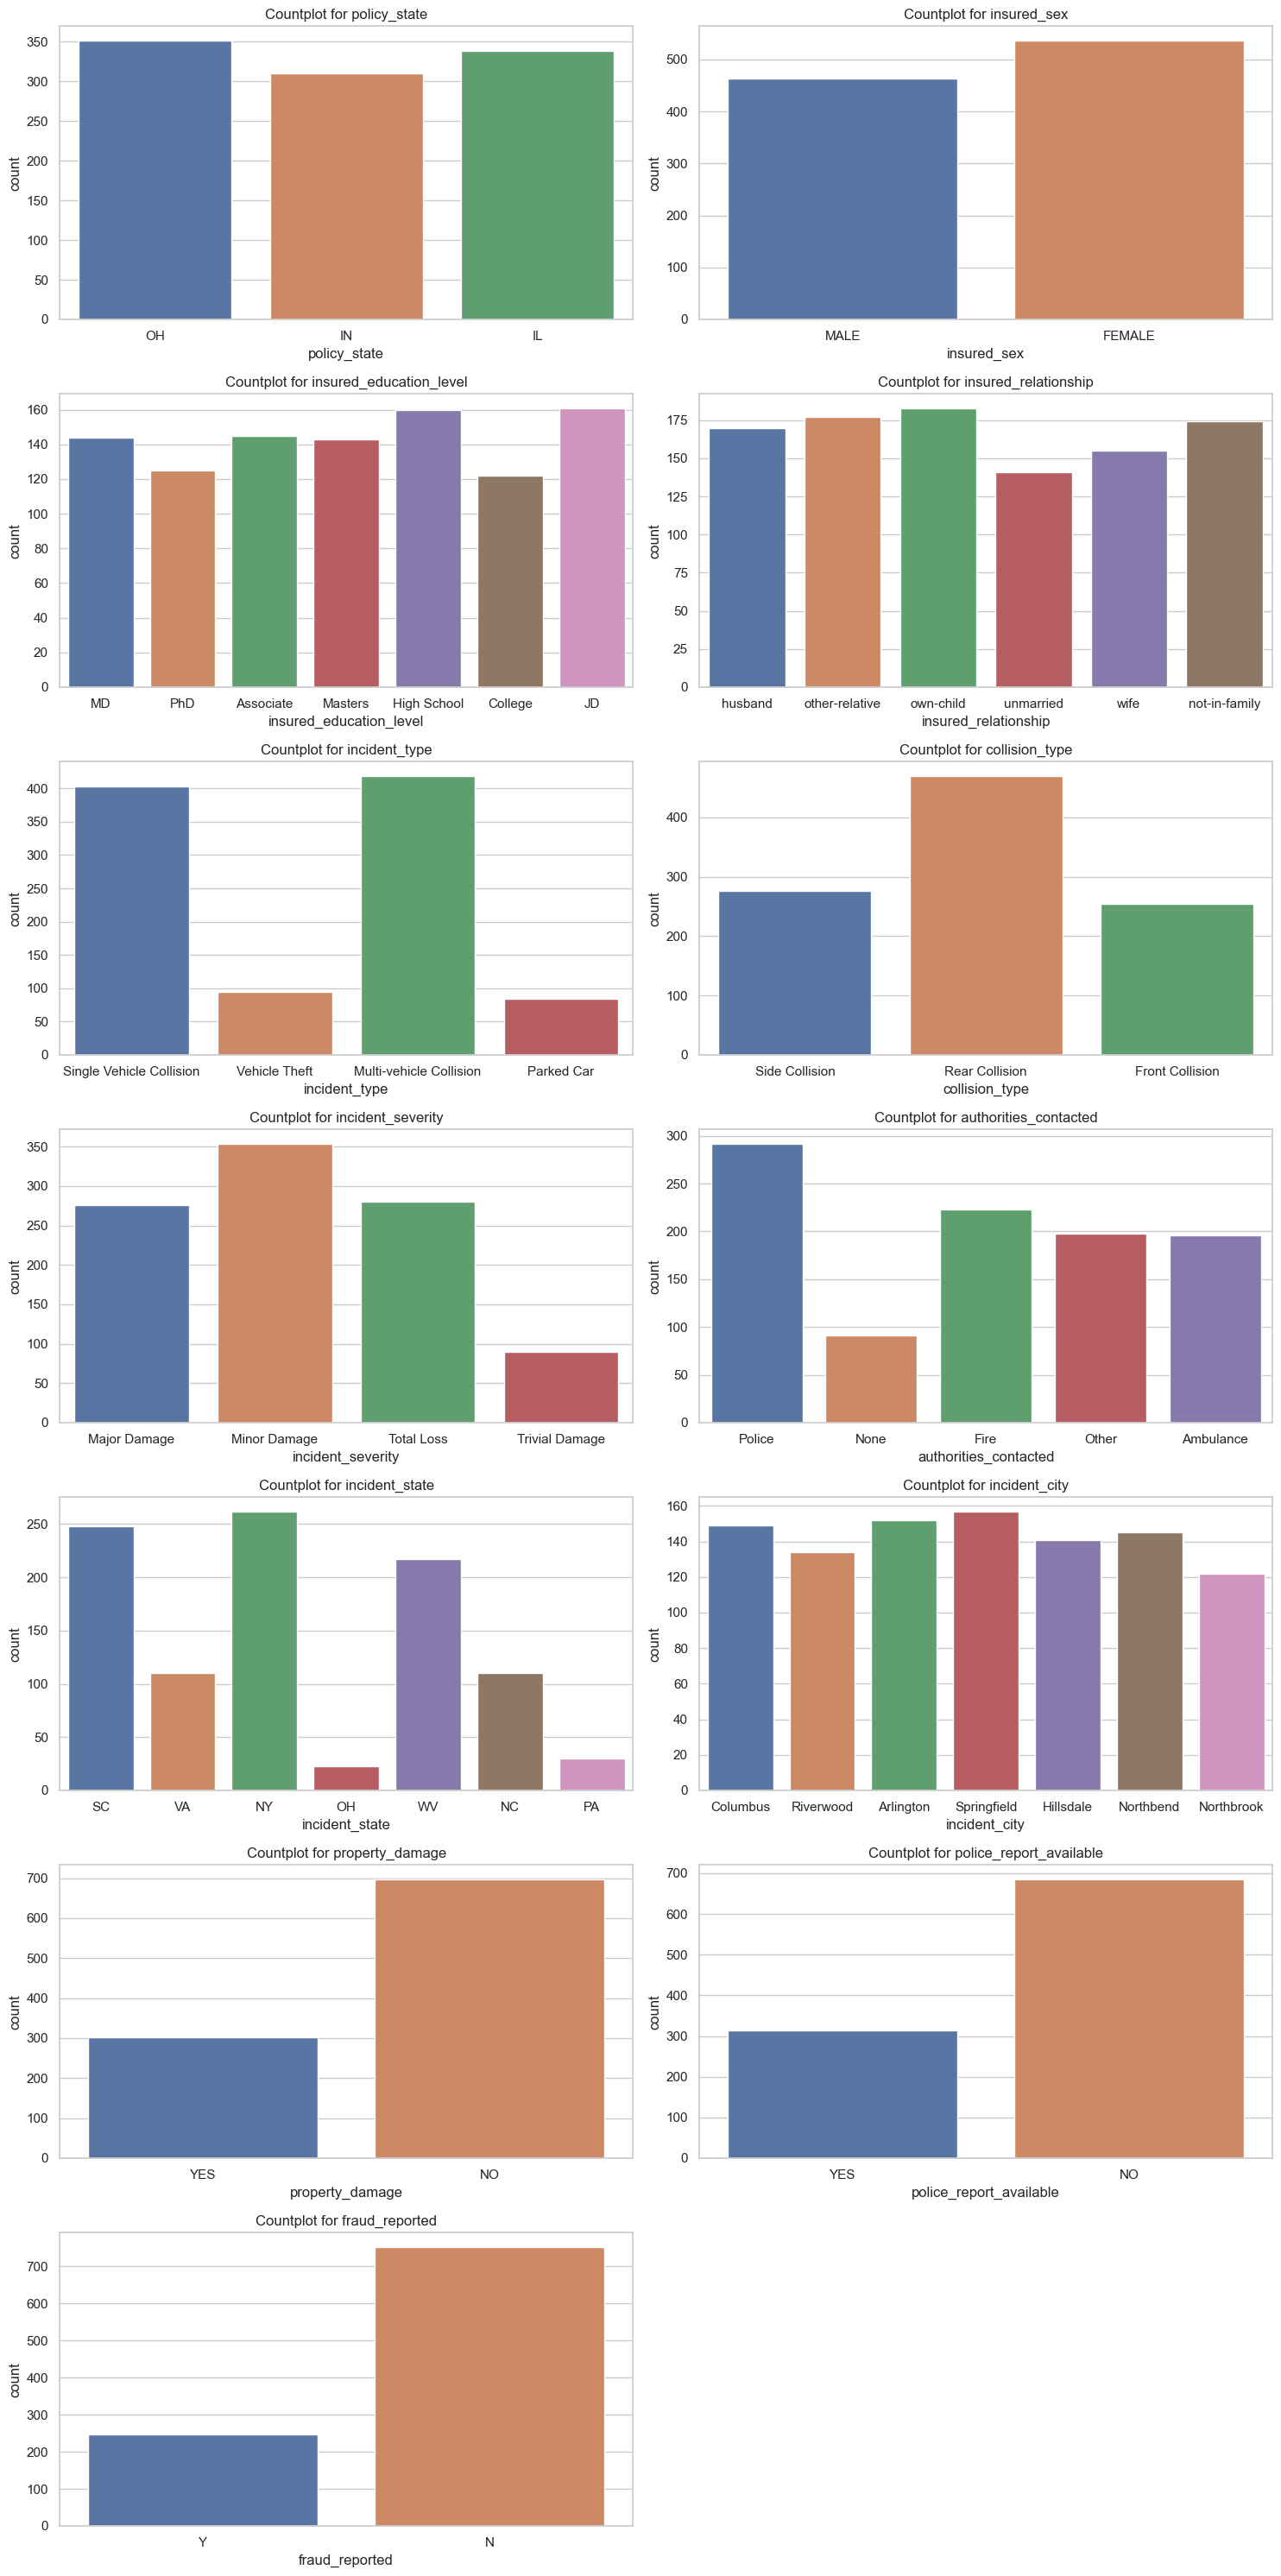

In [44]:
# Univariate analysis using count plot for categorical columns
columns_to_plot = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_type', 
                   'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
                   'property_damage', 'police_report_available', 'fraud_reported']
rows = 7
columns = 2
plt.figure(figsize = (15, 30))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.title("Countplot for " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:
#### policy_state:
In the 'policy_state' column, 'OH' has the highest count with 352 occurrences, making it the most frequently occurring state. 'IL' closely follows with 338 occurrences, and 'IN' is the third most common state with 310 occurrences.

#### insured_sex:
In the 'insured_sex' column, 'FEMALE' is the most frequent gender, appearing 537 times. 'MALE' follows with 463 occurrences.

#### insured_education_level:
Within the 'insured_education_level' column, 'JD' is the most common education level, recorded 161 times. 'High School' is just one less, with 160 occurrences. 'Associate' comes next with 145, followed by 'MD' with 144 instances. 'Masters' appears 143 times, 'PhD' is the next most frequent with 125 occurrences, and 'College' is also notable with 122 appearances.

#### insured_relationship:
In the 'insured_relationship' column, 'own-child' is the most common relationship type with 183 occurrences. 'other-relative' follows closely with 177 occurrences, while 'not-in-family' is the third most common with 174 occurrences. 'husband' has 170 occurrences, and 'wife' is next with 155 instances. 'unmarried' is recorded 141 times.

#### incident_type:
Within the 'incident_type' column, 'Multi-vehicle Collision' has the highest count with 419 occurrences. 'Single Vehicle Collision' follows closely with 403 occurrences. 'Vehicle Theft' is less common with 94 occurrences, and 'Parked Car' is the least common with 84 occurrences.

#### collision_type:
In the 'collision_type' column, 'Rear Collision' is the most common type with 470 occurrences, 'Side Collision' follows with 276 occurrences, and 'Front Collision' is the least common type with 254 occurrences.

#### incident_severity:
Within the 'incident_severity' column, 'Minor Damage' is the most frequent with 354 occurrences, followed by 'Total Loss' with 280 occurrences. 'Major Damage' is next with 276 occurrences, and 'Trivial Damage' is the least common with 90 occurrences.

#### authorities_contacted:
In the 'authorities_contacted' column, 'Police' is the most frequently contacted authority with 292 occurrences. 'Fire' follows with 223 occurrences, 'Other' is the next most common with 198 occurrences, 'Ambulance' has 196 occurrences, and 'None' is the least common with 91 occurrences.

#### incident_state:
Within the 'incident_state' column, 'NY' has the highest count with 262 occurrences, 'SC' follows with 248 occurrences, 'WV' is the third most common with 217 occurrences, and 'VA' and 'NC' are next with 110 occurrences each. 'PA' is less common with 30 occurrences, and 'OH' is the least common with 23 occurrences.

#### incident_city:
In the 'incident_city' column, 'Springfield' is the most common city with 157 occurrences, followed by 'Arlington' with 152 occurrences. 'Columbus' is the third most common with 149 occurrences, 'Northbend' has 145 occurrences, 'Hillsdale' follows with 141 occurrences, 'Riverwood' is the next most common with 134 occurrences, and 'Northbrook' is the least common with 122 occurrences.

#### property_damage:
In the 'property_damage' column, 'NO' is the most common response with 698 occurrences, while 'YES' is less common with 302 occurrences.

#### police_report_available:
Within the 'police_report_available' column, 'NO' is the most common response with 686 occurrences, while 'YES' is less common with 314 occurrences.

#### fraud_reported:
In the 'fraud_reported' column, 'N' (No) is the most common response with 753 occurrences, while 'Y' (Yes) is less common with 247 occurrences.

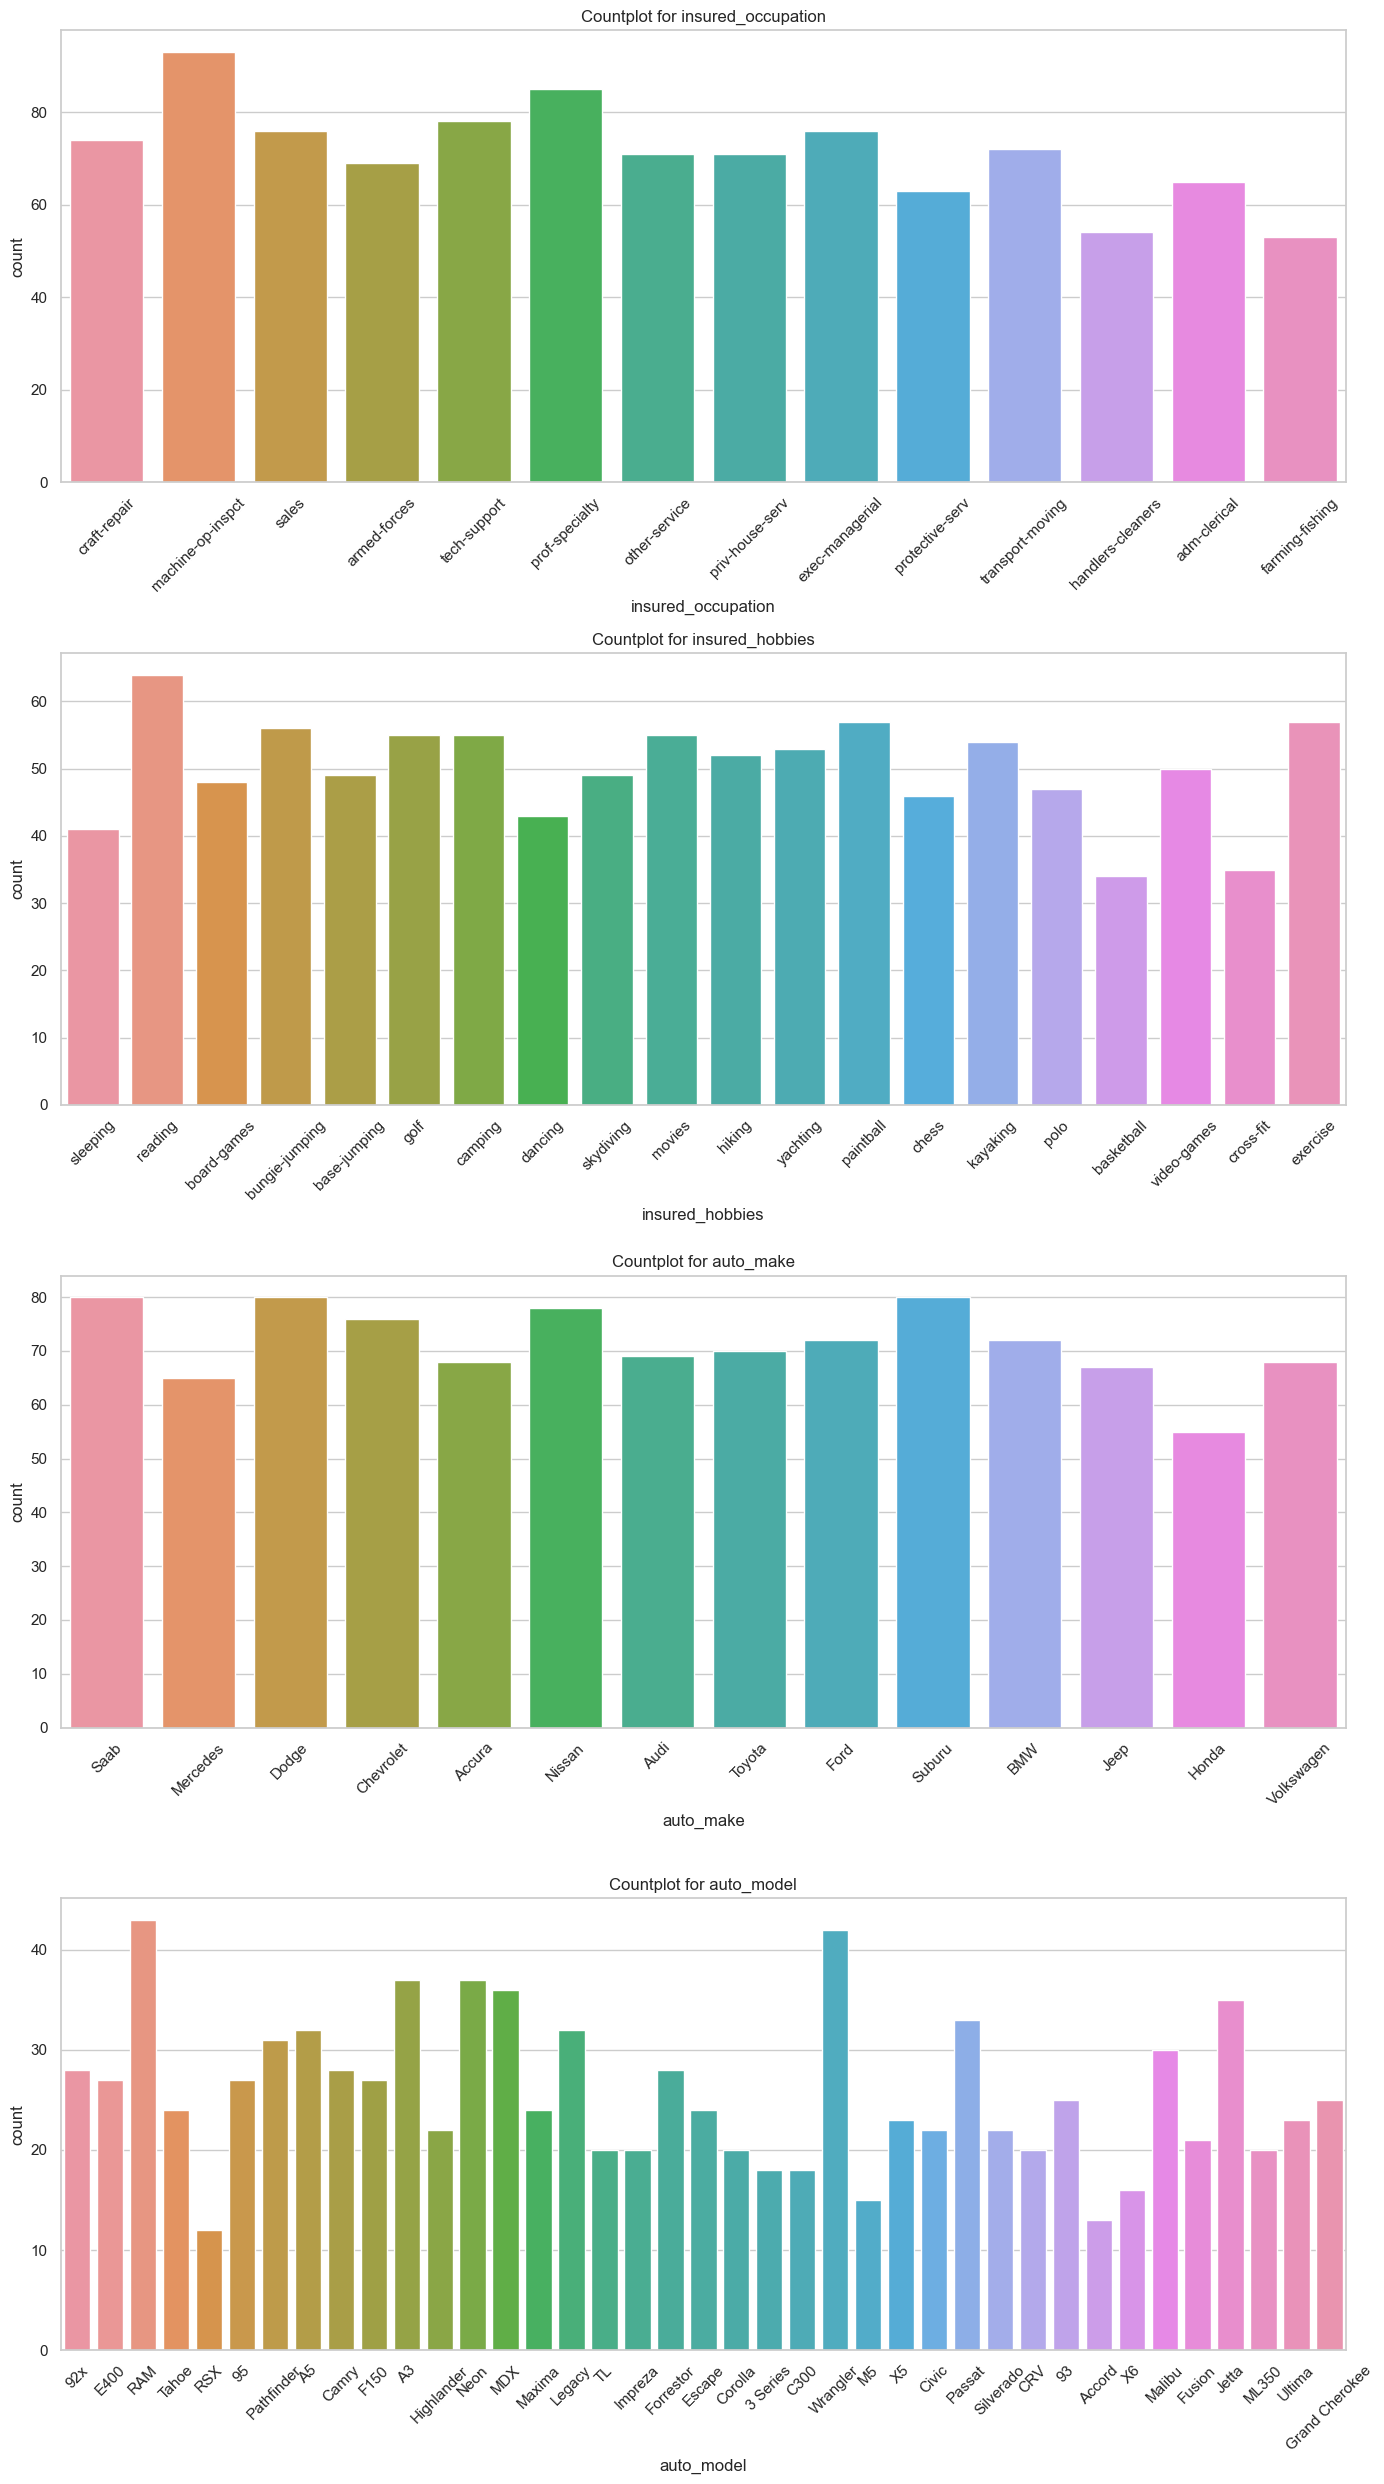

In [45]:
# Univariate analysis using count plot for categorical columns
columns_to_plot = ['insured_occupation', 'insured_hobbies', 'auto_make', 'auto_model']

rows = 4
columns = 1
plt.figure(figsize = (14, 25))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.title("Countplot for " + columns_to_plot[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

plt.show()

### Observations:
#### insured_occupation:
In the 'insured_occupation' column,'machine-op-inspct' is the most common occupation, occurring 93 times.'prof-specialty' follows with 85 occurrences. 'tech-support' is the third most frequent, appearing 78 times. 'sales' and 'exec-managerial' share the same count at 76 each. 'craft-repair' is not far behind with 74 occurrences. 'transport-moving' comes next with 72. 'other-service' and 'priv-house-serv' share 71 occurrences. 'armed-forces' is the next most common with 69 occurrences. 'adm-clerical' is close with 65 occurrences. 'protective-serv' is recorded 63 times.'handlers-cleaners' and 'farming-fishing' are also noteworthy with 54 and 53 occurrences, respectively.

#### insured_hobbies:
In the 'insured_hobbies' column, 'reading' is the most popular hobby with 64 occurrences. 'exercise' and 'paintball' share the second position with 57 appearances each. 'bungie-jumping' is next with 56 occurrences. Several hobbies including 'movies', 'golf', and 'camping' have 55 occurrences. 'kayaking' follows closely with 54. 'yachting' is not far behind with 53 appearances. Other hobbies include 'hiking' (52), 'video-games' (50), 'skydiving' (49), 'base-jumping' (49), 'board-games' (48), 'polo' (47), 'chess' (46), 'dancing' (43), 'sleeping' (41), 'cross-fit' (35), and 'basketball' (34).

#### auto_make:
In the 'auto_make' column,'Saab', 'Dodge', and 'Suburu' share the highest count with 80 occurrences each. 'Nissan' is next with 78 occurrences. 'Chevrolet' and 'Ford' share 76 occurrences each. 'BMW' and 'Toyota' share 72 occurrences each. 'Audi' and 'Accura' share 69 occurrences each. 'Volkswagen' and 'Jeep' share 68 occurrences each. 'Mercedes' is next with 65 occurrences. 'Honda' is the least common among the major makes with 55 occurrences.

#### auto_model:
In the 'auto_make' column, the most common auto models are 'RAM' and 'Wrangler,' each appearing 43 times. 'A3' and 'Neon' are the next most frequent with 37 occurrences each. 'MDX' is just behind with 36 occurrences. 'Jetta' has 35 occurrences, and 'Passat' follows closely with 33 occurrences. 'A5' and 'Legacy' are next with 32 occurrences each. 'Pathfinder' is also notable with 31 occurrences. Several other models, including 'Malibu,' '92x,' 'Camry,' and 'Forrestor,' have 28 or more occurrences. 'F150' and '95' each appear 27 times. 'E400' also has 27 occurrences. '93' and 'Grand Cherokee' have 25 occurrences each. 'Escape' and 'Tahoe' both appear 24 times. 'Maxima' and 'Ultima' have 23 occurrences each. 'X5' and 'Highlander' each appear 23 times. 'Civic' and 'Silverado' have 22 occurrences each. 'Fusion' follows with 21 occurrences. 'ML350' and 'Impreza' have 20 occurrences each. 'Corolla,' 'TL,' 'CRV,' and 'C300' all have 20 occurrences. '3 Series' has 18 occurrences, and 'X6' follows closely with 16 occurrences. 'M5' and 'Accord' are the least common auto models with 15 and 13 occurrences, respectively.'RSX' has the lowest count with 12 occurrences.

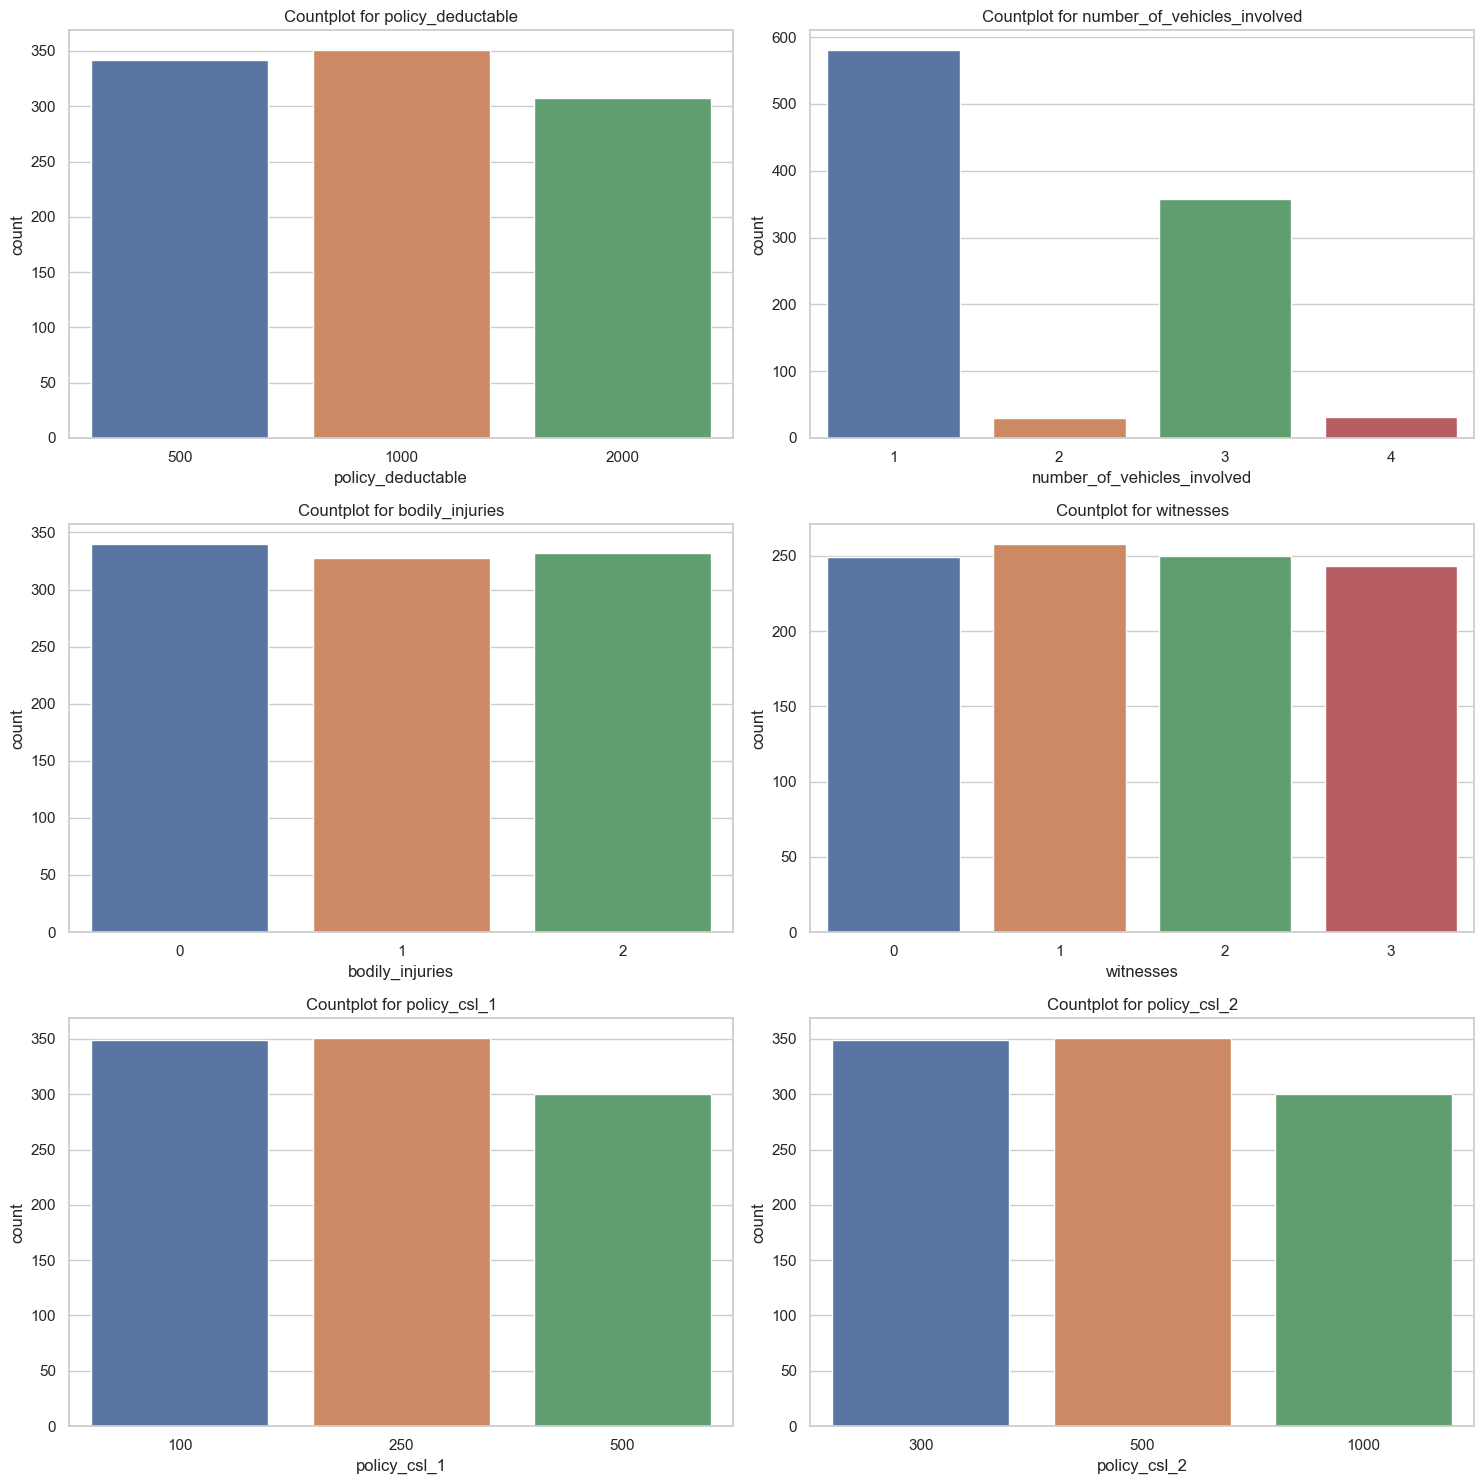

In [46]:
# Univariate analysis using count plot for numerical columns
columns_to_plot = ['policy_deductable', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'policy_csl_1', 
                   'policy_csl_2']

rows = 3
columns = 2
plt.figure(figsize = (15, 15))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.title("Countplot for " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:
#### policy_deductable:
In the 'policy_deductable' column, there are three unique values, with the most frequent deductible amount being 1000, appearing 351 times. This is followed by 500 (342) and 2000 (307).

#### number_of_vehicles_involved:
In the 'number_of_vehicles_involved' column has four unique values, with the most frequent number of vehicles involved in incidents being 1, appearing 581 times. This is followed by 3 (358), 4 (31), and 2 (30).

#### bodily_injuries:
In the 'bodily_injuries' column, there are three unique values. The most frequent number of bodily injuries is 1, with 258 occurrences, followed by 2 (250) and 0 (249).

#### witnesses:
In the 'witnesses' column, there are four unique values, the most frequent number of witnesses is 2, with 200 occurrences. This is followed by 3 (196), 0 (196), and 1 (196).

#### policy_csl_1:
In the 'policy_csl_1' column, there are three unique values. The most frequent combined single limit option 1 is 250, with 351 occurrences. This is followed by 100 (349) and 500 (300).

#### policy_csl_2:
In the 'policy_csl_2' column, which contains three unique values, the most frequent combined single limit option 2 is 500, with 351 occurrences. This is followed by 300 (349) and 1000 (300).

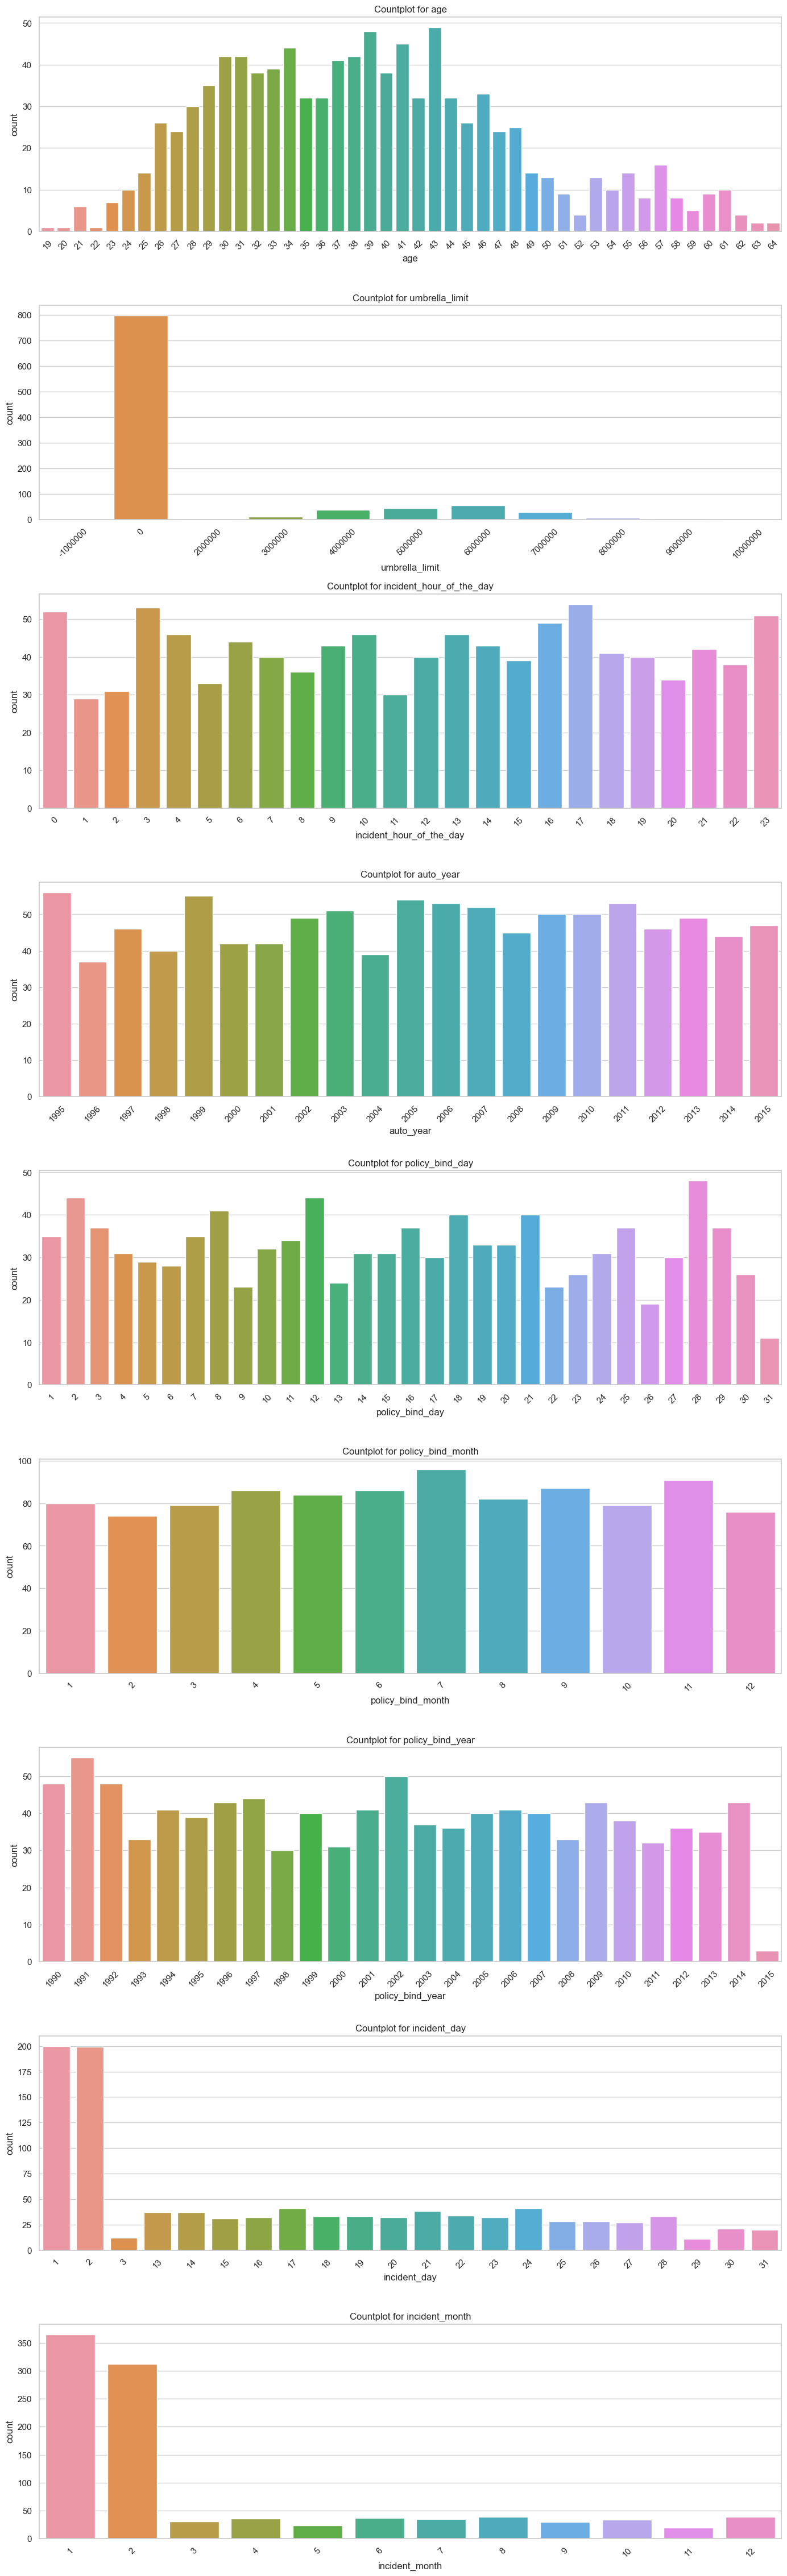

In [47]:
# Univariate analysis using count plot for numerical columns
columns_to_plot = ['age', 'umbrella_limit', 'incident_hour_of_the_day', 'auto_year', 'policy_bind_day', 'policy_bind_month',
                   'policy_bind_year', 'incident_day', 'incident_month']

rows = 10
columns = 1
plt.figure(figsize = (14, 50))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[columns_to_plot[i]]) 
    plt.title("Countplot for " + columns_to_plot[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

plt.show()

### Observations:

#### age:
In the 'age' column, the most frequent age is 43, with 49 individuals falling into this category. Following closely, the ages 39 (48), 41 (45), 34 (44), 38 (42), and 30 (42) are also relatively common. The least frequent ages are 64 and 63, with only 2 individuals in each of these age categories.

#### umbrella_limit:
In the 'umbrella_limit' column, there are 11 unique values, and the most frequent limit is 0, with 798 occurrences. Other limit values include 6000000 (57), 5000000 (46), 4000000 (39), and so on. The least frequent limit is -1000000, with only 1 occurrence.

#### incident_hour_of_the_day:
In the 'incident_hour_of_the_day' column, which represents the hour of the day when incidents occurred, the most frequent hour is 17, with 54 occurrences. This is followed by 3 (53), 0 (52), 23 (51), and so on. The least frequent hour is 1, with 29 occurrences.

#### auto_year:
In the 'auto_year' column, which indicates the year of the auto, the most frequent year is 1995, with 56 occurrences. This is followed by 1999 (55), 2005 (54), 2006 (53), and so on, with the least frequent year being 1996, appearing 37 times.

#### policy_bind_day:
In the 'policy_bind_day' there are 31 unique values, representing the day of the month when policies were bound. The most frequent day is 28, with 48 occurrences, followed by 12 (44), 2 (44), and so on. The least frequent day is 31, with 11 occurrences.

#### policy_bind_month:
In the 'policy_bind_month' column, there are 12 unique values representing the month when policies were bound, the most frequent month is 7, with 96 occurrences. This is followed by 11 (91), 9 (87), and so on, with the least frequent month being 2, with 74 occurrences.

#### policy_bind_year:
In the 'policy_bind_year' column, there are 26 unique values, indicating the year when policies were bound. The most frequent year is 1991, with 55 occurrences, followed by 2002 (50), 1992 (48), and so on, with the least frequent year being 2015, appearing 3 times.

#### incident_day
The 'incident_day' column, which represents the day of the month when incidents occurred, there are 31 unique values. The most frequent day is 7, with 48 occurrences, followed by 12 (44), 2 (44), and so on, with the least frequent day being 31, with 11 occurrences.

#### incident_month
The 'incident_month' column contains 12 unique values, representing the month when incidents occurred. The most frequent month is 1, with 365 occurrences, followed by 2 (312), 8 (39), and so on.

### Pie Chart 

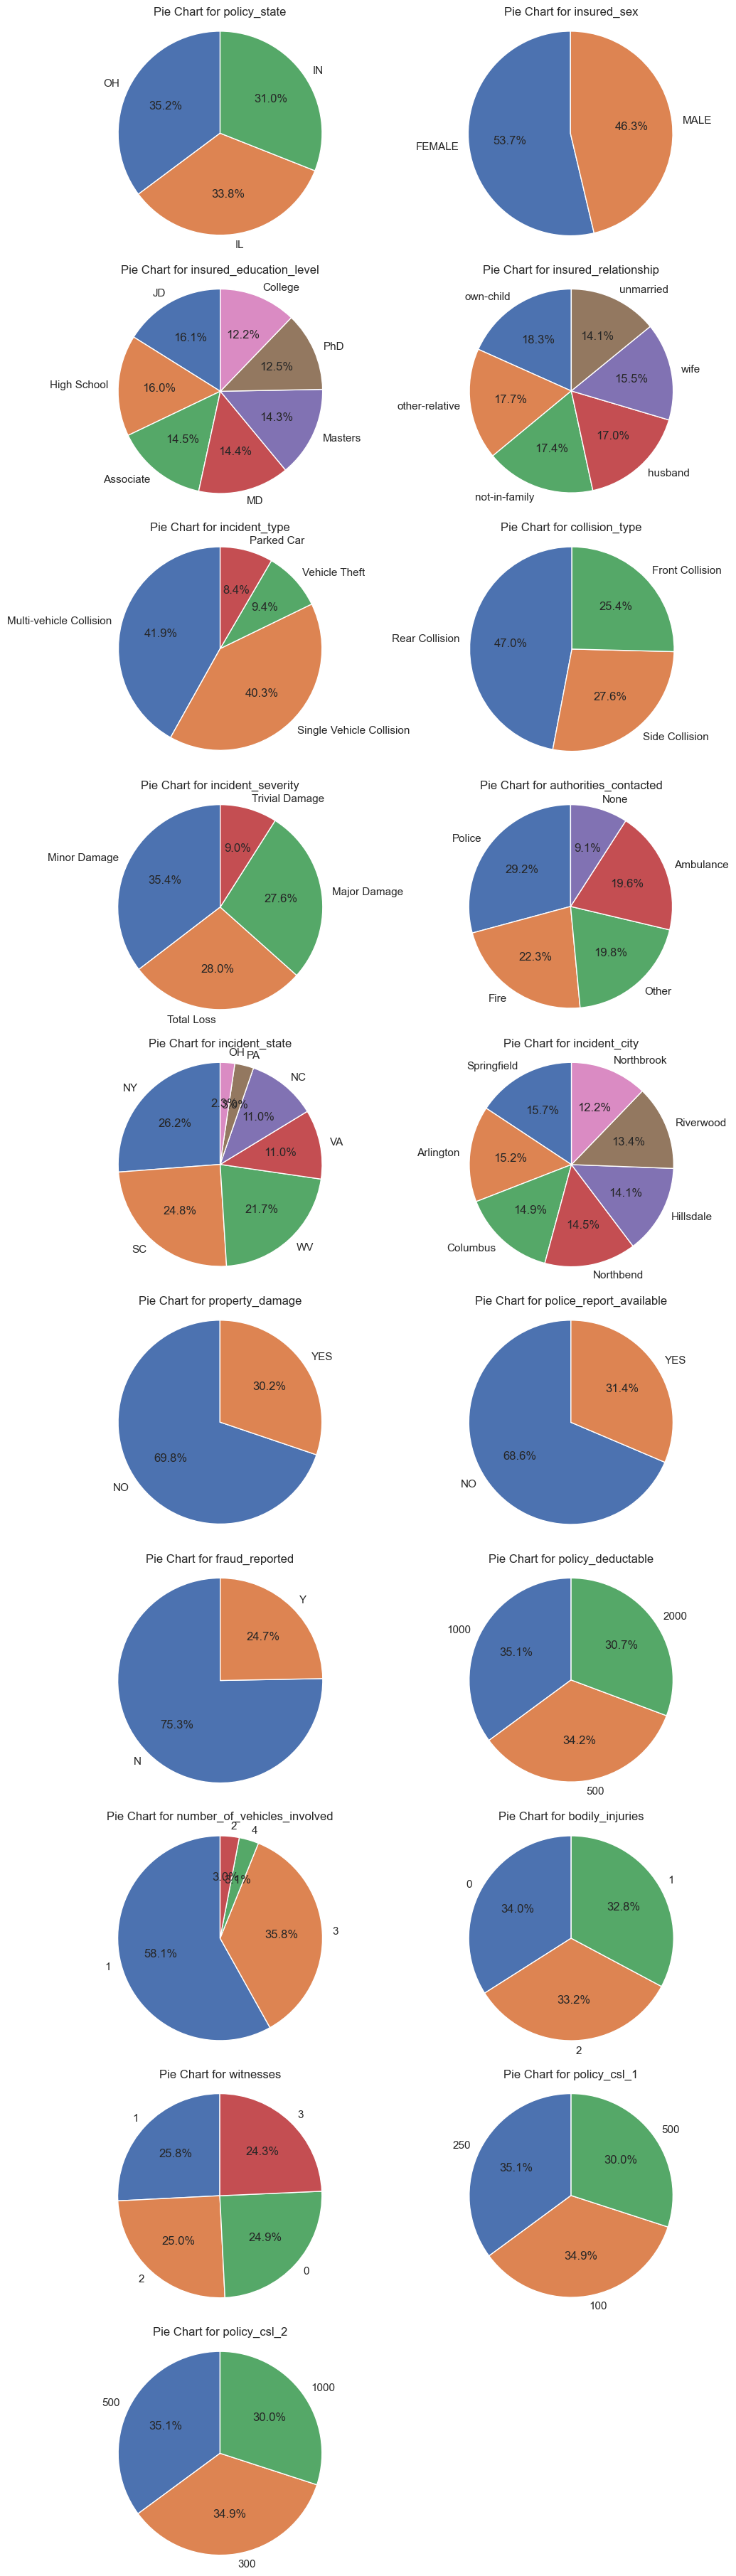

In [48]:
# Univariate analysis using pie chart 
columns_to_plot = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_type', 
                   'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
                   'property_damage', 'police_report_available', 'fraud_reported', 'policy_deductable', 
                   'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'policy_csl_1', 
                   'policy_csl_2']
rows = 11
columns = 2
plt.figure(figsize = (10, 40))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    category_counts = df[columns_to_plot[i]].value_counts()
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%', startangle = 90)
    plt.title("Pie Chart for " + columns_to_plot[i])
    plt.axis('equal')
plt.tight_layout()
plt.show()

### Observations:
#### policy_state:
Approximately 35.2% of the dataset is from Ohio ('OH'), 33.8% from Illinois ('IL'), and 31.0% from Indiana ('IN').

#### insured_sex:
In the dataset, approximately 53.7% of individuals are female, and about 46.3% are male.

#### insured_education_level:
The distribution of education levels is as follows: 16.1% have a Juris Doctor ('JD'), 16.0% have a High School education, 14.5% have an Associate degree, 14.4% have a Medical Doctor ('MD') degree, 14.3% have a Master's degree, and 12.5% have a Ph.D., while 12.2% have a College degree.

#### insured_relationship:
In the dataset, approximately 18.3% are 'own-child,' 17.7% are 'other-relative,' 17.4% are 'not-in-family,' 17.0% are 'husband,' 15.5% are 'wife,' and 14.1% are 'unmarried.'

#### incident_type:
The majority of incidents are 'Multi-vehicle Collision' (41.9%), followed closely by 'Single Vehicle Collision' (40.3%), with 'Vehicle Theft' at 9.4% and 'Parked Car' at 8.4%.

#### collision_type:
The distribution of collision types is as follows: 47.0% are 'Rear Collision,' 27.6% are 'Side Collision,' and 25.4% are 'Front Collision.'

#### incident_severity:
Among the incidents, approximately 35.4% result in 'Minor Damage,' 28.0% result in 'Total Loss,' 27.6% result in 'Major Damage,' and 9.0% result in 'Trivial Damage.'

#### authorities_contacted:
In the dataset, 29.2% of cases involve contacting the 'Police,' 22.3% involve 'Fire,' 19.8% involve 'Other' authorities, 19.6% involve an 'Ambulance,' and 9.1% involve 'None.'

#### incident_state:
The distribution of states involved in incidents is as follows: 26.2% in New York ('NY'), 24.8% in South Carolina ('SC'), 21.7% in West Virginia ('WV'), 11.0% in Virginia ('VA'), 11.0% in North Carolina ('NC'), 3.0% in Pennsylvania ('PA'), and 2.3% in Ohio ('OH').

#### incident_city:
The distribution of incidents across cities is as follows: 15.7% in Springfield, 15.2% in Arlington, 14.9% in Columbus, 14.5% in Northbend, 14.1% in Hillsdale, 13.4% in Riverwood, and 12.2% in Northbrook.

#### property_damage:
Approximately 69.8% of incidents did not involve property damage, while 30.2% of incidents resulted in property damage.

#### police_report_available:
In the dataset, 68.6% of cases do not have a police report available, while 31.4% have a police report available.

#### fraud_reported:
About 24.7% of cases involved fraud ('Y'), while 75.3% did not ('N').

#### policy_deductable:
The distribution of policy deductibles is as follows: 35.1% have a deductible of 1,000, 34.2% have a deductible of 500, and 30.7% have a deductible of 2,000.

#### number_of_vehicles_involved:
Among incidents, 58.1% involve a single vehicle, 35.8% involve three vehicles, 3.1% involve four vehicles, and 3.0% involve two vehicles.

#### bodily_injuries:
The distribution of bodily injuries is as follows: 34.0% involve no injuries, 33.2% involve two injuries, and 32.8% involve one injury.

#### witnesses:
The distribution of witnesses is as follows: 25.8% involve one witness, 25.0% involve two witnesses, 24.9% involve no witnesses, and 24.3% involve three witnesses.

#### policy_csl_1:
Approximately 35.1% of policies have a Combined Single Limit (CSL) of 250, 34.9% have a CSL of 100, and 30.0% have a CSL of 500.

#### policy_csl_2:
Among policies, 35.1% have a CSL of 500, 34.9% have a CSL of 300, and 30.0% have a CSL of 1,000.

### Histogram

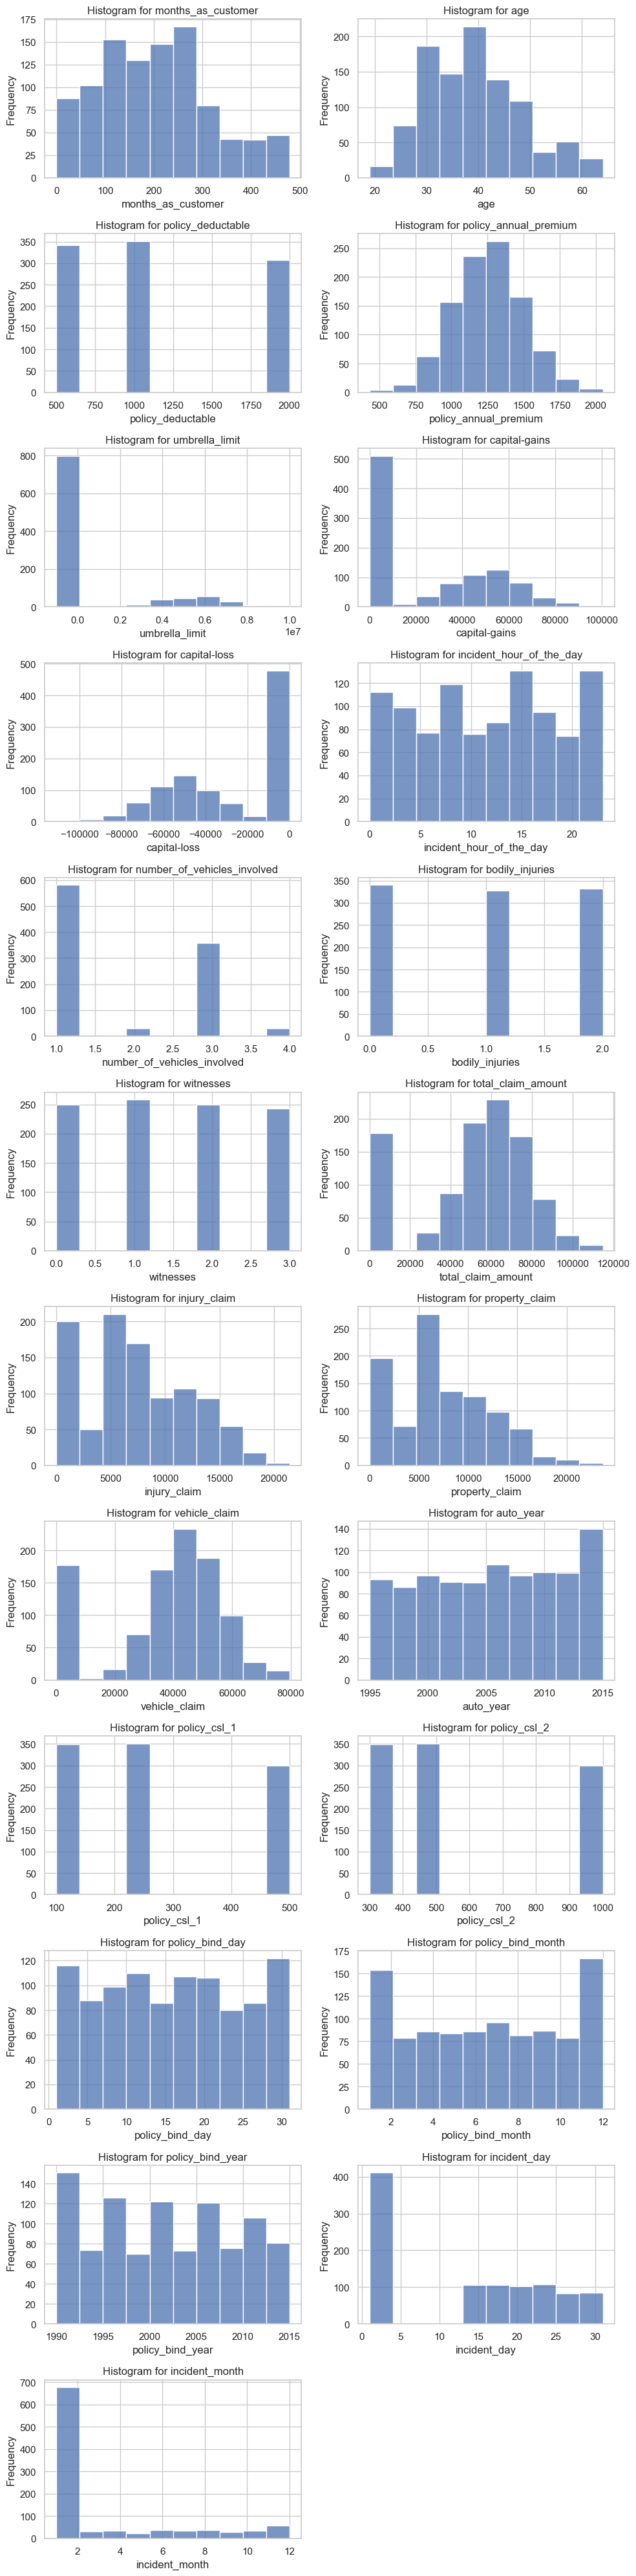

In [49]:
# Univariate analysis using histogram for numerical columns
columns_to_plot = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains',
                   'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
                   'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_csl_1', 
                   'policy_csl_2', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']

rows = 12
columns = 2

plt.figure(figsize = (10, 40))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Histogram for " + columns_to_plot[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

### Observations:

#### months_as_customer:
The distribution of 'months_as_customer' varies widely, with customers ranging from those who are very new (0 months) to those who have been with the company for a significant period (up to 479 months). The histogram suggests a right-skewed distribution, indicating that more customers tend to have shorter relationships with the company, with a few having very long-term relationships.

#### age:
The age of policyholders varies, with a minimum age of 19 and a maximum age of 64. The histogram shows a somewhat symmetric distribution with a peak around the mid-30s to early 40s. This suggests that the majority of policyholders fall within this age range, with fewer at the extremes.

#### policy_deductable:
The 'policy_deductable' column indicates the deductible amount associated with insurance policies. The data ranges from a minimum of 500 to a maximum of 2000. The histogram shows that there are peaks at the minimum (500) and maximum (2000) values, indicating that many policies have these deductible amounts.

#### policy_annual_premium:
The 'policy_annual_premium' varies widely, with minimum and maximum values of 433.33 and 2047.59, respectively. The histogram suggests a somewhat right-skewed distribution, indicating that more policies have lower annual premiums, with fewer having higher premiums.

#### umbrella_limit:
The 'umbrella_limit' represents the maximum coverage limit for policyholders. The data has a wide range from -1,000,000 to 10,000,000. The histogram shows that a large number of policyholders have zero umbrella coverage, with relatively few having high limits.

#### capital-gains:
The 'capital-gains' column indicates the amount of capital gains associated with the policies. The data ranges from 0 to 100,500. The histogram reveals that many policyholders have zero capital gains, with a smaller number having gains in the higher range.

#### capital-loss:
The 'capital-loss' column reflects the amount of capital losses associated with policies. The data varies from -111,100 to 0. The histogram shows a concentration of policies with no capital losses, and a smaller number with significant losses.

#### incident_hour_of_the_day:
The 'incident_hour_of_the_day' represents the time of day when incidents occur. The data spans from 0 (midnight) to 23 (11:00 PM). The histogram displays a distribution with peaks during the day and lower incidents during the early morning and late night hours.

#### number_of_vehicles_involved:
The 'number_of_vehicles_involved' column reflects the count of vehicles involved in incidents. The data ranges from 1 to 4. The histogram shows that single-vehicle incidents are most common, with progressively fewer incidents involving more vehicles.

#### bodily_injuries:
The 'bodily_injuries' data indicates the number of bodily injuries reported in incidents. It ranges from 0 to 2. The histogram shows that incidents with no bodily injuries are the most common, with fewer involving injuries.

#### witnesses:
The 'witnesses' column represents the number of witnesses in incidents. The data varies from 0 to 3. The histogram reveals that incidents with one witness are the most common, with fewer involving more witnesses.

#### total_claim_amount:
The 'total_claim_amount' varies widely, ranging from 100 to 114,920. The histogram suggests a right-skewed distribution, with a concentration of claims at lower values and a few larger claims.

#### injury_claim:
The 'injury_claim' data indicates the amount of injury claims associated with policies. The histogram shows that many claims are relatively low, with a smaller number of larger injury claims.

#### property_claim:
The 'property_claim' column represents the amount of property claims associated with policies. The histogram indicates a distribution with many claims at lower values and fewer at higher values.

#### vehicle_claim:
The 'vehicle_claim' data reflects the amount of vehicle claims associated with policies. The histogram shows that claims vary widely, with a concentration at lower values and fewer at higher amounts.

#### auto_year:
The 'auto_year' represents the year of the insured vehicle. The data ranges from 1995 to 2015. The histogram shows that more policies are associated with vehicles from the mid-2000s, with fewer from earlier and later years.

#### policy_csl_1:
The 'policy_csl_1' column reflects policy coverage limits. The data varies from 100 to 500. The histogram suggests a distribution with coverage limits primarily at the minimum (100) and maximum (500) values.

#### policy_csl_2:
The 'policy_csl_2' data represents policy coverage limits. It ranges from 300 to 1000. The histogram shows that policy coverage is concentrated around the minimum (300) and maximum (1000) values.

#### policy_bind_day:
The 'policy_bind_day' represents the day of the month when policies are bound. The data ranges from 1 to 31. The histogram suggests that policy binding is distributed across the month, with some peaks at specific days.

#### policy_bind_month:
The 'policy_bind_month' indicates the month when policies are bound. The data ranges from 1 to 12. The histogram shows that policy binding occurs throughout the year, with some months having more policies bound than others.

#### policy_bind_year:
The 'policy_bind_year' reflects the year when policies are bound. The data ranges from 1990 to 2015. The histogram shows that policy binding is distributed across various years, with peaks at certain years.

### Violin Plot

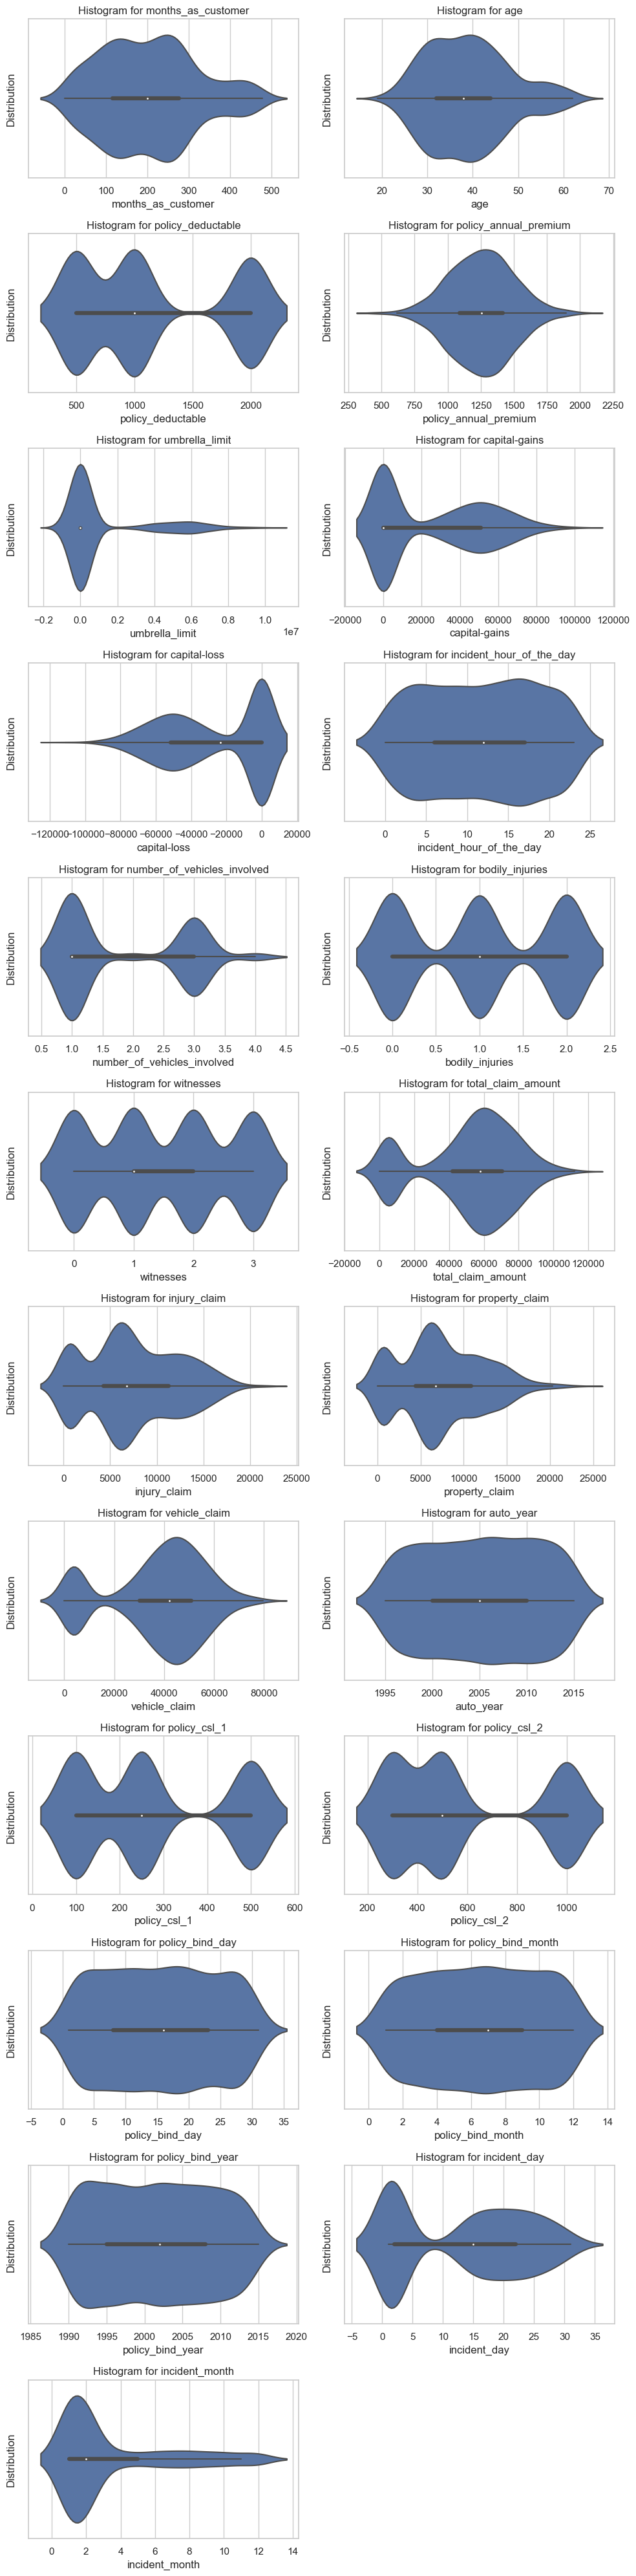

In [50]:
# Univariate analysis using violin plot for numerical columns
columns_to_plot = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains',
                   'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
                   'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_csl_1', 
                   'policy_csl_2', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month']

rows = 12
columns = 2

plt.figure(figsize = (10, 40))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.violinplot(df[columns_to_plot[i]], bins = 10) 
    plt.title("Histogram for " + columns_to_plot[i])
    plt.ylabel("Distribution")
    plt.tight_layout()

plt.show()

### Observations:

#### months_as_customer:
The distribution of 'months_as_customer' varies widely, with a right-skewed pattern. Most customers have shorter relationships with the company, and there are a few with very long-term relationships, creating a pronounced concentration of data on the lower end of the spectrum.

#### age:
In the case of 'age', the distribution exhibits a somewhat symmetric shape, with a peak around the mid-30s to early 40s. This suggests that the majority of policyholders fall within this age range, and the distribution is relatively balanced without extreme outliers.

#### policy_deductable:
For 'policy_deductable', there are peaks at both the minimum (500) and maximum (2000) values, indicating that many policies have these specific deductible amounts. This dual-peaked pattern is a notable feature in the distribution.

#### policy_annual_premium:
The distribution of 'policy_annual_premium' is somewhat right-skewed, with a concentration of policies having lower annual premiums. While there are some policies with higher premiums, the majority falls within the lower premium range.

#### umbrella_limit:
In the case of 'umbrella_limit', a significant number of policyholders have zero umbrella coverage, creating a prominent peak at zero. There are relatively few policies with high umbrella limits, resulting in a long and stretched distribution.

#### capital-gains:
The distribution of 'capital-gains' is characterized by many policyholders having zero capital gains, with a smaller number of policyholders having positive gains. The distribution is right-skewed, with a concentration around zero.

#### capital-loss:
'Capital-loss' exhibits a bimodal distribution with peaks at zero and negative values, indicating a concentration of policies with no capital losses and another cluster of policies with significant losses. This bimodal shape is a unique feature of this distribution.

#### incident_hour_of_the_day:
For 'incident_hour_of_the_day,' the distribution shows varying incident frequencies throughout the day. There are peaks during daytime hours, with fewer incidents during the early morning and late night. This creates a violin plot that widens during the day and narrows during off-peak hours.

#### number_of_vehicles_involved:
In the case of 'number_of_vehicles_involved', the distribution suggests that single-vehicle incidents are most common, with progressively fewer incidents involving more vehicles. The shape of the violin plot reflects this decreasing trend.

#### bodily_injuries:
'Violin plot for 'bodily_injuries' shows a concentration of incidents with no bodily injuries, making it a notable peak. The distribution also includes incidents with bodily injuries, but the majority falls within the category of no injuries.

#### witnesses:
The 'witnesses' distribution displays a concentration of incidents with one witness, creating a peak in the violin plot. There are fewer incidents with two or three witnesses, resulting in narrower segments for these categories.

#### total_claim_amount:
The distribution of 'total_claim_amount' exhibits a right-skewed pattern, with a concentration of claims at lower values and a few larger claims. This right-skewed shape is evident in the widening portion of the violin plot on the right side.

#### injury_claim:
'Injury_claim' shows a distribution with a concentration of relatively low claims, with a smaller number of larger claims. The violin plot reflects this concentration at lower claim amounts.

#### property_claim:
For 'property_claim', the distribution includes many claims at lower values, resulting in a concentration on the left side of the violin plot. There are fewer claims at higher values.

#### vehicle_claim:
The distribution of 'vehicle_claim' features claims that vary widely in value, with a concentration at lower amounts and fewer at higher levels.

#### auto_year:
In the 'auto_year' distribution, there is a concentration of policies associated with vehicles from the mid-2000s, resulting in a peak in the violin plot around that period. The violin plot widens around the peak year, indicating higher policy counts for those years.

#### policy_csl_1:
The distribution of 'policy_csl_1' features coverage limits primarily at the minimum (100) and maximum (500) values. The violin plot illustrates this concentration, with peaks at both ends of the range.

#### policy_csl_2:
For 'policy_csl_2', the distribution shows policy coverage concentrated around the minimum (300) and maximum (1000) values. The violin plot highlights this concentration with peaks at these specific coverage limits.

#### policy_bind_day:
The distribution of 'policy_bind_day' is spread across the month, with some peaks at specific days, creating distinctive peaks and valleys in the violin plot.

#### policy_bind_month:
The distribution of 'policy_bind_month' shows policy binding occurring throughout the year, with some months having more policies bound than others. The violin plot illustrates the varying policy binding frequencies for different months.

#### policy_bind_year:
For 'policy_bind_year', the distribution is spread across various years, with notable peaks at certain years. The violin plot represents the distribution of policy binding years, highlighting these peaks.

#### incident_day:
The distribution of 'incident_day' shows a spread of values from 1 to 31, indicating the day of the month when incidents occur. The violin plot highlights the varied distribution, with some peaks at specific days, creating distinctive peaks and valleys in the plot.

#### incident_month:
For 'incident_month', the distribution represents the month when incidents occur, with values ranging from 1 to 12. The violin plot illustrates that incidents occur throughout the year, with some months having more incidents than others. This distribution is reflected in the violin plot, showcasing the varying incident frequencies for different months.

## Bivariate Analysis

### Bar Plot

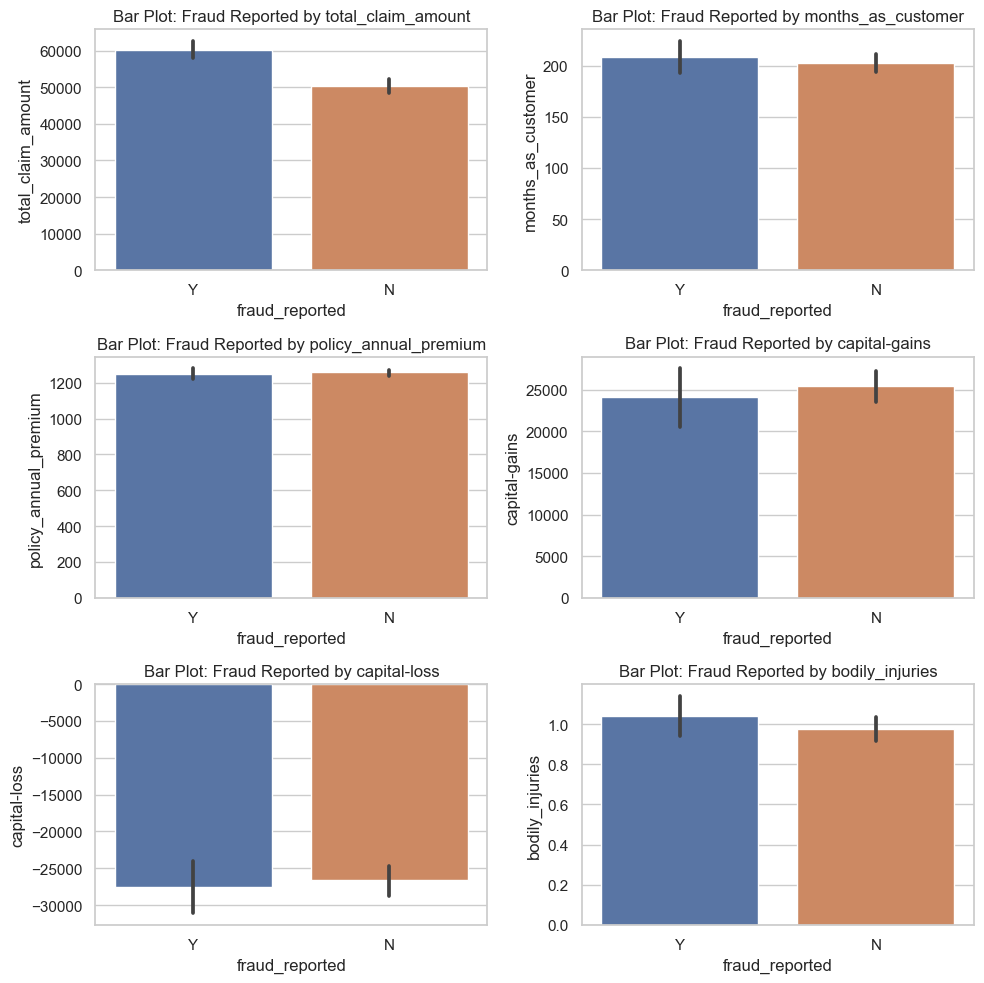

In [51]:
# Bivariate analysis using bar plot
columns_to_plot = ['total_claim_amount', 'months_as_customer', 'policy_annual_premium', 'capital-gains', 'capital-loss',
                   'bodily_injuries']
rows = 3
columns = 2

plt.figure(figsize = (10, 10))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i+1)
    sns.barplot(x = 'fraud_reported', y = columns_to_plot[i], data = df)
    plt.title("Bar Plot: Fraud Reported by " + columns_to_plot[i])
    plt.tight_layout()

plt.show()

### Observations:

#### fraud_reported by total_claim_amount: 
Fraudulent cases ('Y') tend to have higher total claim amounts, with an average of approximately 60,302.11, compared to non-fraudulent cases ('N'), which have an average of approximately 50,288.61.

#### fraud_reported by months_as_customer: 
Fraudulent cases ('Y') have a shorter average customer duration of approximately 208.08 months, while non-fraudulent cases ('N') have a slightly longer average customer duration of approximately 202.60 months.

#### fraud_reported by policy_annual_premium: 
The average policy annual premium is nearly identical for both fraudulent ('Y') and non-fraudulent ('N') cases, with 'Y' at approximately 1,250.24 and 'N' at approximately 1,258.43.

#### fraud_reported by capital-gains: 
Non-fraudulent cases ('N') tend to have a higher average capital gain of 1,250.24, while fraudulent cases ('Y') have a lower average capital gain of 208.08.

#### fraud_reported by capital-loss: 
Fraudulent cases ('Y') tend to have more negative capital losses, with an average of -27,522.67, while non-fraudulent cases ('N') have slightly less negative capital losses, with an average of -26,554.58.

#### fraud_reported by bodily_injuries: 
The difference in the average number of bodily injuries is relatively small, with fraudulent cases ('Y') having an average of 1.04, and non-fraudulent cases ('N') having an average of 0.98.

### Count Plot

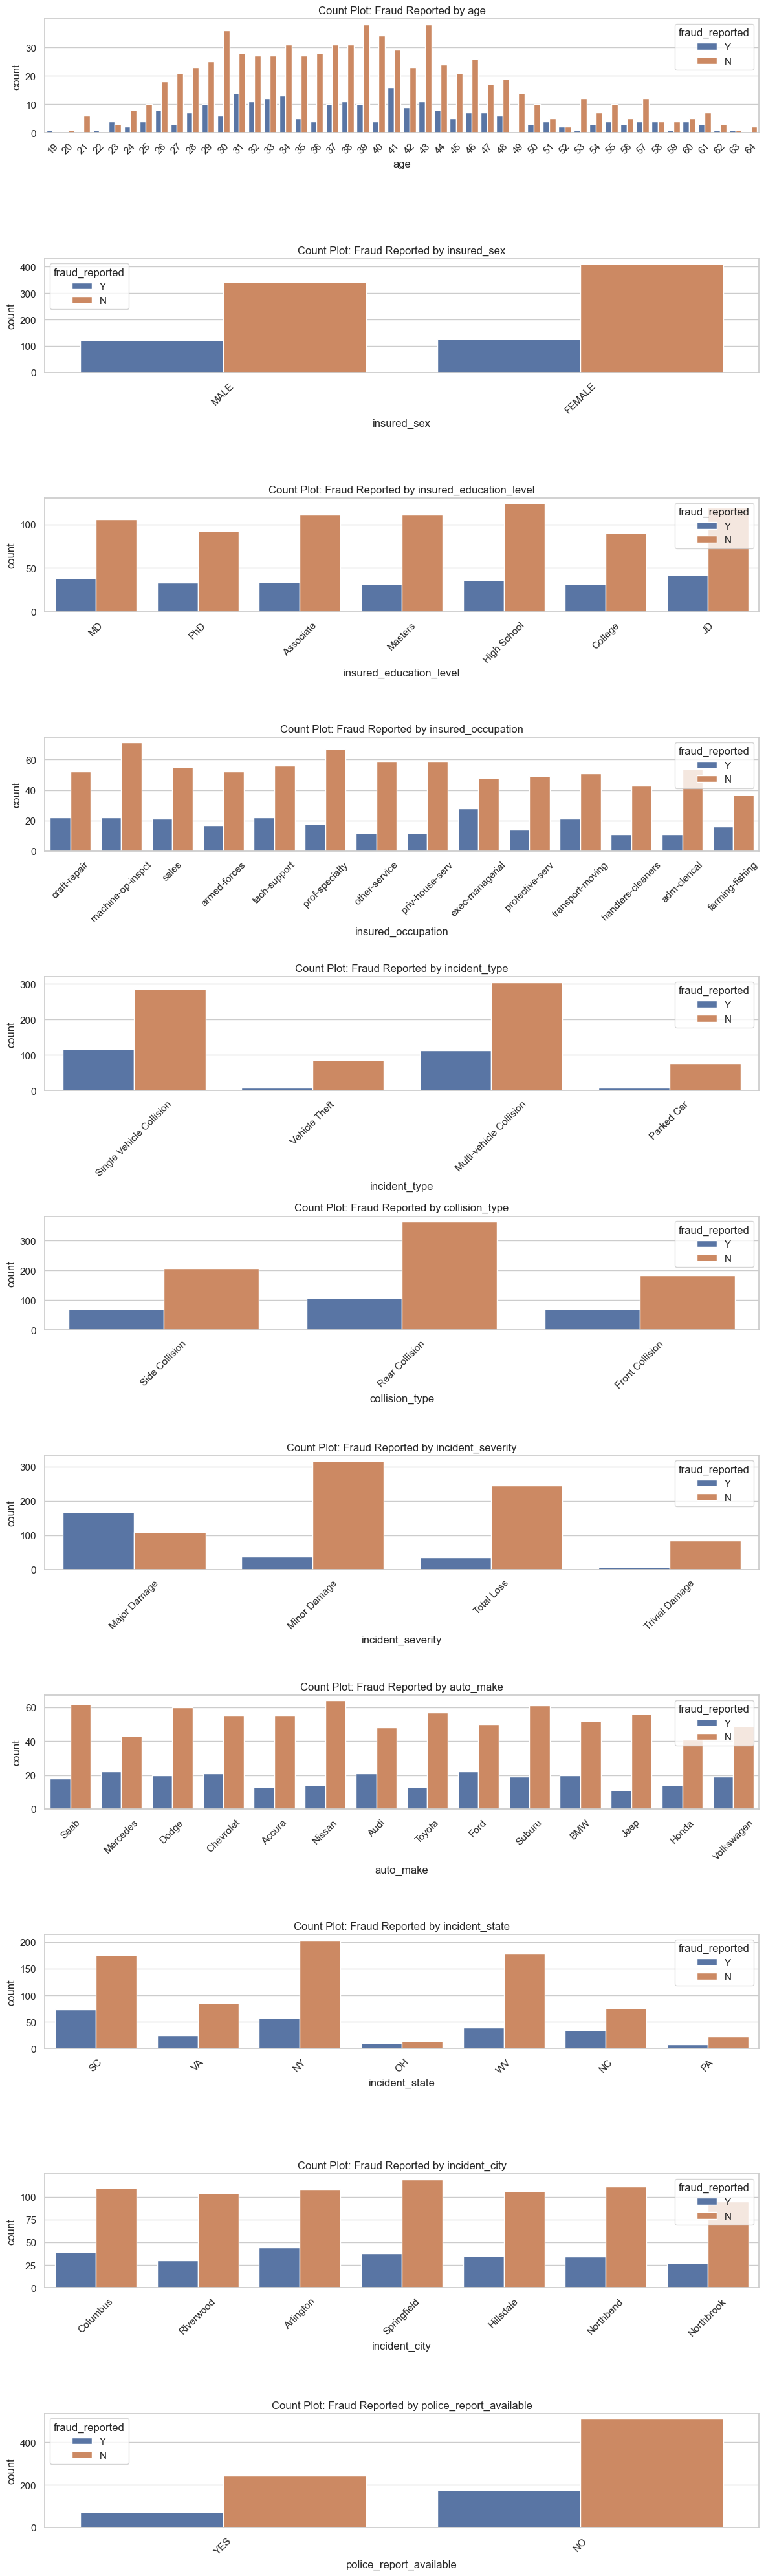

In [52]:
# Bivariate analysis using count plot
columns_to_plot = ['age', 'insured_sex', 'insured_education_level', 'insured_occupation', 'incident_type', 'collision_type', 
                   'incident_severity', 'auto_make', 'incident_state', 'incident_city', 'police_report_available']

rows = 11
columns = 1 

plt.figure(figsize = (12, 40))

for i in range(0, len(columns_to_plot)):
    plt.subplot(rows, columns, i + 1)
    sns.countplot(x = columns_to_plot[i], hue = 'fraud_reported', data = df)
    plt.title("Count Plot: Fraud Reported by " + columns_to_plot[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

plt.show()

### Observations:

#### fraud_reported by age:
Age 19 and 22 have the highest rate of fraud reported ('Y'), while age 20 and 21 have no reported fraud ('N'). There's a noticeable increase in fraud reporting around age 50.

#### fraud_reported by insured_sex:
'MALE' tends to have a slightly higher rate of fraud reported ('Y') compared to 'FEMALE' ('N').

#### fraud_reported by insured_education_level:
The education level 'High School' has the highest rate of fraud reported ('Y'), while 'Masters' has the lowest ('N').

#### fraud_reported by insured_occupation:
'Exec-managerial' and 'prof-specialty' occupations have higher rates of fraud reporting ('Y'), while 'armed-forces' and 'protective-serv' have lower rates ('N').

#### fraud_reported by incident_type:
'Parked Car' and 'Vehicle Theft' incidents have lower rates of fraud reporting ('N'), while 'Single Vehicle Collision' and 'Multi-vehicle Collision' have higher rates ('Y').

#### fraud_reported by collision_type:
'Rear Collision' has a lower fraud reporting rate ('N') compared to 'Front Collision' ('Y').

#### fraud_reported by incident_severity:
'Major Damage' incidents have a significantly higher rate of fraud reporting ('Y') compared to other incident severity categories.

#### fraud_reported by auto_make:
'Jeep' and 'Nissan' have relatively higher rates of fraud reporting ('Y') compared to other auto makes.

#### fraud_reported by incident_state:
'OH' (Ohio) has a significantly higher rate of fraud reporting ('Y') compared to other incident states.

#### fraud_reported by incident_city:
'Riverwood' has a higher rate of fraud reporting ('Y'), while 'Columbus' has a relatively lower rate ('N').

#### fraud_reported by police_report_available:
Incidents with 'YES' for police reports available have a slightly lower rate of fraud reporting ('Y') compared to incidents with 'NO' ('N').

### Scatter Plot

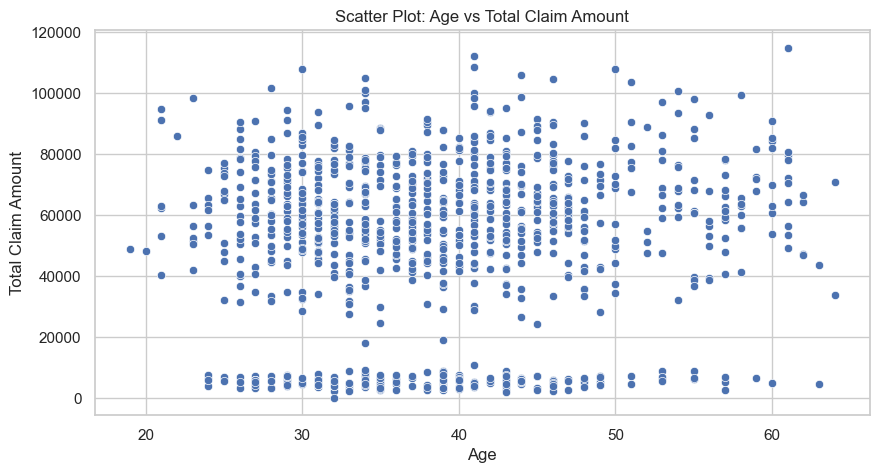

In [53]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'age', y = 'total_claim_amount')
plt.title("Scatter Plot: Age vs Total Claim Amount")
plt.xlabel("Age")
plt.ylabel("Total Claim Amount")
plt.show()

### Observations:
#### age vs total_claim_amount

The scatter plot for 'age' vs 'total_claim_amount' suggests that there isn't a strong connection between a person's age and the amount they claim. In other words, age increases, there is a slight tendency for total claim amount to increase, but this relationship is too weak to draw any significant conclusions. The data points are scattered widely, and the overall trend is not very pronounced.

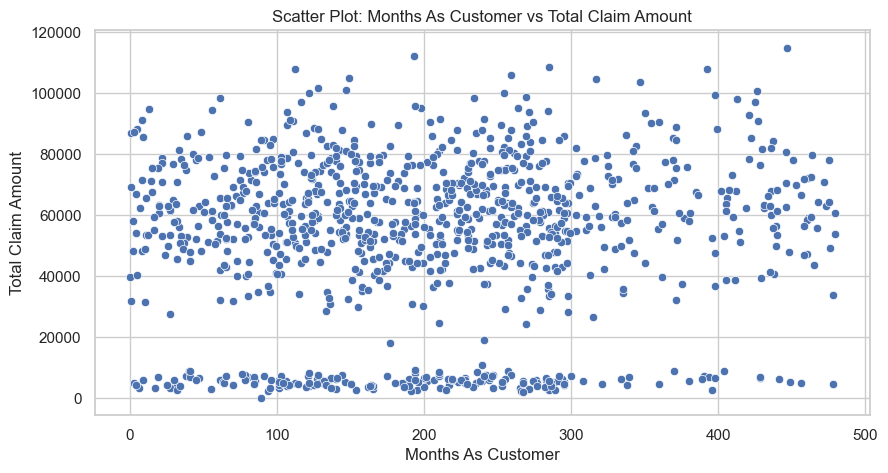

In [54]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'months_as_customer', y = 'total_claim_amount')
plt.title("Scatter Plot: Months As Customer vs Total Claim Amount")
plt.xlabel("Months As Customer")
plt.ylabel("Total Claim Amount")
plt.show()

### Observations:

#### months_as_customer vs total_claim_amount
The scatter plot for 'months_as_customer' vs 'total_claim_amount' suggests that there isn't a strong connection between the number of months as a customer and the total claim amount. As the duration of the customer's relationship with the company increases, there is a slight tendency for total claim amounts to increase. However, the relationship is not strong. The data points are also scattered widely, and the overall trend is not very pronounced.

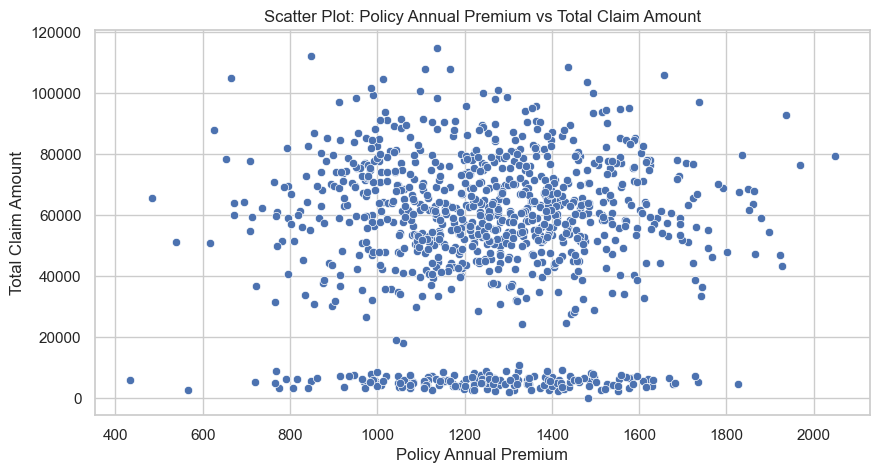

In [55]:
# Bivariate analysis using scatter plot
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'policy_annual_premium', y = 'total_claim_amount')
plt.title("Scatter Plot: Policy Annual Premium vs Total Claim Amount")
plt.xlabel("Policy Annual Premium")
plt.ylabel("Total Claim Amount")
plt.show()

### Observations:

#### policy_annual_premium vs total_claim_amount
The scatter plot for 'policy_annual_premium' vs 'total_claim_amount' suggests that there is a very slight tendency for total claim amounts to increase as policy annual premiums increase, but the relationship is so weak that it's unlikely to have any significant impact on the total claim amounts. The data points are also scattered widely, and the overall trend is not very pronounced.

### Line Plot

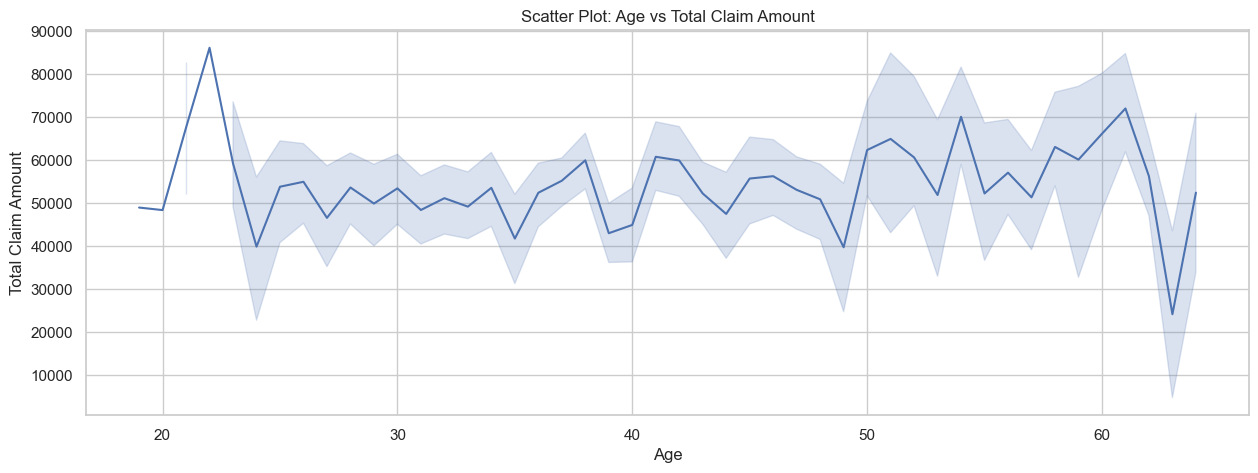

In [56]:
# Bivariate analysis using line plot
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = 'age', y = 'total_claim_amount')
plt.title("Scatter Plot: Age vs Total Claim Amount")
plt.xlabel("Age")
plt.ylabel("Total Claim Amount")
plt.show()

### Observations:

#### age vs total_claim_amount
The line plot for 'age' vs 'total_claim_amount' suggests that initially, as age increases, there's a noticeable rise in total claim amounts. However, the trend becomes less consistent as age further increases, with some fluctuations in claim amounts. The line plot provides a general idea of how age relates to total claim amounts, but it doesn't show a strong linear trend.

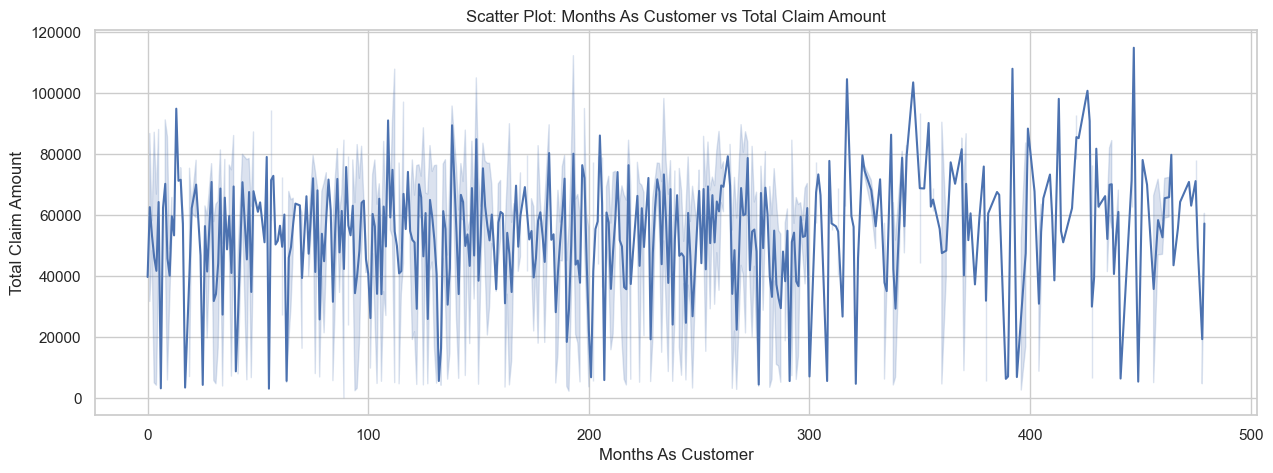

In [57]:
# Bivariate analysis using line plot
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = 'months_as_customer', y = 'total_claim_amount')
plt.title("Scatter Plot: Months As Customer vs Total Claim Amount")
plt.xlabel("Months As Customer")
plt.ylabel("Total Claim Amount")
plt.show()

### Observations:

#### months_as_customer vs total_claim_amount
The line plot for 'months_as_customer' vs 'total_claim_amount' suggests that initially, as the number of months as a customer increases, there's a noticeable upward trend in total claim amounts. However, after a certain point, the trend becomes less consistent, with some fluctuations in claim amounts. The line plot provides insights into the relationship between the duration of the customer's relationship and total claim amounts, but it doesn't show a strong linear trend.

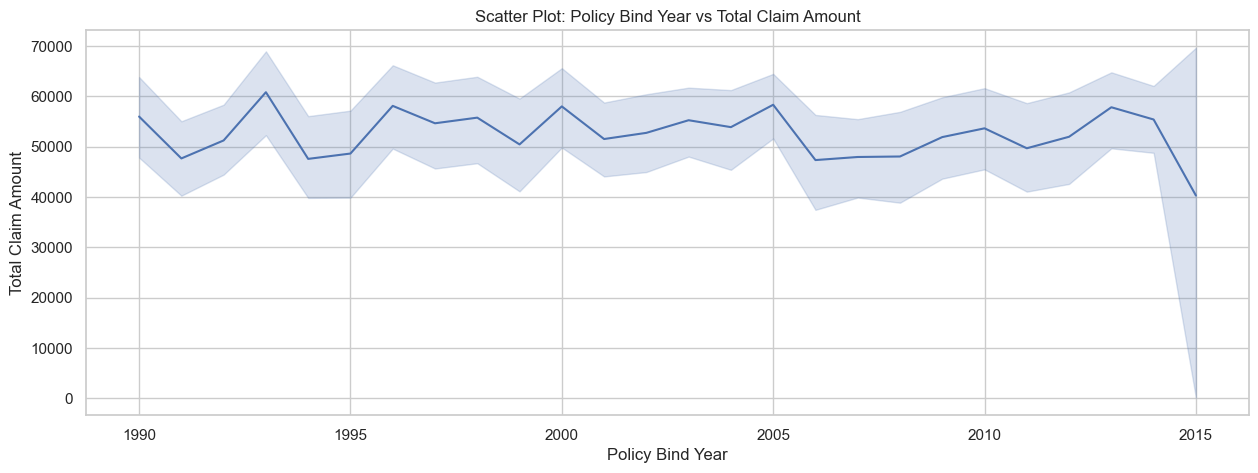

In [58]:
# Bivariate analysis using line plot
plt.figure(figsize = (15, 5))
sns.lineplot(data = df, x = 'policy_bind_year', y = 'total_claim_amount')
plt.title("Scatter Plot: Policy Bind Year vs Total Claim Amount")
plt.xlabel("Policy Bind Year")
plt.ylabel("Total Claim Amount")
plt.show()

### Observations:

#### policy_bind_year vs total_claim_amount
The line plot for 'policy_bind_year' vs 'total_claim_amount' suggests that initially, there seems to be a rising trend in total claim amounts as policy bind years increase. However, the trend is not perfectly linear and shows some fluctuations as we move along the policy bind years. The line plot offers insights into how the policy bind year relates to total claim amounts, but it's not a strong, straightforward linear trend.

### Pair Plot

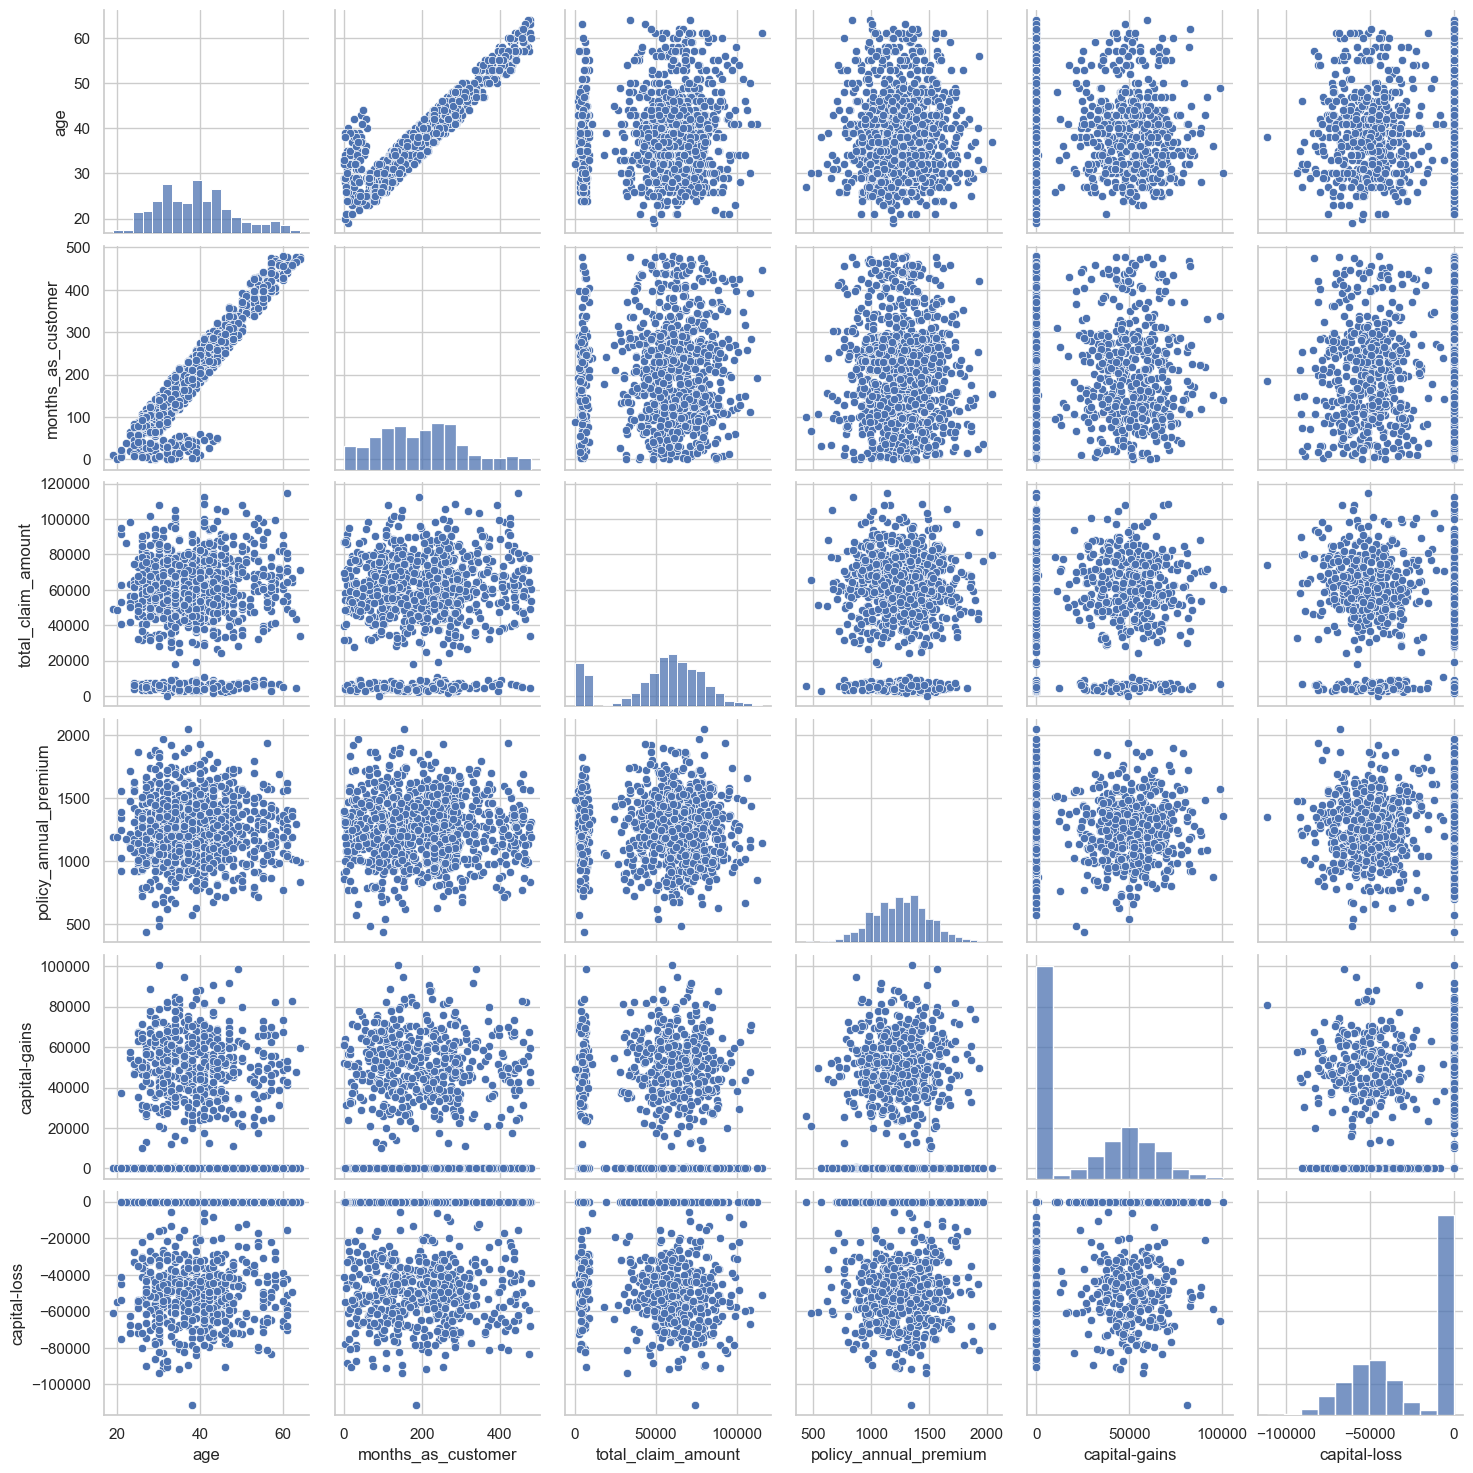

In [59]:
# Bivariate analysis using pairplot
columns_to_plot = ['age', 'months_as_customer', 'total_claim_amount', 'policy_annual_premium', 'capital-gains', 'capital-loss']

sns.pairplot(df[columns_to_plot])
plt.show()

### Observations:

The pair plot suggests that, there's a strong positive relationship between a customer's age and the number of months they have been with the company. Age has a very weak positive relationship with total claim amounts, meaning older customers tend to have slightly higher claims, though the impact is minimal. Total claim amounts and policy annual premiums have an extremely weak positive relationship, implying a negligible connection. Capital gains and capital losses show a moderate negative relationship, with one tending to decrease as the other increases. Months as a customer has a weak positive relationship with capital losses, but the effect is limited. Total claim amounts and capital losses have a weak negative relationship, indicating a decrease in capital losses as claim amounts increase.

## Multivariate Analysis 

### Scatter Plot

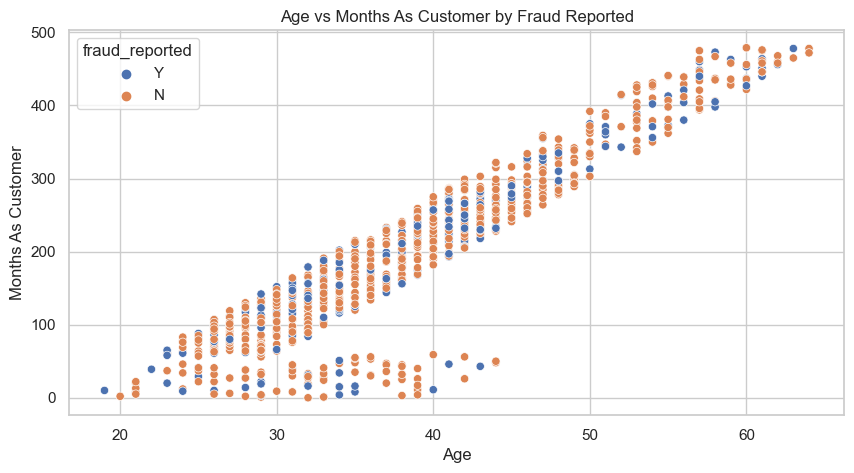

In [60]:
# Scatter plot for Age vs Months As Customer by Fraud Reported
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'age', y = 'months_as_customer', hue = 'fraud_reported', data = df)
plt.xlabel("Age")
plt.ylabel("Months As Customer")
plt.title("Age vs Months As Customer by Fraud Reported")
plt.show()

### Observations:

#### age vs months_as_customer by fraud_reported
The scatter plot for 'age' vs 'months_as_customer' by 'fraud_reported' provides insights into how 'age' and 'months_as_customer' relate to fraud_reported, with 'N' being the dominant category. After considering both the customer's age and the number of months they have been a customer, there are less instances where fraud was reported and there are more instances where no fraud was reported ('N'). This indicates that there is a significant difference in the number of fraud reports between these two categories.

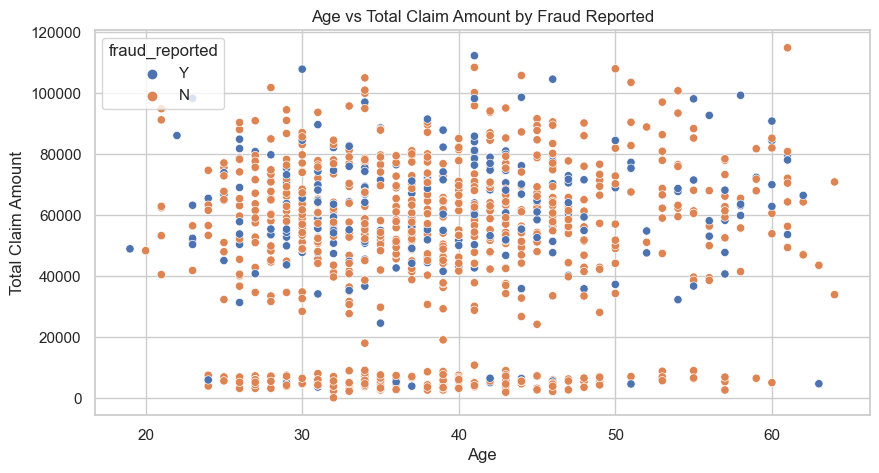

In [61]:
# Scatter plot for Age vs Total Claim Amount by Fraud Reported
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'age', y = 'total_claim_amount', hue = 'fraud_reported', data = df)
plt.xlabel("Age")
plt.ylabel("Total Claim Amount")
plt.title("Age vs Total Claim Amount by Fraud Reported")
plt.show()

### Observations:

#### age vs total_claim_amount by fraud_reported
The scatter plot for 'age' vs 'total_claim_amount' by 'fraud_reported' provides insights into how 'age' and 'total_claim_amount' relate to fraud_reported. After considering both the customer's age and the total claim amount, it is evident that there are instances of fraud reported ('Y') and no fraud reported ('N'). This suggests that the dataset encompasses both categories. 'N' appears to be the dominant category in the context of 'age' and 'total_claim_amount,' as there are more instances where no fraud 'N' was reported. This discrepancy indicates a notable difference in the number of fraud reports between the two categories.

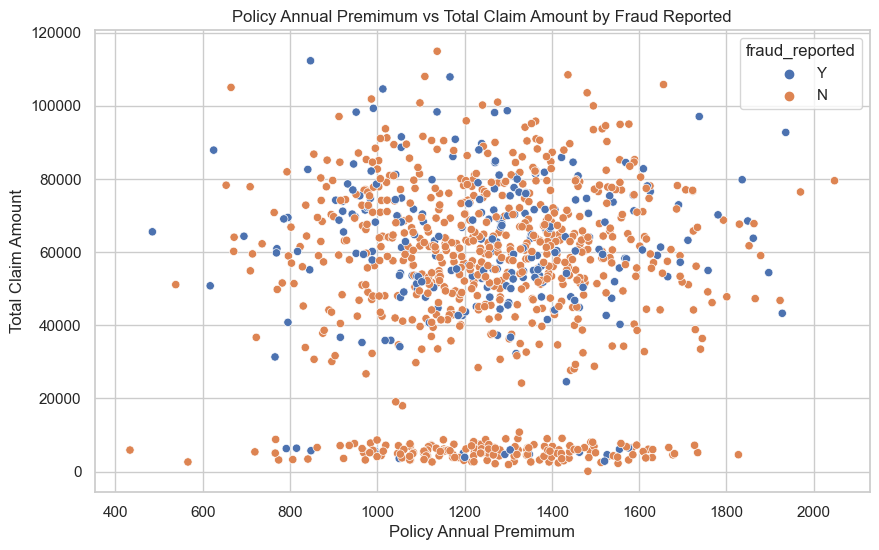

In [62]:
# Scatter plot for Age vs Total Claim Amount by Fraud Reported
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'policy_annual_premium', y = 'total_claim_amount', hue = 'fraud_reported', data = df)
plt.xlabel("Policy Annual Premimum")
plt.ylabel("Total Claim Amount")
plt.title("Policy Annual Premimum vs Total Claim Amount by Fraud Reported")
plt.show()

### Observations:

#### policy_annual_premium vs total_claim_amount by fraud_reported
The scatter plot for 'policy_annual_premium' vs 'total_claim_amount' by 'fraud_reported' provides insights into how 'policy_annual_premium' and 'total_claim_amount' relate to fraud_reported. After considering both the policy annual premimum and the total claim amount, it is evident that there are instances of fraud reported ('Y') and no fraud reported ('N'). This suggests that the dataset encompasses both categories. 'N' appears to be the dominant category in the context of 'policy_annual_premium' and 'total_claim_amount,' as there are more instances where no fraud 'N' was reported. This discrepancy indicates a notable difference in the number of fraud reports between the two categories.

The 'incident_year' column contains only one unique value, which is 2015. Since it doesn't provide any variability or meaningful information for analysis, retaining this column may not directly contribute to the analysis and can be dropped to reduce the complexity of the dataset.

In [63]:
# Dropping 'incident_year' column from the dataset
df.drop('incident_year', inplace = True, axis = 1)

In [64]:
# Display shape of dataframe after dropping 'incident_year' column
df.shape

(1000, 40)

# Label Encoding

Columns such as 'policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', and 'fraud_reported' contain categorical data, it is necessary to convert this data into numerical format.

In [65]:
# Converting the categorical columns into numerical columns

# list of columns to encode
columns_to_encode = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies',
                     'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted',
                     'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make',
                     'auto_model', 'fraud_reported']

encoder = LabelEncoder()
for i in columns_to_encode:
    df[i] = encoder.fit_transform(df[i])

#### Target variable 'fraud_reported' has been encoded as follows: 0 for 'N' (No) and 1 for 'Y' (Yes).

In [66]:
# Display the dataset after updation
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   auto_model  auto_year  fraud_reported  policy_csl_1  policy_csl_2  \
0           1       2004               1           250           500   
1          12       2007               1           250           500   
2          30       2007               0           100           300   
3          34       2014               1           250           500   
4          31       2009               0           500          1000   

   policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
0               17                 10              2014            25   
1               27                  6              2006            21   
2                9                  6              2000            22   
3               25                  5              1990             1   
4                6                  6              2014            17   

   incident_month  
0               1  
1               1  
2               2  
3              10  
4               2  

[5 rows x 40 columns]

## Checking for the outliers

Numerical columns include 'months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_csl_1', 'policy_csl_2', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', and 'incident_year'.

In [67]:
# List of numerical columns
numerical_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 
                     'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 
                     'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 
                     'auto_year', 'policy_csl_1', 'policy_csl_2', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 
                     'incident_day', 'incident_month']

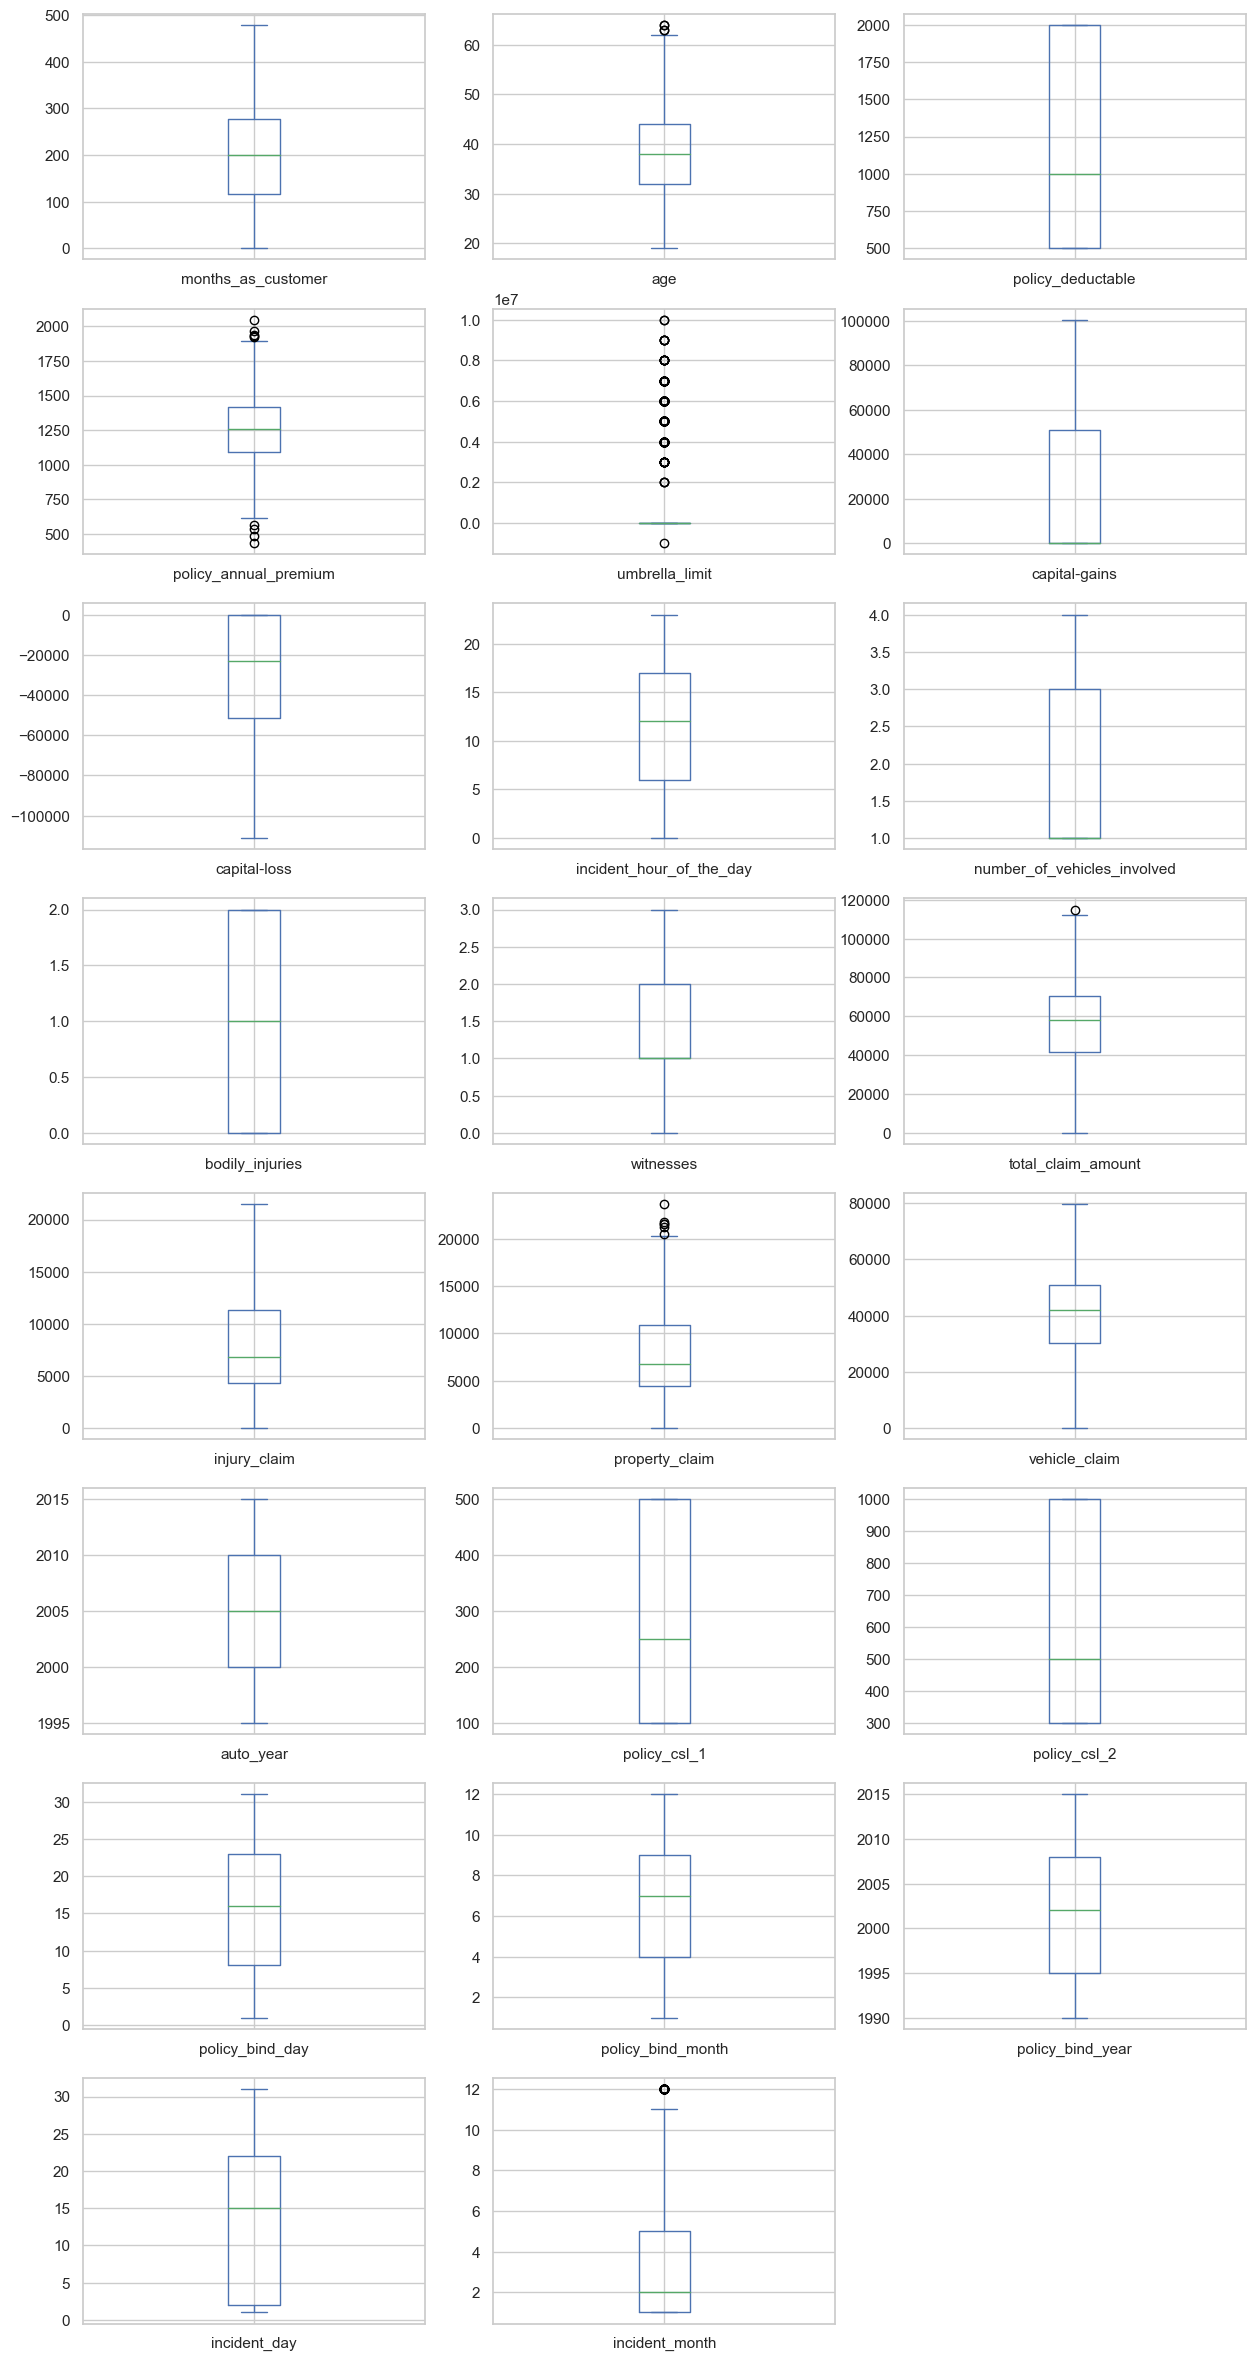

In [68]:
# Checking for the outliers using boxplot in numerical columns
df[numerical_columns].plot(kind = 'box', subplots = True, figsize = (15, 30), layout = (8, 3))
plt.show()

### Observations:

Outliers are present in 'age', 'policy_annual_premium', 'umbrella_limit', 'total_claim_amount', 'property_claim', and 'incident_month' columns.

In [69]:
# List of columns containing outliers
columns_with_outliers = ['age', 'policy_annual_premium', 'umbrella_limit', 'total_claim_amount', 'property_claim', 
                         'incident_month'] 

In [70]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df[columns_with_outliers]))
z_score

age  policy_annual_premium  umbrella_limit  total_claim_amount  \
0    0.990836               0.616705        0.479476            0.714257   
1    0.334073               0.242521        1.697980            1.807312   
2    1.088913               0.642233        1.697980            0.686362   
3    0.224613               0.652886        2.133471            0.403135   
4    0.552994               1.341980        2.133471            1.753121   
..        ...                    ...             ...                 ...   
995  0.103769               0.222884        0.479476            1.305049   
996  0.224613               0.739141        0.479476            2.111466   
997  0.541611               0.520739        0.826998            0.558507   
998  2.523284               0.411866        1.697980            0.219110   
999  2.304363               2.008710        0.479476            1.807691   

     property_claim  incident_month  
0          1.165505        0.735040  
1          1.372696        0.735040  
2          0.736072        0.429664  
3          0.219722        2.013343  
4          1.399654        0.429664  
..              ...             ...  
995        0.273817        0.429664  
996        2.214794        0.735040  
997        0.020826        0.735040  
998        0.451976        0.429664  
999        1.343664        0.429664  

[1000 rows x 6 columns]

In [71]:
# Identify the indices where the z-score is greater than 3
np.where(z_score > 3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 875, 922, 975], dtype=int64),
 array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2],
       dtype=int64))

In [72]:
# Removing Outliers
z = 3
updated_df = df[(z_score < z).all(axis = 1)]
updated_df

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48             2               1000   
1                   228   42             1               2000   
2                   134   29             2               2000   
3                   256   41             0               2000   
4                   228   44             0               1000   
..                  ...  ...           ...                ...   
995                   3   38             2               1000   
996                 285   41             0               1000   
997                 130   34             2                500   
998                 458   62             0               2000   
999                 456   60             2               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                          4                   2               17  ...   
1                          4                   6               15  ...   
2                          6                  11                2  ...   
3                          6                   1                2  ...   
4                          0                  11                2  ...   
..                       ...                 ...              ...  ...   
995                        5                   2               13  ...   
996                        6                   9               17  ...   
997                        5                   1                3  ...   
998                        0                   5                0  ...   
999                        0                  11               11  ...   

     auto_model  auto_year  fraud_reported  policy_csl_1  policy_csl_2  \
0             1       2004               1           250           500   
1            12       2007               1           250           500   
2            30       2007               0           100           300   
3            34       2014               1           250           500   
4            31       2009               0           500          1000   
..          ...        ...             ...           ...           ...   
995           6       2006               0           500          1000   
996          28       2015               0           100           300   
997          19       1996               0           250           500   
998           5       1998               0           500          1000   
999          12       2007               0           250           500   

     policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
0                 17                 10              2014            25   
1                 27                  6              2006            21   
2                  9                  6              2000            22   
3                 25                  5              1990             1   
4                  6                  6              2014            17   
..               ...                ...               ...           ...   
995               16                  7              1991            22   
996                1                  5              2014            24   
997               17                  2              2003     

In [73]:
# Checking the shape of dataframe after removing the outliers
updated_df.shape

(981, 40)

## Checking for the skewness

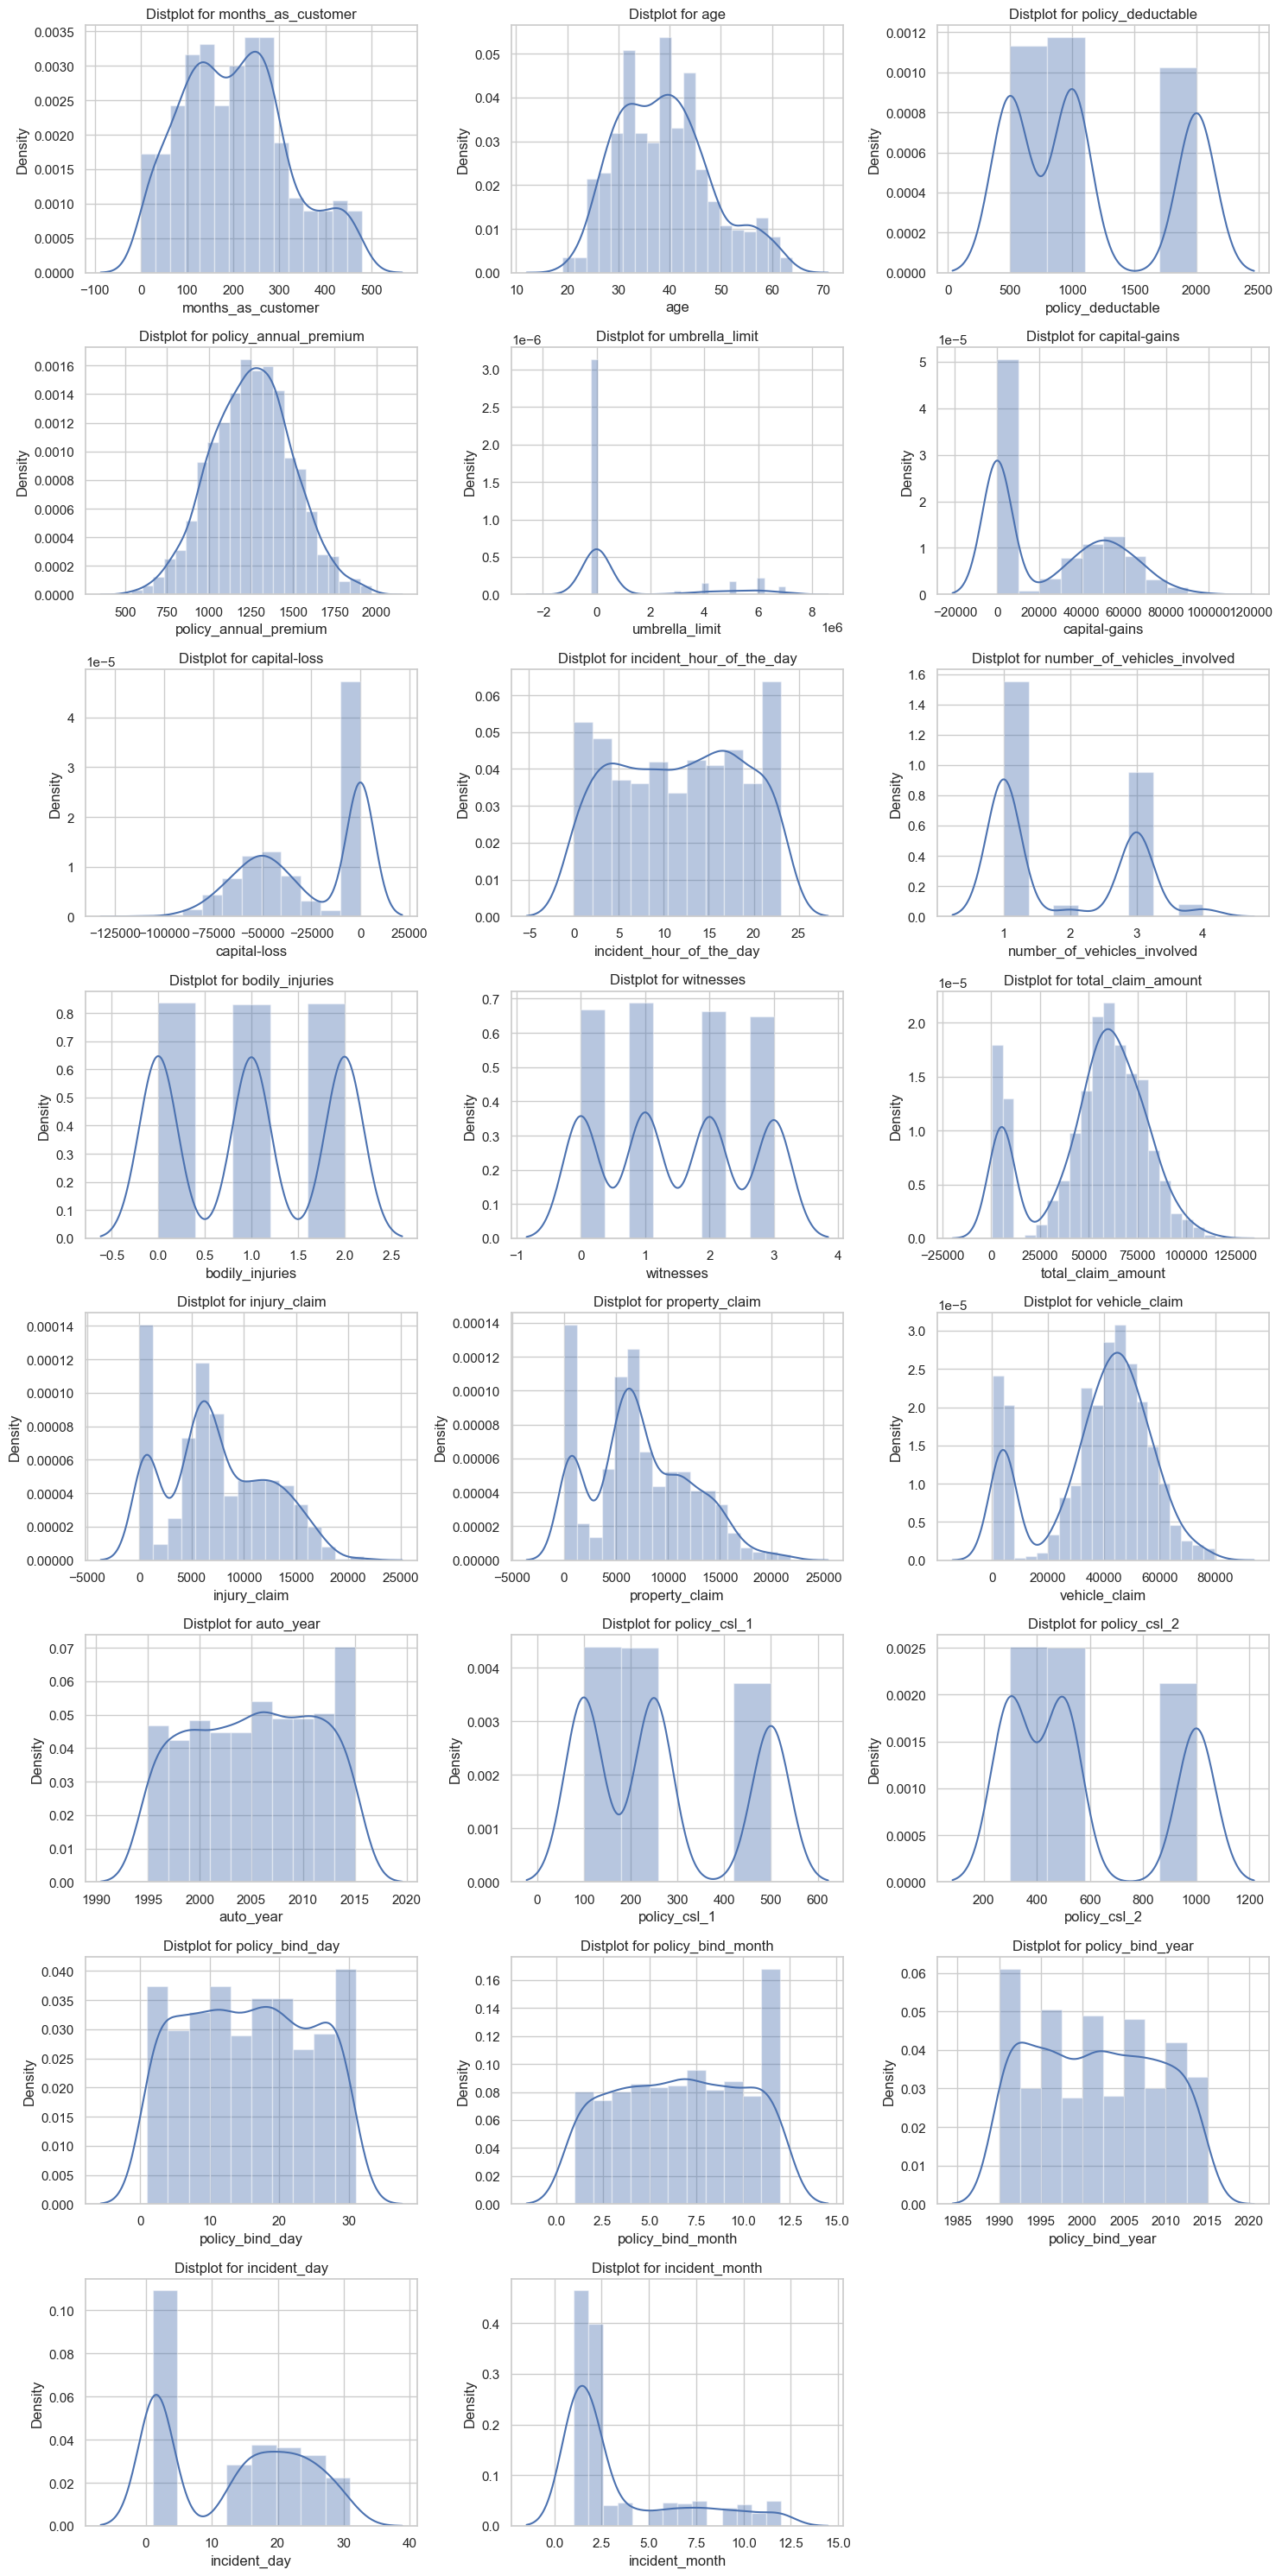

In [74]:
# Checking for the skewness using dist plot in numerical columns
ncol = 3
nrow = 8
plt.figure(figsize = (15, 30))

for i in range(0, len(numerical_columns)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(updated_df[numerical_columns[i]]) 
    plt.title("Distplot for " + numerical_columns[i]) 
    plt.tight_layout()

plt.show()

#### Observations:

months_as_customer: The 'months_as_customer' appears to have a slightly right-skewed distribution.

age: 'age' exhibits a moderately right-skewed distribution.

policy_deductable: 'policy_deductable' has a moderately right-skewed distribution.

policy_annual_premium: 'policy_annual_premium' suggests a very slight right-skewed distribution.

umbrella_limit: 'umbrella_limit' has a substantially right-skewed distribution.

capital-gains: 'capital-gains' shows a moderately right-skewed distribution.

capital-loss: 'capital-loss' appears to have a moderately left-skewed distribution.

incident_hour_of_the_day: 'incident_hour_of_the_day' exhibits a slightly left-skewed distribution.

number_of_vehicles_involved: 'number_of_vehicles_involved' is moderately right-skewed.

bodily_injuries: 'bodily_injuries' appears to have a nearly symmetric distribution.

witnesses: 'witnesses' suggests a slightly right-skewed distribution.

total_claim_amount: 'total_claim_amount' exhibits a moderately left-skewed distribution.

injury_claim: 'injury_claim' appears to have a right-skewed distribution.

property_claim: 'property_claim' exhibits a slightly right-skewed distribution.

vehicle_claim: 'vehicle_claim' has a substantially left-skewed distribution.

auto_year: 'auto_year' shows a slightly left-skewed distribution.

policy_csl_1: 'policy_csl_1' suggests a moderately right-skewed distribution.

policy_csl_2: 'policy_csl_2' appears to have a substantially right-skewed distribution.

policy_bind_day: 'policy_bind_day' exhibits a slightly right-skewed distribution.

policy_bind_month: 'policy_bind_month' suggests a slightly left-skewed distribution.

policy_bind_year: 'policy_bind_year' is moderately right-skewed.

incident_day: 'incident_day' appears to have a slightly right-skewed distribution.

incident_month: 'incident_month' has a substantially right-skewed distribution.

In [75]:
# Checking for the skewness using skew() method
updated_df[numerical_columns].skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
auto_year                     -0.054033
policy_csl_1                   0.419579
policy_csl_2                   0.615942
policy_bind_day                0.026657
policy_bind_month             -0.025056
policy_bind_year               0.062986
incident_day                   0.057403
incident_month                 1.389884
dtype: float64

'umbrella_limit', 'policy_csl_2', and 'incident_month' have positive skewness, suggesting that most values are concenterated on the right side.

'total_claim_amount' and 'vehicle_claim' have negative skewness, indicating that most values are concentrated on the left side. 

In [76]:
# List of the columns to be transformed
columns_to_transform = ['umbrella_limit', 'policy_csl_2', 'incident_month', 'total_claim_amount', 'vehicle_claim']

# Copying data
updated_df2 = updated_df.copy()

# Reduing skewnees using yeojohnson transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df[column] + 1)
    updated_df2[column] = transformed_data

In [77]:
# Again checking for the skewness after applying transformation
updated_df2[columns_to_transform].skew()

umbrella_limit       -7.275227
policy_csl_2          0.113120
incident_month        0.359195
total_claim_amount   -0.508922
vehicle_claim        -0.522049
dtype: float64

The skewness score for the 'umbrella_limit' column suggests that the Yeo-Johnson transformation did not effectively reduce the skewness, in fact, it resulted in a more significant negative skewness.

In [78]:
# Applying cube root transformation to reduce skewness in 'umbrella_limit' column
transformed_data = np.cbrt(updated_df['umbrella_limit'])
updated_df2['umbrella_limit'] = transformed_data

In [79]:
# Again checking for the skewness after applying transformation
updated_df2['umbrella_limit'].skew()

1.60553129126878

Now, skewness in every column has been reduced, indicating a more balanced and symmetric distribution of data in each column.

In [80]:
# Display updated dataset
updated_df2.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91        0.000000            1   
1                1197.22      170.997595            1   
2                1413.14      170.997595            0   
3                1415.74      181.712059            0   
4                1583.91      181.712059            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   auto_model  auto_year  fraud_reported  policy_csl_1  policy_csl_2  \
0           1       2004               1           250      1.984320   
1          12       2007               1           250      1.984320   
2          30       2007               0           100      1.954917   
3          34       2014               1           250      1.984320   
4          31       2009               0           500      2.014403   

   policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
0               17                 10              2014            25   
1               27                  6              2006            21   
2                9                  6              2000            22   
3               25                  5              1990             1   
4                6                  6              2014            17   

   incident_month  
0        0.562565  
1        0.562565  
2        0.613892  
3        0.695495  
4        0.613892  

[5 rows x 40 columns]

## Correlation Coefficient Matrix

In [81]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df2.corr()
correlation_coefficient

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922960     -0.007179   
age                                    0.922960  1.000000     -0.020009   
policy_state                          -0.007179 -0.020009      1.000000   
policy_deductable                      0.030777  0.031851      0.017559   
policy_annual_premium                 -0.003875  0.005290      0.015079   
umbrella_limit                         0.007978  0.000839     -0.009350   
insured_sex                            0.059770  0.073857     -0.017970   
insured_education_level               -0.000735  0.001645     -0.027173   
insured_occupation                     0.006786  0.014703     -0.025369   
insured_hobbies                       -0.089267 -0.079038     -0.039484   
insured_relationship                   0.071304  0.075993     -0.017075   
capital-gains                          0.007126 -0.004735      0.068431   
capital-loss                           0.023429  0.013125     -0.031703   
incident_type                         -0.016557 -0.026152      0.032381   
collision_type                        -0.073025 -0.076321      0.049962   
incident_severity                     -0.064059 -0.064373     -0.028347   
authorities_contacted                  0.013999  0.018575     -0.014597   
incident_state                         0.015973  0.012750      0.019472   
incident_city                         -0.006837 -0.006838     -0.002843   
incident_hour_of_the_day               0.066370  0.083785      0.021938   
number_of_vehicles_involved            0.011635  0.020254     -0.045513   
property_damage                       -0.000521 -0.008165     -0.013556   
bodily_injuries                       -0.007870 -0.012377      0.012057   
witnesses                              0.063289  0.056159      0.025779   
police_report_available               -0.017084 -0.018058      0.065318   
total_claim_amount                     0.059194  0.068347     -0.015077   
injury_claim                           0.064864  0.077002     -0.048189   
property_claim                         0.036471  0.062231     -0.006442   
vehicle_claim                          0.056257  0.059056     -0.006424   
auto_make                              0.049912  0.033873      0.010283   
auto_model                             0.005350  0.015456     -0.017956   
auto_year                              0.001145  0.005767     -0.001116   
fraud_reported                         0.021375  0.013338      0.034595   
policy_csl_1                          -0.021119 -0.014020     -0.003297   
policy_csl_2                          -0.021842 -0.013368      0.001424   
policy_bind_day                        0.050537  0.052939     -0.000618   
policy_bind_month                      0.004185  0.014477      0.073689   
policy_bind_year                      -0.042040 -0.031790     -0.003066   
incident_day                          -0.010356 -0.005724      0.016067   
incident_month                         0.015823  0.014944      0.027105   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.030777              -0.003875   
age                                   0.031851               0.005290   
policy_state                          0.017559               0.015079   
policy_deductable                     1.000000              -0.007754   
policy_annual_premium                -0.007754               1.000000   
umbrella_limit                        0.005780              -0.009790   
insured_sex                          -0.008308               0.040936   
insured_education_level               0.014117              -0.021390   
insured_occupation                   -0.052613               0.028133   
insured_hobbies                      -0.002614              -0.014407   
insured_relationship                 -0.017619               0.004772   
capital-gains                         0.034437              -0.006036   
capi

Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

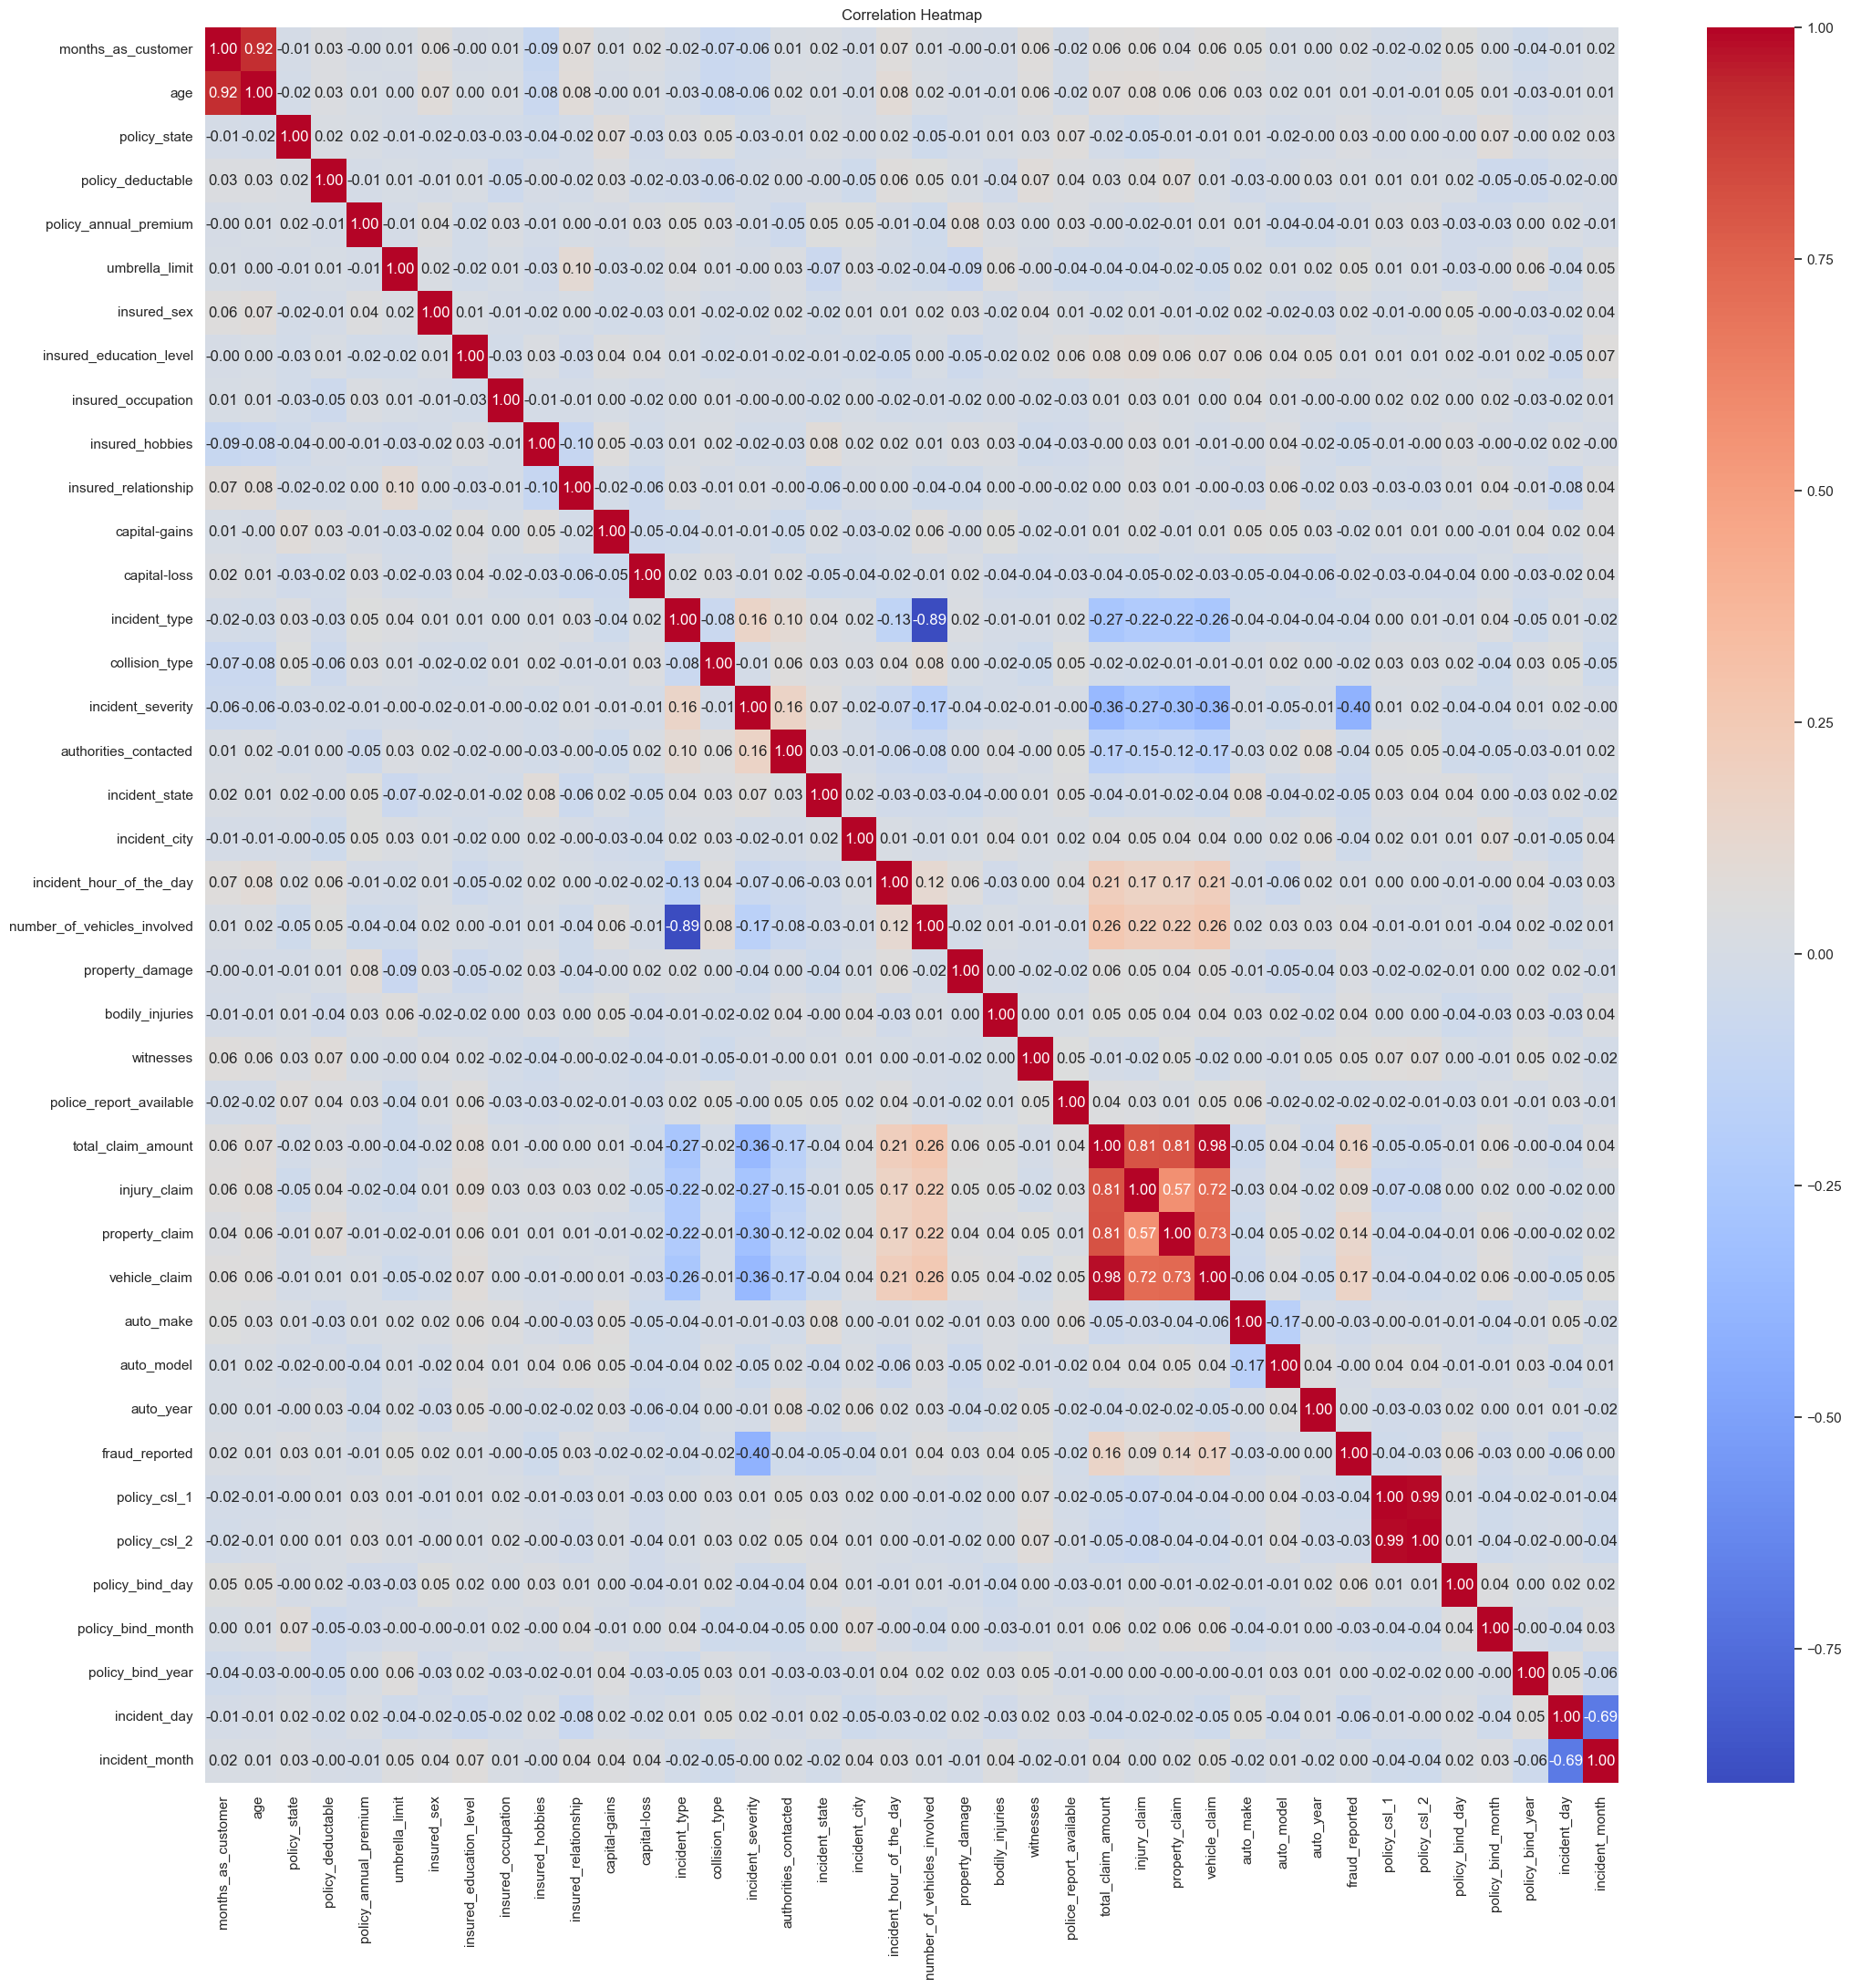

In [82]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (25, 25))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observations:

months_as_customer: Strong positive correlation with 'age'. Weak to moderate correlations with other columns.

age: Strong positive correlation with 'months_as_customer'. Weak to moderate correlations with other columns.

policy_state: Weak correlations with most columns, including 'policy_deductible', 'policy_annual_premium', 'insured_occupation', and others.

policy_deductible: Weak correlations with most columns, including 'policy_state', 'policy_annual_premium', 'insured_occupation', and others.

policy_annual_premium: Weak correlations with most columns, including 'policy_state', 'policy_deductible', 'insured_occupation', and others.

umbrella_limit: Weak correlations with most columns, including 'insured_education_level', 'insured_hobbies', 'insured_relationship', and others.

insured_sex: Weak correlations with most columns, including 'insured_relationship', 'authorities_contacted', 'incident_hour_of_the_day', 'auto_year', and others

insured_education_level: Weak to moderate correlations with most columns, including 'umbrella_limit', 'insured_occupation', 'capital-gains', 'incident_state', and others.

insured_occupation: Weak to moderate correlations with most columns, including 'umbrella_limit', 'insured_education_level', 'capital-gains', 'incident_state', and others.

insured_hobbies: Weak to moderate correlations with most columns, including 'capital-gains', 'insured_relationship', 'incident_hour_of_the_day', 'auto_year', and others.

insured_relationship: Weak to moderate correlations with most columns, including 'insured_sex', 'authorities_contacted', 'incident_hour_of_the_day', 'auto_year', and others.

capital-gains: Weak to moderate correlations with most columns, including 'insured_hobbies', 'insured_education_level', 'insured_occupation', 'incident_state', and others.

capital-loss: Weak to moderate correlations with most columns, including 'capital-gains', 'incident_severity', 'authorities_contacted', 'auto_year', and others.

incident_type: Strong positive correlation with 'collision_type'. Weak to moderate correlations with other columns.

collision_type: Strong positive correlation with 'incident_type'. Weak to moderate correlations with other columns.

incident_severity: Strong positive correlation with 'authorities_contacted'. Weak to moderate correlations with other columns.

authorities_contacted: Strong positive correlation with 'incident_severity'. Weak to moderate correlations with other columns.

incident_state: Weak correlations with most columns, such as 'incident_city', 'property_damage', and 'vehicle_claim'.

total_claim_amount: Moderate to strong positive correlations with 'injury_claim' and 'property_claim', and weak to moderate correlations with other columns.

auto_make: Weak to moderate correlations with most columns, including 'incident_city', 'bodily_injuries', and 'policy_csl_2'.

fraud_reported: Weak correlations with most columns, except for 'total_claim_amount', 'injury_claim', 'property_claim', and 'vehicle_claim' with which it has moderate to strong positive correlations.

incident_month: Weak to moderate correlations with most columns, including 'incident_state', 'witnesses', and 'auto_model'.

incident_hour_of_the_day: Moderate positive correlation with 'witnesses' and 'auto_year', and weak correlations with most other columns.

number_of_vehicles_involved: Weak correlations with many columns, except for a moderate negative correlation with 'property_damage'.

police_report_available: Weak to moderate correlations with most columns, including 'incident_state', 'property_damage', and 'policy_csl_2'.

auto_year: Weak correlations with most columns, except for a moderate positive correlation with 'incident_hour_of_the_day'.

incident_day: Weak correlations with most columns, including 'incident_month', 'auto_make', and 'auto_year'.

incident_state: Very weak correlations with most columns, except for a very weak positive correlation with 'incident_hour_of_the_day' and 'policy_bind_month'.

incident_city: Very weak correlations with most columns, with a very weak negative correlation with 'policy_bind_day'.

police_report_available: Weak to moderate correlations with most columns, with a moderate negative correlation with 'incident_state' and 'incident_hour_of_the_day'.

total_claim_amount: Moderate to strong positive correlations with 'injury_claim', 'property_claim', and 'vehicle_claim'.

fraud_reported: Very weak correlations with most columns, except for a weak negative correlation with 'policy_csl_2'.

number_of_vehicles_involved: Very weak correlations with most columns, but it has a weak negative correlation with 'policy_csl_1' and 'policy_csl_2'.

auto_make: Weak correlations with most columns, except for a weak positive correlation with 'incident_month'.

auto_model: Weak correlations with most columns, except for a weak positive correlation with 'policy_bind_year'.

auto_year: Very weak correlations with most columns, but it has a very weak negative correlation with 'policy_csl_1' and 'policy_csl_2'.

policy_csl_1: Very weak correlations with most columns, except for a very weak positive correlation with 'incident_day'.

policy_csl_2: Very weak correlations with most columns, but it has a very weak negative correlation with 'fraud_reported'.

policy_bind_day: Very weak correlations with most columns, but it has a very weak negative correlation with 'incident_month'.

policy_bind_month: Very weak correlations with most columns, but it has a very weak positive correlation with 'incident_state'.

policy_bind_year: Very weak correlations with most columns, except for a very weak positive correlation with 'auto_model'.

incident_day: Very weak correlations with most columns, except for a very weak negative correlation with 'incident_month' and 'policy_bind_day'.

incident_month: Very weak correlations with most columns, but it has a very weak positive correlation with 'auto_make' and 'policy_bind_month'.

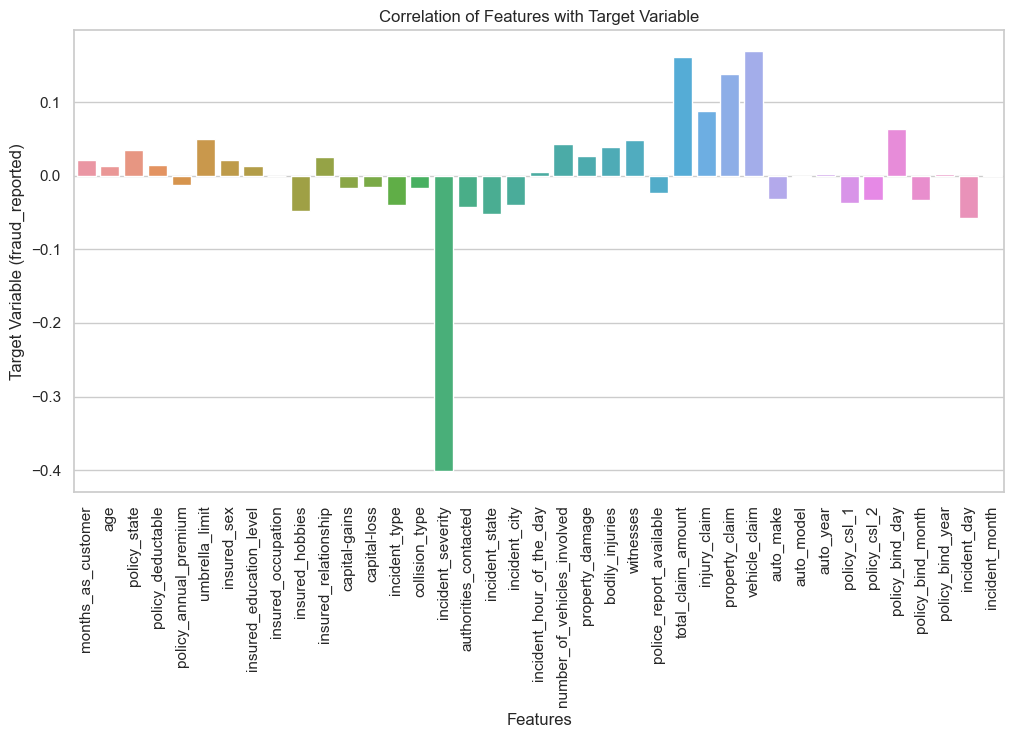

In [83]:
# Checking for the correlation between features and target variable separately
target = 'fraud_reported'

correlation_matrix = updated_df2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (fraud_reported)')
plt.title('Correlation of Features with Target Variable')
plt.xticks(rotation = 90)

plt.show()

### Observations:

months_as_customer: The 'months as customer' has a weak positive correlation of 0.021375 with 'fraud_reported'. This suggests that the duration of the customer's relationship with the insurance company has a slight positive impact on the likelihood of fraud being reported.

age: The 'age' variable has a very weak positive correlation of 0.013338 with 'fraud_reported', indicating that the age of the insured has a minor positive influence on fraud reporting.

policy_state: 'Policy State' shows a weak positive correlation of 0.034595 with 'fraud_reported', suggesting that the state where the policy is held has a slight positive impact on the likelihood of fraud being reported.

policy_deductable: 'Policy Deductible' has a very weak positive correlation of 0.014936 with 'fraud_reported', implying that the deductible amount may have a minor positive impact on fraud reporting.

policy_annual_premium: The 'policy annual premium' has a very weak negative correlation of -0.012900 with 'fraud_reported'. This indicates that the annual premium amount has a minor negative influence on fraud reporting.

umbrella_limit: 'Umbrella Limit' shows a weak positive correlation of 0.049914 with 'fraud_reported'. This suggests that the umbrella limit has a slight positive impact on the likelihood of fraud being reported.

insured_sex: The 'insured sex' variable has a weak positive correlation of 0.021111 with 'fraud_reported'. This implies that the gender of the insured has a slight positive influence on fraud reporting.

insured_education_level: 'insured_education_level' exhibits a very weak positive correlation of 0.013102 with 'fraud_reported', indicating that the education level of the insured has a minor positive impact on fraud reporting.

insured_occupation: 'insured_occupation' has an almost negligible correlation of -0.000208 with 'fraud_reported', suggesting that the occupation of the insured is not a significant predictor of fraud.

insured_hobbies: The 'insured_hobbies' variable has a weak negative correlation of -0.047887 with 'fraud_reported', indicating that the insured's hobbies may have a slight negative impact on fraud reporting.

insured_relationship: 'insured_relationship' shows a weak positive correlation of 0.026013 with 'fraud_reported', suggesting that the relationship of the insured with the policyholder has a slight positive influence on fraud reporting.

capital_gains: 'capital_gains' has a weak negative correlation of -0.016114 with 'fraud_reported', implying that capital gains have a slight negative influence on fraud reporting.

capital_loss: 'capital_loss' exhibits a weak negative correlation of -0.015787 with 'fraud_reported'. This suggests that capital loss has a slight negative impact on fraud reporting.

incident_type: The 'incident_type' shows a moderate negative correlation of -0.040229 with 'fraud_reported'. This indicates that the type of incident may have a significant negative impact on the likelihood of fraud being reported.

collision_type: 'collision_type' has a weak negative correlation of -0.016757 with 'fraud_reported'. This suggests that the type of collision may have a minor negative influence on fraud reporting.

incident_severity: 'incident_severity' exhibits a strong negative correlation of -0.401621 with 'fraud_reported'. This suggests that the severity of the incident has a significant negative impact on the likelihood of fraud being reported.

authorities_contacted: 'authorities_contacted' shows a moderate negative correlation of -0.042766 with 'fraud_reported'. This indicates that the authorities contacted after an incident may have a significant negative impact on fraud reporting.

incident_state: The 'incident_state' has a strong negative correlation of -0.051386 with 'fraud_reported', suggesting that the state where the incident occurred has a significant negative impact on the likelihood of fraud being reported.

incident_city: 'incident_city' exhibits a moderate negative correlation of -0.040243 with 'fraud_reported'. This indicates that the city where the incident occurred may have a significant negative impact on fraud reporting.

incident_hour_of_the_day: The 'incident_hour_of_the_day' has a very weak positive correlation of 0.005210 with 'fraud_reported'. This suggests that the time of the incident has a negligible positive influence on fraud reporting.

number_of_vehicles_involved: 'number_of_vehicles_involved' shows a moderate positive correlation of 0.042834 with 'fraud_reported', indicating that the number of vehicles involved has a significant positive impact on the likelihood of fraud being reported.

property_damage: 'property_damage' has a weak positive correlation of 0.026270 with 'fraud_reported', suggesting that the availability of property damage coverage may have a slight positive impact on fraud reporting.

bodily_injuries: 'bodily_injuries' exhibits a moderate positive correlation of 0.038436 with 'fraud_reported', indicating that the number of bodily injuries may have a significant positive impact on the likelihood of fraud being reported.

witnesses: The 'witnesses' variable shows a weak positive correlation of 0.049126 with 'fraud_reported', suggesting that the presence of witnesses may have a slight positive influence on fraud reporting.

police_report_available: 'police_report_available' has a very weak negative correlation of -0.023464 with 'fraud_reported', implying that the availability of a police report has a minor negative influence on fraud reporting.

total_claim_amount: The 'total_claim_amount' has a moderate positive correlation of 0.161846 with 'fraud_reported'. This indicates that the total claim amount has a significant positive impact on the likelihood of fraud being reported.

injury_claim: 'injury_claim' shows a moderate positive correlation of 0.088173 with 'fraud_reported', suggesting that the injury claim amount may have a significant positive influence on fraud reporting.

property_claim: 'property_claim' exhibits a moderate positive correlation of 0.138408 with 'fraud_reported', indicating that the property claim amount may have a significant positive impact on the likelihood of fraud being reported.

vehicle_claim: The 'vehicle_claim' variable has a strong positive correlation of 0.168858 with 'fraud_reported'. This suggests that the vehicle claim amount has a significant positive influence on fraud reporting.

auto_make: 'auto_make' has a very weak negative correlation of -0.031368 with 'fraud_reported', indicating that the make of the vehicle has a minor negative influence on fraud reporting.

auto_model: 'auto_model' exhibits an almost negligible correlation of -0.002027 with 'fraud_reported', suggesting that the vehicle model is not a significant predictor of fraud.

 The 'auto_year' has a very weak positive correlation of 0.002127 with 'fraud_reported', suggesting that the year of the insured vehicle has a negligible positive influence on fraud reporting.

policy_csl_1: 'policy_csl_1' has a weak negative correlation of -0.036714 with 'fraud_reported', indicating that this specific policy coverage limit may have a slight negative influence on fraud reporting.

policy_csl_2: 'policy_csl_2' exhibits a weak negative correlation of -0.032749 with 'fraud_reported'. This suggests that another specific policy coverage limit may also have a slight negative influence on fraud reporting.

policy_bind_day: The 'policy_bind_day' shows a moderate positive correlation of 0.062805 with 'fraud_reported'. This indicates that the day on which the policy was bound has a significant positive impact on the likelihood of fraud being reported.

policy_bind_month: 'policy_bind_month' exhibits a weak negative correlation of -0.032677 with 'fraud_reported'. This implies that the month when the policy was bound may have a minor negative influence on fraud reporting.

policy_bind_year: 'policy_bind_year' has a very weak positive correlation of 0.002810 with 'fraud_reported', suggesting that the year when the policy was bound has a negligible positive influence on fraud reporting.

incident_day: The 'incident_day' has a strong negative correlation of -0.057668 with 'fraud_reported', indicating that the day of the incident has a significant negative impact on the likelihood of fraud being reported.

incident_month: 'incident_month' shows a very weak positive correlation of 0.001149 with 'fraud_reported', suggesting that the month of the incident has a negligible positive influence on fraud reporting.

# Feature Engineering

In [84]:
# Extracting features and target from the dataset
features = updated_df2.drop(columns = 'fraud_reported')
target = updated_df2['fraud_reported']

## Feature Scaling

In [85]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [86]:
# Creating a DataFrame 'updated_features' to store the scaled data using 'scaled_df'
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

months_as_customer       age  policy_state  policy_deductable  \
0            1.070264  0.983956      1.180447          -0.225968   
1            0.202991  0.329985     -0.024567           1.410009   
2           -0.612245 -1.086951      1.180447           1.410009   
3            0.445828  0.220990     -1.229581           1.410009   
4            0.202991  0.547975     -1.229581          -0.225968   

   policy_annual_premium  umbrella_limit  insured_sex  \
0               0.619923       -0.479247     1.072994   
1              -0.248937        2.035351     1.072994   
2               0.645737        2.035351    -0.931972   
3               0.656510        2.192912    -0.931972   
4               1.353331        2.192912     1.072994   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                 0.533151           -1.157117         1.276270  ...   
1                 0.533151           -0.161169         0.924628  ...   
2                 1.557678            1.083766        -1.361044  ...   
3                 1.557678           -1.406105        -1.361044  ...   
4                -1.515903            1.083766        -1.361044  ...   

   auto_make  auto_model  auto_year  policy_csl_1  policy_csl_2  \
0   0.852973   -1.638317  -0.186701     -0.134218      0.057979   
1   0.356523   -0.650052   0.311903     -0.134218      0.057979   
2  -0.636377    0.967110   0.311903     -1.063637     -1.171960   
3  -0.884602    1.326479   1.475311     -0.134218      0.057979   
4  -1.629278    1.056952   0.644305      1.414814      1.316374   

   policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
0         0.173153           1.013847          1.682477      1.143669   
1         1.306330          -0.162827          0.599465      0.759608   
2        -0.733389          -0.162827         -0.212794      0.855623   
3         1.079695          -0.456996         -1.566559     -1.160699   
4        -1.073342          -0.162827          1.682477      0.375546   

   incident_month  
0       -1.083636  
1       -1.083636  
2       -0.055768  
3        1.578404  
4       -0.055768  

[5 rows x 39 columns]

## Checking for the Variance Inflation Factor

In [87]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

                       Features           VIF
0            months_as_customer      6.915510
1                           age      6.927306
2                  policy_state      1.038147
3             policy_deductable      1.049265
4         policy_annual_premium      1.037197
5                umbrella_limit      1.048074
6                   insured_sex      1.037650
7       insured_education_level      1.048986
8            insured_occupation      1.017530
9               insured_hobbies      1.052047
10         insured_relationship      1.059853
11                capital-gains      1.043022
12                 capital-loss      1.043078
13                incident_type      5.193307
14               collision_type      1.048407
15            incident_severity      1.240335
16        authorities_contacted      1.108331
17               incident_state      1.051856
18                incident_city      1.032147
19     incident_hour_of_the_day      1.100295
20  number_of_vehicles_involved   

'total_claim_amount' feature has highest VIF value let's drop it and again calculate the VIF values.

In [88]:
# Dropping 'total_claim_amount' feature
updated_features.drop('total_claim_amount', inplace = True, axis = 1)

In [89]:
# Calculate VIF for each column again
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

                       Features        VIF
0            months_as_customer   6.912868
1                           age   6.927284
2                  policy_state   1.038121
3             policy_deductable   1.047827
4         policy_annual_premium   1.036361
5                umbrella_limit   1.047954
6                   insured_sex   1.034850
7       insured_education_level   1.048929
8            insured_occupation   1.016690
9               insured_hobbies   1.050144
10         insured_relationship   1.059841
11                capital-gains   1.043008
12                 capital-loss   1.042761
13                incident_type   5.184739
14               collision_type   1.048169
15            incident_severity   1.195669
16        authorities_contacted   1.086324
17               incident_state   1.047701
18                incident_city   1.030448
19     incident_hour_of_the_day   1.094347
20  number_of_vehicles_involved   5.157908
21              property_damage   1.038549
22         

Now, 'policy_csl_2' feature has highest VIF value let's drop it and again calculate the VIF values.

In [90]:
# Dropping 'policy_csl_2' feature
updated_features.drop('policy_csl_2', inplace = True, axis = 1)

In [91]:
# Calculate VIF for each column again
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

                       Features       VIF
0            months_as_customer  6.909375
1                           age  6.923566
2                  policy_state  1.037129
3             policy_deductable  1.047538
4         policy_annual_premium  1.035907
5                umbrella_limit  1.044574
6                   insured_sex  1.029091
7       insured_education_level  1.048898
8            insured_occupation  1.016568
9               insured_hobbies  1.048720
10         insured_relationship  1.055420
11                capital-gains  1.042884
12                 capital-loss  1.042620
13                incident_type  5.181184
14               collision_type  1.047987
15            incident_severity  1.195612
16        authorities_contacted  1.085154
17               incident_state  1.047168
18                incident_city  1.030173
19     incident_hour_of_the_day  1.093917
20  number_of_vehicles_involved  5.155757
21              property_damage  1.038536
22              bodily_injuries  1

Now, the VIF values for all the features fall within a certain range.

In [92]:
# Storing the features and target variables in X1 and y1
X1 = updated_features
y1 = target

## Checking for the Class Imbalance problem

In [93]:
# Checking for the class imbalance problem
y1.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

Class imbalance problem is present in the dataset.

In [94]:
# Fixing class imbalance problem using oversampling method
sm = SMOTE()
X, y = sm.fit_resample(X1, y1)

In [95]:
# Again checking the values after applying oversampling method
y.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

Now, all the classes are balanced.

## Finding the best random state

In [96]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_accuracy_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
        rfc = RandomForestClassifier()
        rfc.fit(X_train, y_train)
        pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        if accuracy > max_accuracy_score:
            max_accuracy_score = accuracy
            max_random_state = i 
    
    return max_accuracy_score, max_random_state

# Calling the function to find the best random state
best_accuracy_score, best_random_state = find_best_random_state(X, y)

print("Best Accuracy score is", best_accuracy_score, "at random state", best_random_state)

Best Accuracy score is 0.9056179775280899 at random state 12


## Spliting dataset into training and testing sets

In [97]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = best_random_state)

## Different Models for predicting 'If an insurance claim is fraudulent or not'

In [98]:
# List of names of the models
models_name = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 
               'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier']

In [99]:
# List of machine learning models
models = [LogisticRegression(),             # Logistic Regression
          KNeighborsClassifier(),           # k-Nearest Neighbors
          GaussianNB(),                     # Gaussian Naive Bayes
          SVC(),                            # Support Vector Classifier
          DecisionTreeClassifier(),         # Decision Tree Classifier
          RandomForestClassifier(),         # Random Forest Classifier
          ExtraTreesClassifier(),           # Extra Trees Classifier
          GradientBoostingClassifier(),     # Gradient Boosting Classifier
          AdaBoostClassifier(),             # AdaBoost Classifier
          BaggingClassifier(),              # Bagging Classifier
          xgb.XGBClassifier()               # XGBoost Classifier
]

In [100]:
models_accuracy_score = []  # List for storing accuracy score of different models
i = 0
for model in models:
    print(models_name[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    models_accuracy_score.append(accuracy)
    print("Accuracy score:", accuracy)
    print("Classifiction report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print('\n\n')
    i += 1

Logistic Regression
Accuracy score: 76.85393258426966
Classifiction report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77       217
           1       0.78      0.76      0.77       228

    accuracy                           0.77       445
   macro avg       0.77      0.77      0.77       445
weighted avg       0.77      0.77      0.77       445

Confusion matrix:
 [[169  48]
 [ 55 173]]



K-Nearest Neighbors
Accuracy score: 70.33707865168539
Classifiction report:
               precision    recall  f1-score   support

           0       0.96      0.41      0.57       217
           1       0.64      0.98      0.77       228

    accuracy                           0.70       445
   macro avg       0.80      0.70      0.67       445
weighted avg       0.79      0.70      0.68       445

Confusion matrix:
 [[ 89 128]
 [  4 224]]



Gaussian Naive Bayes
Accuracy score: 75.73033707865169
Classifiction report:
               precision 

Logistic Regression: Accuracy score of 76.85%, indicating decent performance. Balanced precision and recall for both classes.

K-Nearest Neighbors (KNN): Accuracy score of 70.34%. High precision for class 0 (96%) and moderate precision for class 1 (64%). High recall for class 1 (98%) but low recall for class 0 (41%).

Gaussian Naive Bayes: Accuracy score of 75.73%. Balanced precision and recall for both classes, but lower precision for class 0 (73%).

Support Vector Classifier (SVC): Accuracy score of 87.42%. Impressive precision and recall for both classes. Higher precision for class 0 (88%) and class 1 (87%).

Decision Tree Classifier: Accuracy score of 83.15%. Balanced precision and recall values for both classes.

Random Forest Classifier: Accuracy score of 88.76%. Exceptionally strong precision and recall for both classes.

Extra Trees Classifier: Accuracy score of 92.13%. Exhibits high accuracy and maintains a strong balance between precision and recall for both classes.

Gradient Boosting Classifier: Accuracy score of 91.24%. Demonstrates solid overall performance with balanced precision and recall values.

AdaBoost Classifier: Accuracy score of 88.09%. Shows balanced precision and recall values for both classes.

Bagging Classifier: Accuracy score of 86.52%. Strong performance, especially for class 0.

XGBoost Classifier: Accuracy score of 90.79%. Balanced precision and recall values for both classes.

## Cross Validation

In [101]:
i = 0
diff_acc_cv = []  # List for storing the difference of the accuracy score and mean of cross validaion scores of each model
for model in models:
    print(models_name[i])
    print("Accuracy Score:", models_accuracy_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_accuracy_score[i] - cv_score.mean()*100
    print("Difference between Accuracy Score and Cross Validation Score:", diff)
    diff_acc_cv.append(diff)
    print('\n')
    i += 1

Logistic Regression
Accuracy Score: 76.85393258426966
Cross Validation Scores: [74.07407407 73.73737374 74.66216216 73.98648649 75.67567568]
Mean of Cross Validation Scores: 74.42715442715443
Difference between Accuracy Score and Cross Validation Score: 2.4267781571152227


K-Nearest Neighbors
Accuracy Score: 70.33707865168539
Cross Validation Scores: [63.63636364 64.30976431 67.90540541 66.55405405 68.58108108]
Mean of Cross Validation Scores: 66.1973336973337
Difference between Accuracy Score and Cross Validation Score: 4.139744954351684


Gaussian Naive Bayes
Accuracy Score: 75.73033707865169
Cross Validation Scores: [70.03367003 71.38047138 73.31081081 76.35135135 79.72972973]
Mean of Cross Validation Scores: 74.16120666120666
Difference between Accuracy Score and Cross Validation Score: 1.5691304174450238


Support Vector Classifier
Accuracy Score: 87.41573033707866
Cross Validation Scores: [79.46127946 83.16498316 88.17567568 91.55405405 92.56756757]
Mean of Cross Validation Scor

Extra Trees Classifier: Achieved the highest accuracy score among the models, with an accuracy score of 92.13%. It demonstrates strong performance in fitting the training data and has a difference of 1.30% from the mean cross-validation scores, indicating a reasonable level of consistency.

Gradient Boosting Classifier: Attained 91.24% accuracy with a difference of 3.78%, demonstrating solid overall performance.

XGBoost Classifier: Achieved an accuracy score of 90.79% with a difference of 2.59%, demonstrating good performance.

Random Forest Classifier: Scored 88.76% accuracy with a difference of 1.37% from cross-validation scores, demonstrating decent performance with consistency.

AdaBoost Classifier: Scored 88.09% accuracy with a difference of 3.53%, showing balanced precision and recall values.

Support Vector Classifier (SVC): Scored 87.42% accuracy with a difference of 0.43%, showing impressive precision and recall.

Bagging Classifier: Scored 86.52% accuracy with a difference of 0.75%, indicating strong performance, especially for class 0.

Decision Tree Classifier: Achieved 83.15% accuracy with a difference of 0.89%, demonstrating balanced performance.

Logistic Regression: Achieved 76.85% accuracy with a difference of 2.43%, demonstrating decent performance with consistency.

Gaussian Naive Bayes: Attained 75.73% accuracy with a difference of 1.57%, maintaining balanced precision and recall.

K-Nearest Neighbors (KNN): Scored 70.34% accuracy with a difference of 4.14%, showing room for improvement but reasonable accuracy.

In [102]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                                   'Accurccy Score': models_accuracy_score, 
                                   'Difference: Accuracy Score & CV Score': diff_acc_cv})

In [103]:
models_performance

Model  Accurccy Score  \
0            Logistic Regression       76.853933   
1            K-Nearest Neighbors       70.337079   
2           Gaussian Naive Bayes       75.730337   
3      Support Vector Classifier       87.415730   
4       Decision Tree Classifier       83.146067   
5       Random Forest Classifier       88.764045   
6         Extra Trees Classifier       92.134831   
7   Gradient Boosting Classifier       91.235955   
8            AdaBoost Classifier       88.089888   
9             Bagging Classifier       86.516854   
10            XGBoost Classifier       90.786517   

    Difference: Accuracy Score & CV Score  
0                                2.426778  
1                                4.139745  
2                                1.569130  
3                                0.431018  
4                                0.886763  
5                                1.371425  
6                                1.304683  
7                                3.777360  
8                                3.527143  
9                                0.746538  
10                               2.585589

## Final Model
After careful evaluation, the Extra Trees Classifier stands out as the best model with an accuracy score of 92.13%, the Extra Tress Classifier exhibits strong performance in fitting the training data. Additionally, the difference between the accuracy score and the mean of cross-validation scores is minimal at 1.30%, suggesting that the model maintains stability and accuracy. This balance between accuracy and stability makes the Extra Trees Classifier a prudent choice for the final model.

## Hyper Parameter Tuning

In [104]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [10, 20, 30],        # Maximum depth of each decision tree 
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [105]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid = parameters_grid, cv = 5, scoring = 'accuracy')

In [106]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [107]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [108]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [109]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.8785163507989594

In [110]:
# Creating final model
final_model = ExtraTreesClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)

92.35955056179776


#### Final model has given accuracy score 92.35%.

## Plotting the AUC-ROC Curve

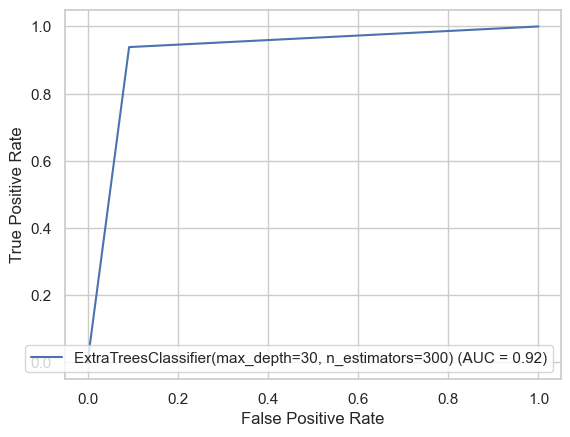

In [111]:
# Calculate the ROC curve and AUC
fpr, tpr, thresolds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create a ROC curve display with relevant information
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)

# Plot the ROC curve
display.plot()
plt.show()

## Saving the final model

In [112]:
# Saving the model 
joblib.dump(final_model, "Insurance_Claim_Fraud_Detection_Model.pkl")

['Insurance_Claim_Fraud_Detection_Model.pkl']

In [113]:
# Loading the saved model
model = joblib.load("Insurance_Claim_Fraud_Detection_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [114]:
# Saving the actual values
actual_values = np.array(y_test)

In [115]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

Actual Vlaues  Predicted Values
0                0                 0
1                1                 1
2                1                 1
3                0                 0
4                1                 1
..             ...               ...
440              1                 1
441              1                 1
442              1                 1
443              1                 1
444              1                 1

[445 rows x 2 columns]

# Insurance Claim Fraud Detection Project Documentation
## Project Overview


### Objective
The objective of this project to predict if an insurance claim is fraudulent or not on the basis of the details provided in the dataset. This prediction involves implementation of classification model.

### Data Source
The dataset used for this project is sourced from a CSV file which includes details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance model performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate model performance. The split is 70% for training and 30% for testing.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
Several machine learning models were employed to predict if an insurance claim is fraudulent or not, including:

Logistic Regression, K-Nearest Neighbors Classifier, Gaussian Naive Bayes Classifier, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, Extra Trees Classifier, Gradient Boosting Classifier, AdaBoost Classifier, Bagging Classifier, XGBoost Classifier.

Each model mentioned above was trained on the training dataset.

### Model Evaluation and Hyperparameter Tuning

#### Model Evaluation Metrics
The following evaluation metrics were used to assess model performance:

Accuracy: Measures the proportion of correctly classified classes.

Precision: Evaluates the model's ability to correctly predict status.

Recall: Measures the model's ability to identify all actual cases.

Area Under the Receiver Operating Characteristic Curve (AUC-ROC): Assesses the model's ability to distinguish between actual and predicted cases.

#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above. Visual representations, such as confusion matrices or ROC curves, were used to aid in model selection.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize model performance.

### Results
#### Final Model Selection
After careful evaluation, the Extra Trees Classifier model was selected as the final model for predicting an insurance claim is fraudulent or not due to its superior performance.

### Key Findings
Longer customer relationship ('months as customer') and older age have a minor positive impact on fraud reporting.

The state where the policy is held ('policy state') and the deductible amount ('policy deductible') have a slight positive influence.

Annual premium amount ('policy annual premium') has a minor negative effect.

Factors such as the type of incident, authorities contacted, and incident severity significantly affect the likelihood of fraud being reported.

Higher claim amounts, including total claim, injury claim, property claim, and vehicle claim, have a substantial positive impact on fraud reporting.

The number of vehicles involved, bodily injuries, and the presence of witnesses also play a significant role in fraud reporting.

Other factors like gender, education, occupation, hobbies, and specific policy details have minor to negligible influences on fraud reporting.

### Conclusion
In conclusion, the Insurance Claim Fraud Detection Project has provided essential insights into the factors that influence the likelihood of fraud being reported in insurance claims. These findings offer valuable knowledge for insurance companies, investigators, and policymakers, aiding in the development of strategies to mitigate fraudulent activities in the industry. By understanding the relationship between various features and fraud reporting, this project sets the stage for the implementation of advanced predictive models and fraud detection systems, contributing to enhanced fraud prevention and risk management in the insurance sector.